#데이터 ETL 및 전처리

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import time
import requests
from urllib.parse import urlparse
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#api key
headers = {
  "x-nxopen-api-key": #본인의 API 키 입력 ,
}

In [ ]:
#파라미터 지정해주고, match_id 불러오기
matchtype = '30'
initial = 0
limit = '1'
orderby = "desc"

match_id_list = []

def get_match_id():
    urlString = f"https://open.api.nexon.com/fconline/v1/match?matchtype={matchtype}&offset={initial+(i*100)}&limit={limit}&orderby={orderby}"
    match_id = requests.get(urlString, headers = headers).json()
    match_id_list.append(match_id)
    return match_id_list

for i in range(1):
    get_match_id()
    time.sleep(1)
# 응답 데이터를 출력하여 몇 개의 데이터를 불러왔는 지 확인
# 넘파이를 이용해 2차원 리스트가 된 리스트 1차원으로 평탄화
match_id_list = [item for sublist in match_id_list for item in sublist]
print('매치 아이디', len(match_id_list),'개를 불러왔습니다.')
print('중복 확인: ', len(set(match_id_list)))

매치 아이디 1 개를 불러왔습니다.
중복 확인:  1


In [ ]:
#매치 데이터를 가져오기 위해 빈 데이터 프레임을 생성
match_df = pd.DataFrame()

In [ ]:
#매치 상세 데이터 가져오기
def get_match_detail(match_id):
    url = f"https://open.api.nexon.com/fconline/v1/match-detail?matchid={match_id}"
    response = requests.get(url, headers=headers)
    return response.json()

match_data_list = []

# 매치 ID로 매치 상세 정보 가져오기
for match_id in match_id_list:
    match_detail = get_match_detail(match_id)
    match_df = pd.json_normalize(match_detail['matchInfo'])
    time.sleep(1)
    match_data_list.append(match_df)

# 리스트에 있는 데이터프레임 하나의 데이터프레임으로 연결
match_df = pd.concat(match_data_list, ignore_index=True)
match_df.to_csv('match1_df.csv', index=False)

In [ ]:
match_df

ouid  nickname  \
0  d3f4b42658ecee436ab7a8a88ee0dc8b  딴놈은다넣게하데   
1  d287fe49fd6f911392a0eac162b7c4e5    서산꼬맹이3   

                                         shootDetail  \
0  [{'goalTime': 1829, 'x': 0.8866652250289917, '...   
1  [{'goalTime': 202, 'x': 0.7941806316375732, 'y...   

                                              player matchDetail.seasonId  \
0  [{'spId': 289000250, 'spPosition': 28, 'spGrad...                 None   
1  [{'spId': 814005589, 'spPosition': 17, 'spGrad...                 None   

  matchDetail.matchResult  matchDetail.matchEndType  matchDetail.systemPause  \
0                       패                         0                        0   
1                       승                         0                        0   

   matchDetail.foul  matchDetail.injury  ...  pass.drivenGroundPassTry  \
0                 1                   0  ...                         0   
1                 1                   0  ...                         0   

   pass.drivenGroundPassSuccess  pass.throughPassTry  pass.throughPassSuccess  \
0                             0                   24                       21   
1                             0                   22                       19   

   pass.lobbedThroughPassTry  pass.lobbedThroughPassSuccess  defence.blockTry  \
0                          0                              0                10   
1                          0                              0                 5   

  defence.blockSuccess  defence.tackleTry  defence.tackleSuccess  
0                    2                  9                      4  
1                    0                  3                      2  

[2 rows x 52 columns]

In [ ]:
#2번쨰 매치 데이터 뽑기

#파라미터 지정해주고, match_id 불러오기
matchtype = '30'
initial = 300
limit = '50'
orderby = "desc"

match_id_list = []

def get_match_id():
    urlString = f"https://open.api.nexon.com/fconline/v1/match?matchtype={matchtype}&offset={initial+(i*100)}&limit={limit}&orderby={orderby}"
    match_id = requests.get(urlString, headers = headers).json()
    match_id_list.append(match_id)
    return match_id_list

for i in range(3):
    get_match_id()
    time.sleep(1)

match_id_list = [item for sublist in match_id_list for item in sublist]

print('매치 아이디', len(match_id_list),'개를 불러왔습니다.')

match_df = pd.DataFrame()

def get_match_detail(match_id):
    url = f"https://open.api.nexon.com/fconline/v1/match-detail?matchid={match_id}"
    response = requests.get(url, headers=headers)
    return response.json()

match_data_list = []

for match_id in match_id_list:
    match_detail = get_match_detail(match_id)
    match_df = pd.json_normalize(match_detail['matchInfo'])
    time.sleep(1)
    match_data_list.append(match_df)

match2_df = pd.concat(match_data_list, ignore_index=True)
match2_df.to_csv('match2_df.csv', index=False)

In [ ]:
#player, season, position 정보를 불러오는 함수
def player_info():
    urlString = f"https://open.api.nexon.com/static/fconline/meta/spid.json"
    player_info = requests.get(urlString)
    return player_info.json()

def season_info():
    urlString = f"https://open.api.nexon.com/static/fconline/meta/seasonid.json"
    season_info = requests.get(urlString)
    return season_info.json()

def position_info():
    urlString = f"https://open.api.nexon.com/static/fconline/meta/spposition.json"
    position_info = requests.get(urlString)
    return position_info.json()

In [ ]:
#데이터 프레임으로 만들어주기
player_info = pd.json_normalize(player_info())
season_info = pd.json_normalize(season_info())
position_info = pd.json_normalize(position_info())

In [ ]:
#player_info에 seasonId를 넣어 어떤 시즌인지 인식할수 코드 열을 만들어줌
player_info['seasonId'] = player_info['id'].astype(str).str[:3]
player_info['seasonId'] = player_info['seasonId'].astype(int)

In [ ]:
#player_info에 season_info를 merge하여 추가시키고, id는 spid로 바꿔준다.
player_info = pd.merge(player_info, season_info, on='seasonId', how='left')
player_info = player_info.rename(columns={'id':'spId'})

In [ ]:
# player_info를 csv로 저장하기
player_info.to_csv('player_info.csv')

In [ ]:
#데이터 통합
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/clean_ccdd_df_백승훈.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/df_all_상준.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/match_all.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/soomin_fconline_datasets.csv', encoding='cp949')
df5 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/add_df_백승훈.csv', encoding='cp949')
df6 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/df_all2_13047.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/match_new_hee.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/fifa_data.csv', encoding='cp949')

temp = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8]).drop_duplicates().reset_index().drop(columns=['index'])
temp.to_csv('fconline_data.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Team_Minsoo_team_2/Data/clean_ccdd_df_백승훈.csv'

In [ ]:
#상준님 player, shootDetail 전처리 코드 넣어주세요!

In [ ]:
#코드를 수집하는 과정에서 matchid 하나 당 2개의 개인 식별자 아이디를 가져오는 것은 아닌것같다.

In [ ]:
#match, player, shootDetail 데이터를 불러옵니다.
fifa_data = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/fconline_data.csv')
fifa_data = fifa_data.drop(columns=['Unnamed: 0'])
temp = fifa_data.copy()
player = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/table_3/player.csv')
shoot = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/table_3/shoot.csv')

In [ ]:
fifa_data

ouid  nickname  \
0      bbe1b626fa8cc0a7356834ef214b239f  태클신으로불린다   
1      1488eaf6743300317561d3f70793a179  1학년3반19번   
2      cde51bb856ef3047de05f2b6add99216      Mr꼬마   
3      85683bc61266341334e31b760a9257ea       한보드   
4      c0657f10c529a5eb5d5dbea497224d7c      감자슛돌   
...                                 ...       ...   
29252  54a67f00fe8e306d95b87eeaa0ceb90e     밍키와코난   
29253  25e7b816dfff641f1bf2c74c617d67fa   영이는곳휴가철   
29254  c85fa383fc4a6fb4230fd5247e0def0d     멕시코사람   
29255  7d2280a4a33957a974c30bdd9ddbaa9d      열혈FC   
29256  be4284881a1b875a5cac6295efe51d7d     만두두구둑   

                                             shootDetail  \
0      [{'goalTime': 16777555, 'x': 0.880174815654754...   
1      [{'goalTime': 2858, 'x': 0.83888953924179, 'y'...   
2      [{'goalTime': 554, 'x': 0.7956340909004211, 'y...   
3      [{'goalTime': 16777415, 'x': 0.928984761238098...   
4      [{'goalTime': 1499, 'x': 0.9920310378074646, '...   
...                                                  ...   
29252                                                 []   
29253  [{'goalTime': 1041, 'x': 0.8647914528846741, '...   
29254  [{'goalTime': 103, 'x': 0.8936795592308044, 'y...   
29255  [{'goalTime': 916, 'x': 0.893947422504425, 'y'...   
29256                                                 []   

                                                  player  \
0      [{'spId': 284007826, 'spPosition': 25, 'spGrad...   
1      [{'spId': 802001620, 'spPosition': 28, 'spGrad...   
2      [{'spId': 252000250, 'spPosition': 28, 'spGrad...   
3      [{'spId': 249000250, 'spPosition': 9, 'spGrade...   
4      [{'spId': 216037576, 'spPosition': 28, 'spGrad...   
...                                                  ...   
29252                                                 []   
29253  [{'spId': 289013743, 'spPosition': 15, 'spGrad...   
29254  [{'spId': 272181458, 'spPosition': 28, 'spGrad...   
29255  [{'spId': 268001040, 'spPosition': 28, 'spGrad...   
29256                                                 []   

       matchDetail.seasonId matchDetail.matchResult  matchDetail.matchEndType  \
0                       NaN                       패                         0   
1                       NaN                       승                         0   
2                       NaN                       패                         0   
3                       NaN                       승                         0   
4                       NaN                       승                         1   
...                     ...                     ...                       ...   
29252                   NaN                       패                         2   
29253                   NaN                       패                         0   
29254                   NaN                       승                         0   
29255                   NaN                       승                         1   
29256                   NaN                       패                         2   

       matchDetail.systemPause  matchDetail.foul  matchDetail.injury  ...  \
0                          1.0               3.0                 0.0  ...   
1                          0.0               1.0                 0.0  ...   
2                          0.0               1.0                 0.0  ...   
3                          0.0               0.0                 0.0  ...   
4                          1.0               0.0                 0.0  ...   
...                        ...               ...                 ...  ...   
29252                      NaN               NaN                 NaN  ...   
29253                      0.0               0.0                 0.0  ...   
29254                      0.0               1.0                 0.0  ...   
29255                      0.0               0.0                 1.0  ...   
29256                      NaN               NaN                 NaN  ...   

       pass.drivenGroundPassTry  pass.drivenGroundPassSucc

In [ ]:
#seasonId는 drop한다
temp.drop(columns=['matchDetail.seasonId'], inplace = True)

In [ ]:
#매치 타입은 드랍 시킨다. 왜냐면, 승리에 연관이 없는 변수이다.
temp.drop(columns=['matchDetail.matchEndType'], inplace = True)

In [ ]:
#결측치인 데이터는 모두 제거한다
# 이유는 데이터의 결측치에 해당하는 열의 모든 정보들이 아예 없었기 때문에
temp.dropna(axis=0)

ouid  nickname  \
0      bbe1b626fa8cc0a7356834ef214b239f  태클신으로불린다   
1      1488eaf6743300317561d3f70793a179  1학년3반19번   
2      cde51bb856ef3047de05f2b6add99216      Mr꼬마   
3      85683bc61266341334e31b760a9257ea       한보드   
4      c0657f10c529a5eb5d5dbea497224d7c      감자슛돌   
...                                 ...       ...   
29250  3bede94a225ef57a22dc01764094b8dc        영솟   
29251  3014eb14bc1e37465a2ee0192b861a9f    dijenw   
29253  25e7b816dfff641f1bf2c74c617d67fa   영이는곳휴가철   
29254  c85fa383fc4a6fb4230fd5247e0def0d     멕시코사람   
29255  7d2280a4a33957a974c30bdd9ddbaa9d      열혈FC   

                                             shootDetail  \
0      [{'goalTime': 16777555, 'x': 0.880174815654754...   
1      [{'goalTime': 2858, 'x': 0.83888953924179, 'y'...   
2      [{'goalTime': 554, 'x': 0.7956340909004211, 'y...   
3      [{'goalTime': 16777415, 'x': 0.928984761238098...   
4      [{'goalTime': 1499, 'x': 0.9920310378074646, '...   
...                                                  ...   
29250  [{'goalTime': 130, 'x': 0.7801044583320618, 'y...   
29251  [{'goalTime': 447, 'x': 0.751318633556366, 'y'...   
29253  [{'goalTime': 1041, 'x': 0.8647914528846741, '...   
29254  [{'goalTime': 103, 'x': 0.8936795592308044, 'y...   
29255  [{'goalTime': 916, 'x': 0.893947422504425, 'y'...   

                                                  player  \
0      [{'spId': 284007826, 'spPosition': 25, 'spGrad...   
1      [{'spId': 802001620, 'spPosition': 28, 'spGrad...   
2      [{'spId': 252000250, 'spPosition': 28, 'spGrad...   
3      [{'spId': 249000250, 'spPosition': 9, 'spGrade...   
4      [{'spId': 216037576, 'spPosition': 28, 'spGrad...   
...                                                  ...   
29250  [{'spId': 268166906, 'spPosition': 6, 'spGrade...   
29251  [{'spId': 268049369, 'spPosition': 28, 'spGrad...   
29253  [{'spId': 289013743, 'spPosition': 15, 'spGrad...   
29254  [{'spId': 272181458, 'spPosition': 28, 'spGrad...   
29255  [{'spId': 268001040, 'spPosition': 28, 'spGrad...   

      matchDetail.matchResult  matchDetail.systemPause  matchDetail.foul  \
0                           패                      1.0               3.0   
1                           승                      0.0               1.0   
2                           패                      0.0               1.0   
3                           승                      0.0               0.0   
4                           승                      1.0               0.0   
...                       ...                      ...               ...   
29250                       승                      1.0               0.0   
29251                       승                      1.0               1.0   
29253                       패                      0.0               0.0   
29254                       승                      0.0               1.0   
29255                       승                      0.0               0.0   

       matchDetail.injury  matchDetail.redCards  matchDetail.yellowCards  ...  \
0                     0.0                   1.0                      0.0  ...   
1                     0.0                   0.0                      0.0  ...   
2                     0.0                   0.0                      0.0  ...   
3                     0.0                   0.0                      0.0  ...   
4                     0.0                   0.0                      0.0  ...   
...                   ...                   ...                      ...  ...   
29250                 0.0                   0.0                      0.0  ...   
29251                 0.0                   0.0                      1.0  ...   
29253                 0.0                   0.0                      0.0  ...   
29254                 0.0                   0.0                      0.0  ...   
29255                 1.0                   0.0                      0.0  ...   

       pass.drivenGroundPassTry  pass.drivenGroundPassSuccess  \
0    

In [ ]:
#승,무,패를 라벨 인코딩 해준다. 승의 경우 1, 무의 경우 0, 패의 경우 -1로 전처리해준다.
temp['matchDetail.matchResult'] = temp['matchDetail.matchResult'].map({'승':1, '무':0, '패':-1})

In [ ]:
# 자책골을 1골만 넣는 경우에는 그럴수도 있지만, 2골의 경우에는 거의 고의라고 볼 수 있다.
# 자책골을 진짜 2골을 우연히 넣는 경우는 있지만, 지려고 의도하지 않는 이상 그렇게 할 수가 없다.
# 따라서 제거해준다.
# 어차피 이상치나 값을 제거하는 과정에서 사라진다. 승 무 패가 값이 딱 떨어지지 않고 사라진다.
print(temp[temp['shoot.ownGoal']>=1]['matchDetail.matchResult'].value_counts(normalize=True))
print(temp[temp['shoot.ownGoal']>=2]['matchDetail.matchResult'].value_counts(normalize=True))
temp = temp[temp['shoot.ownGoal']>=2]

matchDetail.matchResult
-1    0.660194
 1    0.231392
 0    0.108414
Name: proportion, dtype: float64
matchDetail.matchResult
-1    0.732143
 1    0.214286
 0    0.053571
Name: proportion, dtype: float64


In [ ]:
#컨트롤러의 여부의 경우 pd.get_dummies를 활용하여 원핫인코딩을 실행한다.
controller = pd.get_dummies(temp, columns=['matchDetail.controller'])

In [ ]:
#player, shootDetail은 데이터프레임 화해줘야 하기 떄문에 따로 뺸다.
player = controller.copy()
player.to_csv('player.csv', index=False)
shoot.to_csv('shoot.csv', index=False)

NameError: name 'controller' is not defined

In [ ]:
#게임 정지 횟수는 승부와 아예 상관없는 변수이다.또한, player, shootDetail은 따로 데이터 프레임으로 만들어 줄 것이므로 제거한다.
controller.drop(columns=['matchDetail.systemPause'], inplace = True)
controller.drop(columns=['player','shootDetail'], inplace = True)

In [ ]:
#temp의 copy 버전인 temp2를 만들고 상관관계를 본다.
correlation_matrix  = controller.copy()
correlation_matrix.drop(columns=['ouid','nickname','shoot.shootOutScore'], inplace=True)

In [ ]:
correlation_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 631 to 27171
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   matchDetail.matchResult          56 non-null     int64  
 1   matchDetail.foul                 56 non-null     float64
 2   matchDetail.injury               56 non-null     float64
 3   matchDetail.redCards             56 non-null     float64
 4   matchDetail.yellowCards          56 non-null     float64
 5   matchDetail.dribble              56 non-null     float64
 6   matchDetail.cornerKick           56 non-null     float64
 7   matchDetail.possession           56 non-null     float64
 8   matchDetail.offsideCount         56 non-null     float64
 9   matchDetail.averageRating        56 non-null     float64
 10  shoot.shootTotal                 56 non-null     float64
 11  shoot.effectiveShootTotal        56 non-null     float64
 12  shoot.goalTotal         

In [ ]:
# 원핫 인코딩 한 변수를 수치형 변수로 바꿔준다.
correlation_matrix['matchDetail.controller_gamepad'] = correlation_matrix['matchDetail.controller_gamepad'].astype(int)
correlation_matrix['matchDetail.controller_keyboard'] = correlation_matrix['matchDetail.controller_keyboard'].astype(int)

In [ ]:
correlation_matrix.drop(columns=['shoot.goalFreekick'], inplace=True)

<Axes: >

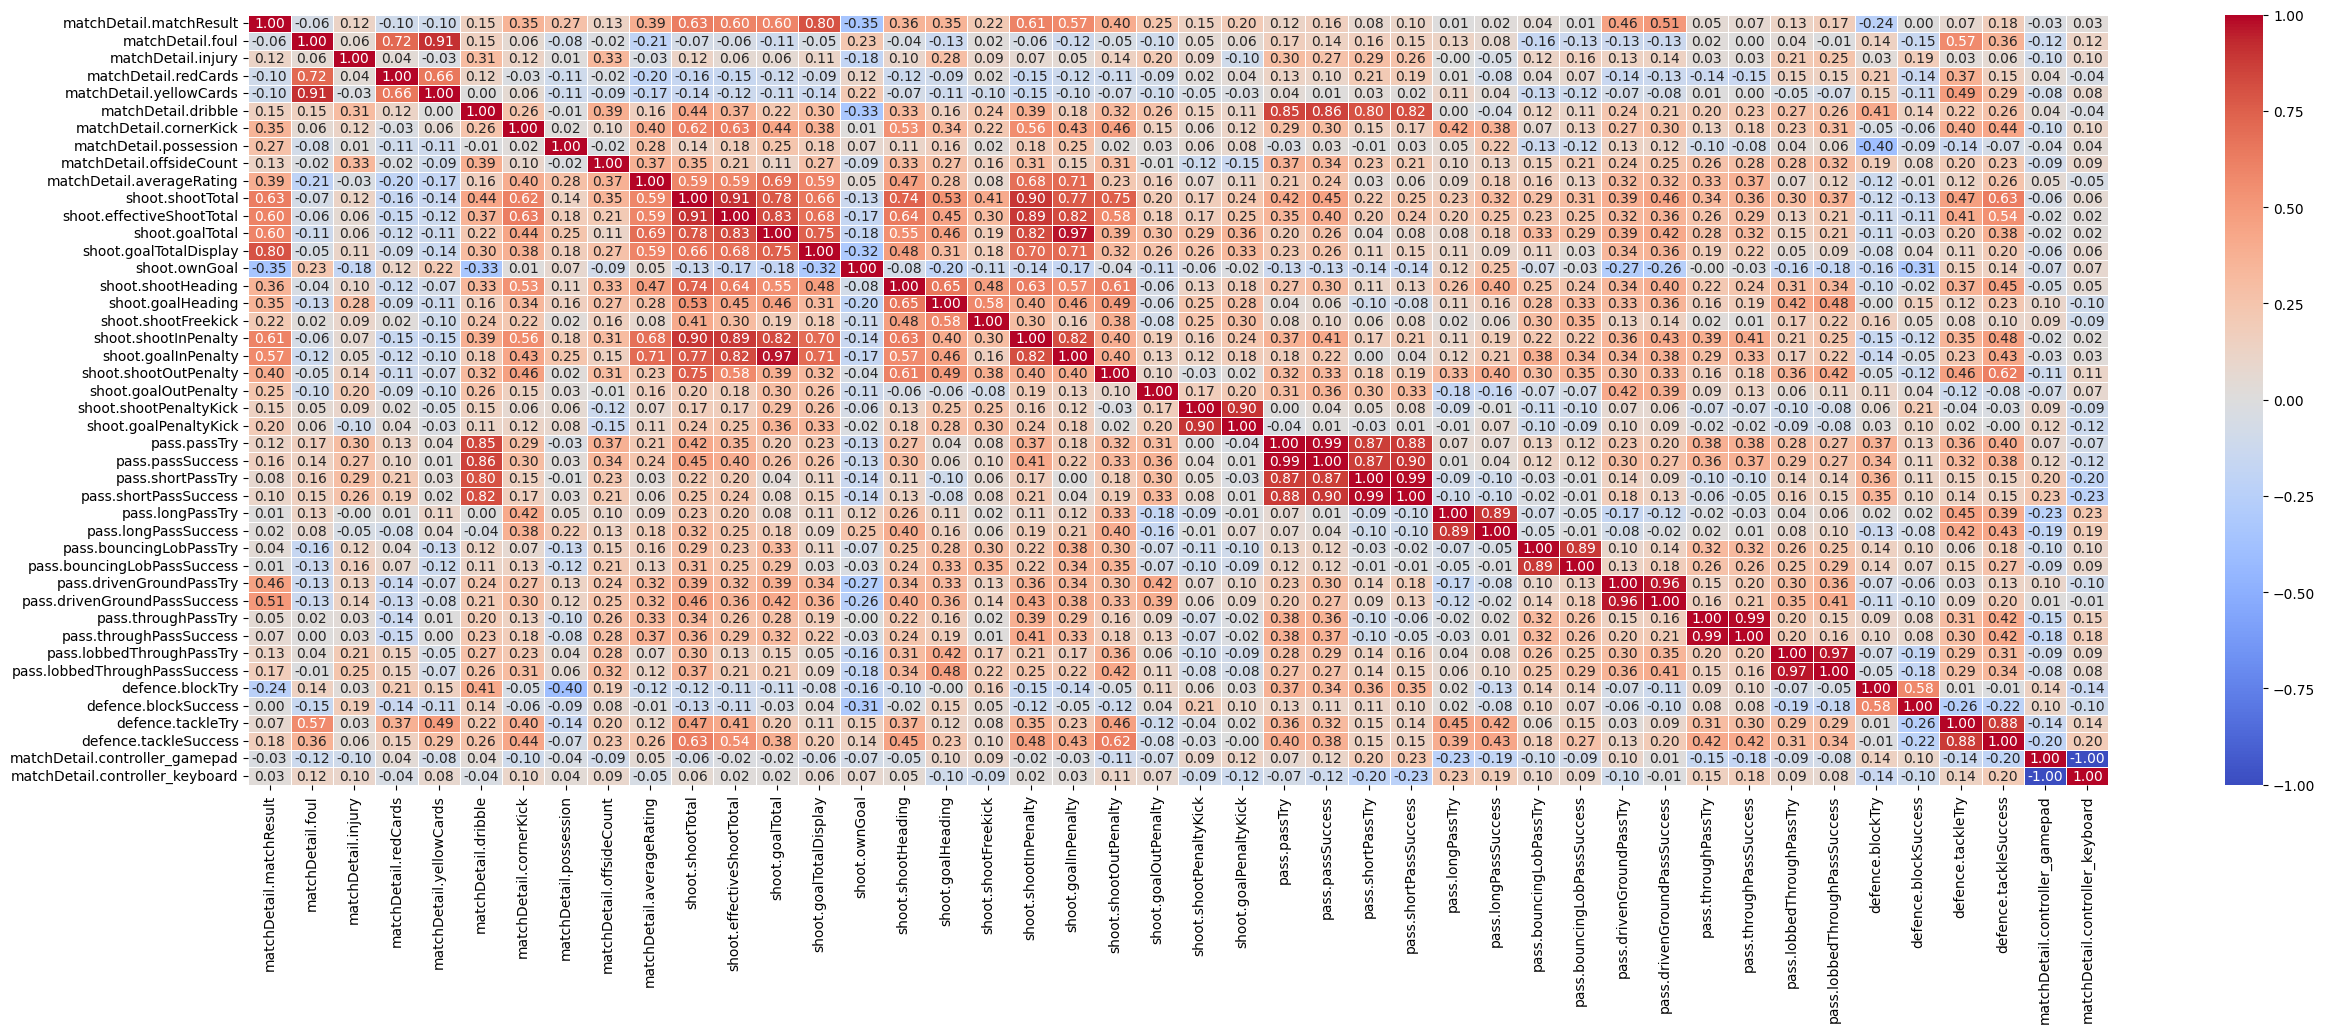

In [ ]:
# 상관관계를 확인한다.
plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix.corr(), annot=True, fmt='.2f', linewidth=.5, cmap='coolwarm')

In [ ]:
#데이터 저장
correlation_matrix.to_csv('cleaned_fc_data.csv', index=False)

In [ ]:
#여기서부터 각자 사본 복사하셔서 분석 진행해주시면 됩니다! pd.read_csv로 팀폴더에서 데이터 불러와서 진행해주세요!
#파일 열 때 에러가 난다면, pd.read_csv('파일 이름.csv', encoding='cp949') 입력해주시면 됩니다!
#ex) pd.read_csv('fifa_data.csv', encoding='cp949)
#전처리한 파일을 불러온다.
#데이터 불러오기
match_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/분리+전처리/match_without_json.csv')
player_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/분리+전처리/player.csv')
shoot_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/분리+전처리/shoot.csv')
player_info = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/player_info.csv')

In [ ]:
# 피파 온라인 페이지에서 구단 BP 정보를 가져와 크롤링하는 코드1
#match_df에 있는 닉네임을 가져와서 리스트화 하고, 휴면계정, 그리고 이름이 없는 것들을 name_list에서 지워주고 중복을 제거한다.

name_list = match_df['nickname'].to_frame()['nickname'].to_list()
name_list = [name for name in name_list if name != "설폡"]
name_list = [name for name in name_list if name != "맨유풋볼클렆"]
name_list = [name for name in name_list if name != "yourface정대세"]
name_list = [name for name in name_list if name != "DokkaebiFC"]
name_list = [name for name in name_list if name != "알개"]
name_list = [name for name in name_list if name != "nasdh85"]
name_list = [name for name in name_list if name != "자은생제리망"]
name_list = [name for name in name_list if "휴면" not in name]
name_list = [name for name in name_list if name != "탑가드인자기"]
name_list = [name for name in name_list if name != "김아린남편"]
name_list = [name for name in name_list if name != "the1ast"]
name_list = [name for name in name_list if name != "요요이2"]
name_list = [name for name in name_list if name != "체코페이크택시"]
name_list = [name for name in name_list if name != "레드데빌마드리드"]

# 중복 제거 (고유 요소만 유지)
unique_name_list = list(set(name_list))
name_list = pd.read_csv('C:/Users/82103/Desktop/name_list.csv')

In [ ]:
# 피파 온라인 페이지에서 구단 BP 정보를 가져와 크롤링하는 코드2
# chrome 웹 드라이버를 가져와서 창이 열릴 수 있도록 20초를 기다려준다, 만약 20초 이내에 열리면 곧바로 코드를 실행한다.
driver = webdriver.Chrome()
driver.get('https://fconline.nexon.com/main/index')
driver.implicitly_wait(20)

In [ ]:
# 피파 온라인 페이지에서 구단 BP 정보를 가져와 크롤링하는 코드3
# 피파 온라인 페이지 접속 - 우측 중단에 구단주 클릭 -> 닉네임 입력 -> 검색 클릭 -> 새창에서 열면 구단주 정보 클릭 -> 구단 가치를 가져오는 순서로 크롤링 순서를 짰다
count = 0
bp_list = []

for i in range(0,7793):
    try:
        # 드롭다운 버튼 누르기
        driver.find_element(By.XPATH, '//*[@id="middle"]/div/div[4]/div/div[2]/div[2]/section/div[1]/div/div[3]/div[1]/button').click()
        # 구단주로 변경 버튼 누르기
        driver.find_element(By.XPATH, '//*[@id="middle"]/div/div[4]/div/div[2]/div[2]/section/div[1]/div/div[3]/div[1]/ul/li[1]').click()
        # 닉네임 칸 클릭 및 닉네임 입력
        click = driver.find_element(By.XPATH, '//*[@id="txtSearchProfile"]')
        click.clear()  # 이전 텍스트를 지움
        click.send_keys(name_list[i])
        driver.find_element(By.XPATH, '//*[@id="middle"]/div/div[4]/div/div[2]/div[2]/section/div[1]/div/div[3]/div[2]/button').click()
        # 잠시 대기 후, 새로운 창으로 전환
        time.sleep(1)  # 페이지 로딩 시간을 고려하여 충분히 대기
        # 경고 창 감지
        try:
            alert = driver.switch_to.alert
            alert_text = alert.text
            alert.accept()
            print(f"Alert detected: {alert_text}")
            continue  # 이름이 존재하지 않을 경우 다음 루프로 넘어감
        except (NoAlertPresentException, UnexpectedAlertPresentException):
            pass
        # 모든 창 핸들 얻기
        all_handles = driver.window_handles
        # 새로운 창으로 전환
        driver.switch_to.window(all_handles[-1])
        # 새로운 창에서 작업 수행
        driver.find_element(By.XPATH, '//*[@id="profilePop"]/div/div/div[1]/div[2]/ul/li[5]/a').click()
        user_bp = driver.find_element(By.XPATH, '//*[@id="profilePop"]/div/div/div[2]/div/div[2]/div[3]/div/div[2]').text
        print(f'{count}번째 인덱스', name_list[i], user_bp)
        bp_list.append([name_list[i],user_bp])
        count += 1
        # 새로운 창 닫기
        driver.close()
        # 원래 창으로 전환
        driver.switch_to.window(all_handles[0])
    except NoSuchElementException as e:
        print(f"Error encountered for name {name_list[i]}: {e}")
        continue  # 다음 루프로 넘어감
    except TimeoutException as e:
        print(f"Timeout error for name {name_list[i]}: {e}")
        continue  # 다음 루프로 넘어감

bp_data = pd.DataFrame(bp_list)
bp_data.to_csv('bp_data.csv', index=False)

In [ ]:
# 크롤링을 통해 가져온 닉네임과 구단 가치 csv 파일을 가져온다
bp_data1 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/bp_data.csv')
bp_data2 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/concat_fin_df.csv')
bp_data3 = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/concat_fin_df_3.csv')
match_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/match_new_hee.csv')

In [ ]:
# 현금 10만원 ~ 20만원을 현질했을 때 얻을 수 있는 BP의 양이 약 1조정도 한다고 한다. (피파 커뮤니티 기준(에펨코리아, FC온라인 인벤, 디시인사이드 등))
# 따라서, 구단가치를 1조로 나눈다음 15로 곱해주면, 구단 가치의 현금 값어치 추정치가 된다.
bp_data = pd.concat([bp_data1, bp_data2, bp_data3], ignore_index=True)
bp_data = bp_data.drop_duplicates()
bp_data.rename(columns={'0':'ouid','1':'team_value'}, inplace=True)
bp_data['team_value'] = bp_data['team_value'].str.replace(',', '')
bp_data['team_value'] = bp_data['team_value'].str.replace(' BP', '')
bp_data['team_value'] = pd.to_numeric(bp_data['team_value'])
bp_data['real_money'] = round((bp_data['team_value']/1000000000000),2) * 15
bp_data[bp_data['team_value']==max(bp_data['team_value'])]
bp_data.to_csv('bp_data_complete.csv', index=False)

# 데이터 불러오기

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#패키지 임포트
import pandas as pd
import time
import requests
from urllib.parse import urlparse
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#여기서부터 각자 사본 복사하셔서 분석 진행해주시면 됩니다! pd.read_csv로 팀폴더에서 데이터 불러와서 진행해주세요!
#파일 열 때 에러가 난다면, pd.read_csv('파일 이름.csv', encoding='cp949') 입력해주시면 됩니다!
#ex) pd.read_csv('fifa_data.csv', encoding='cp949)
#전처리한 파일을 불러온다.
#데이터 불러오기
match_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/분리+전처리/match_without_json.csv')
player_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/분리+전처리/player.csv')
shoot_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/분리+전처리/shoot.csv')
player_info = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/player_info.csv')
bp_df = pd.read_csv('/content/drive/MyDrive/Team_Minsoo_team_2/Data/bp_data_complete.csv')

In [ ]:
bp_df

ouid     team_value  real_money
0         레알오진다   116285000000        1.80
1      승리와함께가리라   766010000000       11.55
2        마누라죽이기  1405640695830       21.15
3         인이에스타    33411810000        0.45
4          기흥왕팔   196330000000        3.00
...         ...            ...         ...
6660  yejun9023   915300792450       13.80
6661   이정후샌프란시코  1179730283230       17.70
6662       떨마니몽   775410000000       11.70
6663     주식쏭가왕님   223101000000        3.30
6664      레드원소1  3150579000000       47.25

[6665 rows x 3 columns]

In [ ]:
#player_df에 player_info join 시키기.
player_df = pd.merge(player_df, player_info, on='spId', how='left').drop(columns=['seasonImg'])

In [ ]:
#name, season, Id name, seasonId, className 없는 값 drop 하기
player_df[player_df['seasonId'].isna()]
player_df.dropna(inplace=True, axis=0)
player_df

spId  spPosition  spGrade                              ouid  \
0       284007826          25        4  bbe1b626fa8cc0a7356834ef214b239f   
1       264049369          28        4  bbe1b626fa8cc0a7356834ef214b239f   
2       252121939           8        5  bbe1b626fa8cc0a7356834ef214b239f   
3       225136246          28        7  bbe1b626fa8cc0a7356834ef214b239f   
4       256140601           5        5  bbe1b626fa8cc0a7356834ef214b239f   
...           ...         ...      ...                               ...   
489577  287209658          28        5  7d2280a4a33957a974c30bdd9ddbaa9d   
489578  252214100          18        8  7d2280a4a33957a974c30bdd9ddbaa9d   
489579  237220746          28        1  7d2280a4a33957a974c30bdd9ddbaa9d   
489580  814226851           6        5  7d2280a4a33957a974c30bdd9ddbaa9d   
489581  279238074          28        5  7d2280a4a33957a974c30bdd9ddbaa9d   

        shoot  effectiveShoot  assist  goal  dribble  intercept  ...  \
0         1.0             1.0     0.0   1.0    134.0        0.0  ...   
1         0.0             0.0     0.0   0.0      0.0        0.0  ...   
2         0.0             0.0     0.0   0.0     35.0        0.0  ...   
3         0.0             0.0     0.0   0.0      0.0        0.0  ...   
4         0.0             0.0     0.0   0.0      0.0        2.0  ...   
...       ...             ...     ...   ...      ...        ...  ...   
489577    0.0             0.0     0.0   0.0      0.0        0.0  ...   
489578    5.0             4.0     1.0   4.0    289.0        1.0  ...   
489579    0.0             0.0     0.0   0.0      0.0        0.0  ...   
489580    0.0             0.0     0.0   0.0     79.0        1.0  ...   
489581    0.0             0.0     0.0   0.0      0.0        0.0  ...   

        blockTry  block  tackleTry  tackle  yellowCards  redCards  spRating  \
0            0.0    0.0        0.0     0.0          0.0       0.0       7.0   
1            0.0    0.0        0.0     0.0          0.0       0.0       0.0   
2            0.0    0.0        3.0     1.0          0.0       1.0       5.7   
3            0.0    0.0        0.0     0.0          0.0       0.0       0.0   
4            3.0    0.0        2.0     2.0          0.0       0.0       5.5   
...          ...    ...        ...     ...          ...       ...       ...   
489577       0.0    0.0        0.0     0.0          0.0       0.0       0.0   
489578       0.0    0.0        1.0     1.0          0.0       0.0       9.7   
489579       0.0    0.0        0.0     0.0          0.0       0.0       0.0   
489580       1.0    0.0        1.0     1.0          0.0       0.0       7.5   
489581       0.0    0.0        0.0     0.0          0.0       0.0       0.0   

            name  seasonId                             className  
0        로빈 반페르시     284.0                       RTN (Returnees)  
1       페르난도 토레스     264.0                       FA (FREE AGENT)  
2           필립 람     252.0                         CAP (Captain)  
3            박진섭     225.0                   TKL (TEAM K LEAGUE)  
4        네마냐 비디치     256.0                    BTB (Back to Back)  
...          ...       ...                                   ...  
489577   레온 고레츠카     287.0       23 TOTS (23 Team Of The Season)  
489578    루드 굴리트     252.0                         CAP (Captain)  
489579  A. 지브코비치     237.0           MC (Multi-League Champions)  
489580   뱅자맹 파바르     814.0              UT (Unexpected Transfer)  
489581    리스 제임스     279.0  23 TOTY-N (23 Team Of The Nominated)  

[489500 rows x 29 columns]

<Axes: >

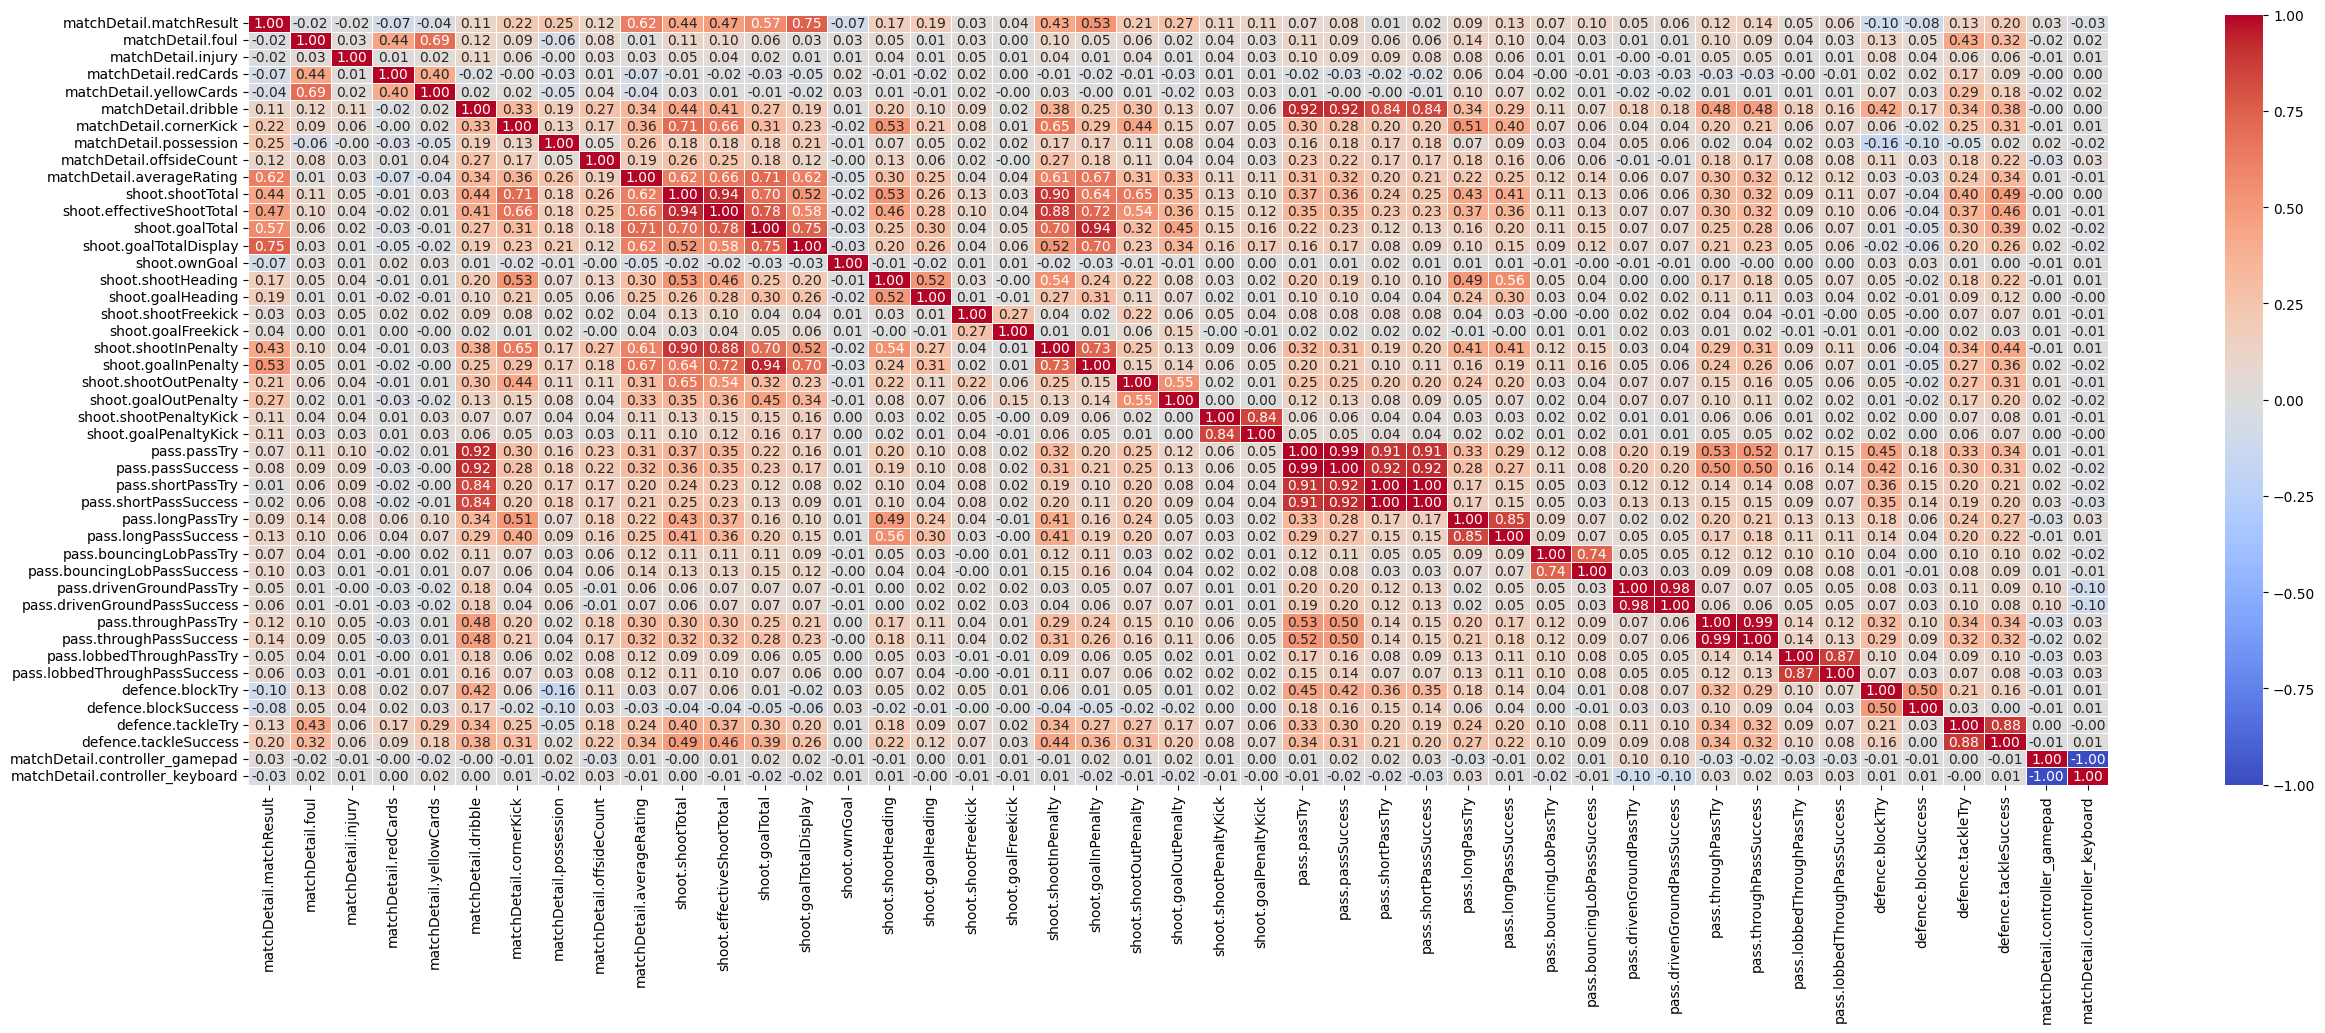

In [ ]:
# 상관관계를 확인한다.
plt.figure(figsize=(30,10))
sns.heatmap(match_df.drop(columns=['ouid','nickname']).corr(), annot=True, fmt='.2f', linewidth=.5, cmap='coolwarm')

In [ ]:
## 플레이어들은 패널티 구역 내&외 어느 곳에서 어떤 슈팅을 많이 할까? (상준)

# 선수가 시도한 슛의 종류, 슛의 빈도, 슛의 결과는 유의미하게 매치 결과에 영향을 줄 것이며, 기술 난이도가 높은 슛을 성공했을 시 승률이 더 높을 것이다. (상준)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ast
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
df=pd.read_csv('match_without_json.csv')
df.head()

In [ ]:
atch_result_counts_with_draws = df['matchDetail.matchResult'].value_counts()
labels_with_draws = match_result_counts_with_draws.index.map({1: '승', -1: '패', 0: '무'}).tolist()

plt.figure(figsize=(10, 10))
plt.pie(match_result_counts_with_draws, labels=labels_with_draws, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('경기 결과 분포 (Win, Loss, Draw)')
plt.show()


In [ ]:
numeric_df=df.select_dtypes(['int64','float64'])
corr_matchresult = numeric_df.corr()['matchDetail.matchResult'].sort_values(ascending=False)
corr_matchresult.head(10)
# matchDetail.averageRating
# shoot.goalTotal
# shoot.effectiveShootTotal

In [ ]:
shoot_columns = [col for col in df.columns if 'shoot.' in col]
shoot_columns_describe = df[shoot_columns].describe().T
match_colums= [col for col in df.columns if 'matchDetail.' in col]
shoot_only_df = df[shoot_columns]
shoot_match_df=df[match_colums+shoot_columns]
shoot_columns_describe

In [ ]:
# shoot 지표 분포 시각화

plt.figure(figsize=(20, 10))
for i, feature in enumerate(shoot_columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(shoot_only_df[feature], bins=20, kde=True)
    plt.title(f'{feature} 분포')
plt.tight_layout()
plt.show()

In [ ]:
# 1 결과 상관없이 어떠한 형태의 슛(헤딩,프리킥,패널티인, 패널티 아웃)이 골로 많이 이어졌는가(골성공률)

# 슛 시도 및 골 수 컬럼 선택
shoot_columns = [
    'shoot.shootHeading',
    'shoot.shootFreekick',
    'shoot.shootInPenalty',
    'shoot.shootOutPenalty',
    'shoot.shootPenaltyKick'
]

goal_columns = [
    'shoot.goalHeading',
    'shoot.goalFreekick',
    'shoot.goalInPenalty',
    'shoot.goalOutPenalty',
    'shoot.goalPenaltyKick'
]

# 총 슛 시도 수 및 총 골 수 계산
shoot_totals = shoot_match_df[shoot_columns].sum()
goal_totals = shoot_match_df[goal_columns].sum()


shoot_totals.index = goal_columns
goal_totals.index = goal_columns

# 각 슛 유형별 성공률 계산
success_rates = (goal_totals / shoot_totals).sort_values(ascending=False)

# 성공률 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=success_rates.index, y=success_rates.values)
plt.title('Success Rates of Different Types of Shots')
plt.xlabel('Type of Shot')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

print('-'*105)
success_rates

In [ ]:
# 2. 결과별(승,패,무) 슛 시도는 어떤 식으로 이루어졌는가?


selected_shoot_columns = [
    'shoot.shootHeading',
    'shoot.shootFreekick',
    'shoot.shootInPenalty',
    'shoot.shootOutPenalty',
    'shoot.shootPenaltyKick'
]

result_columns = ['matchDetail.matchResult']
shoot_data_with_result = shoot_match_df[selected_shoot_columns + result_columns]

# 매치 결과를 -1: 패배, 0: 무승부, 1: 승리로 매핑
result_mapping = {1: '승리', 0: '무승부', -1: '패배'}
shoot_data_with_result['matchDetail.matchResult'] = shoot_data_with_result['matchDetail.matchResult'].map(result_mapping)

# 결과별로 그룹화하고 합계 계산
shoot_data_grouped = shoot_data_with_result.groupby('matchDetail.matchResult').sum()

# 결과별 슛 시도 시각화
shoot_data_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Shot Attempts by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Shot Attempts')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# 3.결과별(승,패,무) 득점(골)은 어떤 식으로 이루어졌는가?


selected_goal_columns = [

    'shoot.goalHeading',
    'shoot.goalFreekick',
    'shoot.goalInPenalty',
    'shoot.goalOutPenalty',
    'shoot.goalPenaltyKick'
]

result_columns = ['matchDetail.matchResult']
goal_data_with_result = shoot_match_df[selected_goal_columns + result_columns]

# 매치 결과를 -1: 패배, 0: 무승부, 1: 승리로 매핑
result_mapping = {1: '승리', 0: '무승부', -1: '패배'}
goal_data_with_result['matchDetail.matchResult'] = goal_data_with_result['matchDetail.matchResult'].map(result_mapping)

# 결과별로 그룹화하고 합계 계산
goal_data_grouped = goal_data_with_result.groupby('matchDetail.matchResult').sum()

# 결과별 슛 시도 시각화
goal_data_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('goal points by Match Result')
plt.xlabel('Match Result')
plt.ylabel('goal points')
plt.xticks(rotation=0)
plt.show()

In [ ]:
shoot_columns = [col for col in df.columns if 'shoot.' in col]
corr_columns = ['matchDetail.matchResult','matchDetail.averageRating']
shoot_only_df=df[corr_columns+shoot_columns]

In [ ]:
result_mapping = {1: 'win', 0: 'draw', -1: 'loss'}
result_column = 'matchDetail.matchResult'
shoot_match_df[result_column] = shoot_match_df[result_column].map(result_mapping)

# 임계값
bins = {
    'shoot.goalTotal': range(0, 9, 1),
    'shoot.goalOutPenalty': range(0, 9, 1),
    'shoot.goalInPenalty': range(0, 9, 1)
}

# 비닝 및 라벨링
for column in bins.keys():
    labels = list(bins[column][:-1])
    shoot_match_df[f'{column}_bins'] = pd.cut(shoot_match_df[column], bins=bins[column], labels=labels, right=False)

# 승리 확률 계산 및 시각화 함수
def plot_win_rate(df, column_bins, ax):
    win_rates = df.groupby(column_bins)[result_column].value_counts(normalize=True).unstack().fillna(0)
    win_rates = win_rates.applymap(lambda x: round(x, 2))  # 소수점 둘째 자리로 반올림
    win_rates.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Proportion of Results')
    ax.legend(title='Match Result')
    ax.set_xticklabels(labels, rotation=0)  # x축 라벨을 정수로 표시

# 시각화
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

plot_win_rate(shoot_match_df, 'shoot.goalTotal_bins', axes[0])
axes[0].set_title('Win Rates by Goals Scored')
axes[0].set_xlim([-0.5, 7.5])  # x축 범위 설정

plot_win_rate(shoot_match_df, 'shoot.goalOutPenalty_bins', axes[1])
axes[1].set_title('Win Rates by Goals out of Penalty')
axes[1].set_xlim([-0.5, 7.5])  # x축 범위 설정

plot_win_rate(shoot_match_df, 'shoot.goalInPenalty_bins', axes[2])
axes[2].set_title('Win Rates by Goals in Penalty')
axes[2].set_xlim([-0.5, 7.5])  # x축 범위 설정

plt.tight_layout()
plt.show()

In [ ]:
mcdf=pd.read_csv('match_without_json.csv')
pldf=pd.read_csv('player_df_new.csv')
sddf=pd.read_csv('shoot.csv')

In [ ]:
sddf = sddf[~((sddf['type'] == 5) | (sddf['type'] == 11))]
sddf = sddf[~((sddf['inPenalty'] == True) & (sddf['type'] == 8))]

```
1. 전체 게임에서 시도한 슛 중, shoot의 결과 비율은?
2. 전체 게임에서 시도된 shoot 종류의 비율은?
3. shoot 결과(On,Off,Goal)에 따라 shoot 종류는 차이를 보이는가?
4. 페널티 존/밖에서 시도된 슛의 비율은?
5. shoot 종류 별 시도 횟수는 penalty zone 안 밖에 어떤 차이를 보일까?
6. 시도한 슛의 종류는 shoot 결과에 따라 승률에 어떠한 영향을 주는가?

```

In [ ]:

## 1. 전체 게임에서 시도한 슛 중, shoot의 결과 비율은?

sddf2=sddf.copy()
result_counts = sddf2['result'].value_counts(normalize=True)

# Mapping result numbers to labels
labels = ['On Target', 'Off Target', 'Goal']

# Colors for the pie chart
colors = ['skyblue', 'lightgreen', 'salmon']

# Pie chart visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(result_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Setting title
ax.set_title('Proportion of Each Result Type in Shoot')

plt.show()

In [ ]:
type_mapping = {
    1: 'normal',
    2: 'finesse',
    3: 'header',
    4: 'lob',

    6: 'low',
    7: 'volley',
    8: 'free-kick',
    9: 'penalty',
    10: 'KNUCKLE',

    12: 'super'
}


In [ ]:
### 2 전체 게임에서 시도된 shoot 종류의 비율은?

type_counts = sddf2['type'].value_counts(normalize=True).reset_index()
type_counts.columns = ['type', 'count']


palette = sns.color_palette("husl", len(type_counts))

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(type_counts['type'], type_counts['count'], color=palette)


ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Counts of Each Type')

plt.xticks(rotation=45)
plt.show()


In [ ]:
## 3. shoot 결과(On,Off,Goal)에 따라 shoot 종류는 유의미한 차이가 있는가?
sddf_on = sddf2[sddf2['result'] == 1]
sddf_goal = sddf2[sddf2['result'] == 3]
sddf_off = sddf2[sddf2['result'] == 2]

on_counts = sddf_on['type'].value_counts().sort_index()
goal_counts = sddf_goal['type'].value_counts().sort_index()
off_counts = sddf_off['type'].value_counts().sort_index()


plt.figure(figsize=(14, 8))
plt.plot(off_counts.index, off_counts.values, marker='o', label='Off Target')
plt.plot(on_counts.index, on_counts.values, marker='o', label='On Target')
plt.plot(goal_counts.index, goal_counts.values, marker='o', label='Goal')


plt.xlabel('Shot Type')
plt.ylabel('Count')
plt.title('Shot Type Distribution by Result')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
## 4. 페널티 존/밖에서 시도된 슛의 비율은?
inPenalty_counts = sddf2['inPenalty'].value_counts().reset_index()
inPenalty_counts.columns = ['inPenalty', 'count']


labels = inPenalty_counts['inPenalty'].map({True: 'In Penalty', False: 'Out of Penalty'})


colors = ['skyblue', 'lightgreen']


fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(inPenalty_counts['count'], labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})


ax.set_title('Proportion of Shots In and Out of Penalty')

plt.show()


In [ ]:
## 5.shoot 종류 별 시도 횟수는 penalty zone 안 밖에서 어떤 차이를 보일까?
sddf3=sddf.copy()
sddf_on = sddf3[sddf3['result'] == 1]
sddf_goal = sddf3[sddf3['result'] == 3]
sddf_off = sddf3[sddf3['result'] == 2]

result_type_counts = sddf3.groupby(['inPenalty','result', 'type']).size().reset_index(name='count')

# 결과별, 타입별 내림차순 정렬
sorted_counts = result_type_counts.sort_values(by=['result', 'count'], ascending=[True, False])
result_type_counts['result'] = result_type_counts['result'].replace({1: 'On Target', 2: 'Off Target', 3: 'Goal'})
result_type_counts['type']=result_type_counts['type'].map(type_mapping)

in_penalty = result_type_counts[result_type_counts['inPenalty'] == True]
out_penalty = result_type_counts[result_type_counts['inPenalty'] == False]

# 결과별로 색상을 설정
colors = {
    'On Target': 'skyblue',
    'Off Target': 'lightgreen',
    'Goal': 'salmon'
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# Plot for in-penalty
in_penalty_grouped = in_penalty.pivot_table(index='type', columns='result', values='count', aggfunc='sum').fillna(0)
for result_type in ['On Target', 'Off Target', 'Goal']:
    axes[0].plot(in_penalty_grouped.index, in_penalty_grouped[result_type], label=result_type, color=colors[result_type], marker='o')

axes[0].set_title('Shot Counts In Penalty Area')
axes[0].set_xlabel('Shot Type')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot for out-of-penalty
out_penalty_grouped = out_penalty.pivot_table(index='type', columns='result', values='count', aggfunc='sum').fillna(0)
for result_type in ['On Target', 'Off Target', 'Goal']:
    axes[1].plot(out_penalty_grouped.index, out_penalty_grouped[result_type], label=result_type, color=colors[result_type], marker='o')

axes[1].set_title('Shot Counts Out of Penalty Area')
axes[1].set_xlabel('Shot Type')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()




In [ ]:
# inPenalty와 outPenalty로 분리
in_penalty = result_type_counts[result_type_counts['inPenalty'] == True]
out_penalty = result_type_counts[result_type_counts['inPenalty'] == False]

# 결과별로 색상을 설정
colors = {
    'On Target': 'skyblue',
    'Off Target': 'lightgreen',
    'Goal': 'salmon'
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# In-penalty 비율 계산 및 시각화
in_penalty_grouped = in_penalty.pivot_table(index='type', columns='result', values='count', aggfunc='sum').fillna(0)
in_penalty_grouped = in_penalty_grouped.div(in_penalty_grouped.sum(axis=1), axis=0)  # 비율 계산
in_penalty_grouped.plot(kind='bar', stacked=True, color=colors, ax=axes[0])

axes[0].set_title('Shot Type Ratios In Penalty Area', fontsize=16)
axes[0].set_xlabel('Shot Type', fontsize=14)
axes[0].set_ylabel('Ratio', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].set_xticklabels(in_penalty_grouped.index, rotation=45, fontsize=12)

# Out-of-penalty 비율 계산 및 시각화
out_penalty_grouped = out_penalty.pivot_table(index='type', columns='result', values='count', aggfunc='sum').fillna(0)
out_penalty_grouped = out_penalty_grouped.div(out_penalty_grouped.sum(axis=1), axis=0)  # 비율 계산
out_penalty_grouped.plot(kind='bar', stacked=True, color=colors, ax=axes[1])

axes[1].set_title('Shot Type Ratios Out of Penalty Area', fontsize=16)
axes[1].set_xlabel('Shot Type', fontsize=14)
axes[1].set_ylabel('Ratio', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].set_xticklabels(out_penalty_grouped.index, rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
## 6. 시도한 슛의 종류는 shoot 결과에 따라 승률에 어떠한 영향을 주는가?

sddf3 = sddf.copy()

# inPenalty와 inPenalty & Goal, inPenalty & On, inPenalty & Off 데이터셋 생성
sddf_in_penalty = sddf3[sddf3['inPenalty'] == True]
sddf_in_penalty_goal = sddf_in_penalty[sddf_in_penalty['result'] == 3]
sddf_in_penalty_on = sddf_in_penalty[sddf_in_penalty['result'] == 1]
sddf_in_penalty_off = sddf_in_penalty[sddf_in_penalty['result'] == 2]

# outPenalty & Goal, outPenalty & On, outPenalty & Off 데이터셋 생성
sddf_out_penalty = sddf3[sddf3['inPenalty'] == False]
sddf_out_penalty_goal = sddf_out_penalty[sddf_out_penalty['result'] == 3]
sddf_out_penalty_on = sddf_out_penalty[sddf_out_penalty['result'] == 1]
sddf_out_penalty_off = sddf_out_penalty[sddf_out_penalty['result'] == 2]

def calculate_rates(sddf_subset, mcdf, type_mapping):
    ls_dict = {}

    for i in range(1, 13):
        temp = sddf_subset['type'] == i
        key = f'ls{i}'
        ls_dict[key] = sddf_subset[temp]['ouid'].unique().tolist()

    # 결과 저장을 위한 사전 초기화
    results = {}

    # 각 type 별 승률, 패배율, 무승부율 계산
    for i in range(1, 13):
        ouid_list = ls_dict[f'ls{i}']
        if len(ouid_list) == 0:
            continue
        match_results = mcdf[mcdf['ouid'].isin(ouid_list)]['matchDetail.matchResult']
        total_matches = len(match_results)
        if total_matches == 0:
            continue
        win_rate = (match_results == 1).sum() / total_matches
        loss_rate = (match_results == -1).sum() / total_matches
        draw_rate = (match_results == 0).sum() / total_matches
        results[f'type{i}'] = {
            'win_rate': win_rate,
            'loss_rate': loss_rate,
            'draw_rate': draw_rate
        }

    # 결과 저장
    new_results = {}
    for key, value in results.items():
        type_number = int(key.replace('type', ''))
        type_name = type_mapping.get(type_number, f'Unknown Type {type_number}')
        new_results[type_name] = value

    return new_results

type_mapping = {
    1: 'normal',
    2: 'finesse',
    3: 'header',
    4: 'lob',
    6: 'low',
    7: 'volley',
    8: 'free-kick',
    9: 'penalty',
    10: 'KNUCKLE',
    12: 'super'
}

# 승률 계산
rate_in_penalty_goal = calculate_rates(sddf_in_penalty_goal, mcdf, type_mapping)
rate_out_penalty_goal = calculate_rates(sddf_out_penalty_goal, mcdf, type_mapping)
rate_in_penalty_on = calculate_rates(sddf_in_penalty_on, mcdf, type_mapping)
rate_out_penalty_on = calculate_rates(sddf_out_penalty_on, mcdf, type_mapping)
rate_in_penalty_off = calculate_rates(sddf_in_penalty_off, mcdf, type_mapping)
rate_out_penalty_off = calculate_rates(sddf_out_penalty_off, mcdf, type_mapping)

# 시각화 함수 정의
def visualize_rates(new_results, result_label):
    # 데이터 준비
    labels = list(new_results.keys())
    win_rates = [new_results[key]['win_rate'] for key in labels]
    loss_rates = [new_results[key]['loss_rate'] for key in labels]
    draw_rates = [new_results[key]['draw_rate'] for key in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    # 시각화
    fig, ax = plt.subplots(figsize=(14, 8))
    rects1 = ax.bar(x - width, win_rates, width, label='Win Rate')
    rects2 = ax.bar(x, loss_rates, width, label='Loss Rate')
    rects3 = ax.bar(x + width, draw_rates, width, label='Draw Rate')

    # 각 막대 위에 숫자 표시
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    # 레이블, 타이틀 및 축 설정
    ax.set_xlabel('Shot Type')
    ax.set_ylabel('Rates')
    ax.set_title(f'Win, Loss, and Draw Rates by Shot Type ({result_label})')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()

    fig.tight_layout()

    plt.show()

# 시각화 결과
visualize_rates(rate_in_penalty_goal, 'In Penalty & Goal')
visualize_rates(rate_out_penalty_goal, 'Out Penalty & Goal')

# Defence 컬럼과 승률 분석 - 태클과 블록이 승률에 영향을 줄것이다. (희령)

In [ ]:
mdata=match_df.copy()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Defence Metrics for All Users', fontsize=16)

#block 시도
sns.histplot(ax=axes[0, 0], data=mdata, x='defence.blockTry', kde=True)
axes[0, 0].set_title('Distribution of Defence Block Try')

#block 성공
sns.histplot(ax=axes[0, 1], data=mdata, x='defence.blockSuccess', kde=True)
axes[0, 1].set_title('Distribution of Defence Block Success')

#tackleTry
sns.histplot(ax=axes[1, 0], data=mdata, x='defence.tackleTry', kde=True)
axes[1, 0].set_title('Distribution of Defence Tackle Try')

# tackle성공
sns.histplot(ax=axes[1, 1], data=mdata, x='defence.tackleSuccess', kde=True)
axes[1, 1].set_title('Distribution of Defence Tackle Success')


for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


###  태클, 블락과 -매치 result 관계 시각화

In [ ]:
# 디펜스컬럼 -> blockTry, success / TackleTry, success 바플롯


custom_palette = {'-1': 'skyblue','1': 'lightcoral', '0': 'lightgray'}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Defence Metrics by Match Result', fontsize=16)

#blockTry
sns.barplot(ax=axes[0, 0], x='matchDetail.matchResult', y='defence.blockTry', data=mdata, errorbar=None, order=[-1, 1, 0],palette=custom_palette)
axes[0, 0].set_title('Defence Block Try by Match Result')

#blockSuccess
sns.barplot(ax=axes[0, 1], x='matchDetail.matchResult', y='defence.blockSuccess', data=mdata, errorbar=None, order=[-1, 1, 0],palette=custom_palette)
axes[0, 1].set_title('Defence Block Success by Match Result')

# tackleTry
sns.barplot(ax=axes[1, 0], x='matchDetail.matchResult', y='defence.tackleTry', data=mdata, errorbar=None, order=[-1, 1, 0],palette=custom_palette)
axes[1, 0].set_title('Defence Tackle Try by Match Result')

# tackleSuccess
sns.barplot(ax=axes[1, 1], x='matchDetail.matchResult', y='defence.tackleSuccess', data=mdata, errorbar=None, order=[-1, 1, 0],palette=custom_palette)
axes[1, 1].set_title('Defence Tackle Success by Match Result')


for ax in axes.flat:
    ax.set_xlabel('Match Result (-1: Loss, 1: Win, 0: Draw)')
    ax.set_ylabel('Average Value')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()





# 각 경기 결과별 defence 메트릭의 평균 값 계산
mean_values = mdata.groupby('matchDetail.matchResult')[['defence.blockTry', 'defence.blockSuccess', 'defence.tackleTry', 'defence.tackleSuccess']].mean()

# 결과 출력
print(mean_values)


tackles_rate=mdata['defence.tackleSuccess']/mdata['defence.tackleTry']
blocks_rate=mdata['defence.blockSuccess']/mdata['defence.blockTry']



# 박스플롯
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Comparison of Defence Metrics by Match Result', fontsize=16)

# 블록 시도
sns.boxplot(ax=axes[0, 0], x='matchDetail.matchResult', y='defence.blockTry', order=[-1, 1, 0],data=mdata,palette=custom_palette)
axes[0, 0].set_title('Defence Block Try by Match Result')

# 블록성공
sns.boxplot(ax=axes[0, 1], x='matchDetail.matchResult', y='defence.blockSuccess',order=[-1, 1, 0], data=mdata,palette=custom_palette)
axes[0, 1].set_title('Defence Block Success by Match Result')

# 태클시도
sns.boxplot(ax=axes[1, 0], x='matchDetail.matchResult', y='defence.tackleTry',order=[-1, 1, 0], data=mdata,palette=custom_palette)
axes[1, 0].set_title('Defence Tackle Try by Match Result')

# 태클성공
sns.boxplot(ax=axes[1, 1], x='matchDetail.matchResult', y='defence.tackleSuccess',order=[-1, 1, 0], data=mdata,palette=custom_palette)
axes[1, 1].set_title('Defence Tackle Success by Match Result')


#블록 성공률
sns.boxplot(ax=axes[2, 0], x='matchDetail.matchResult', y=blocks_rate ,order=[-1, 1, 0], data=mdata,palette=custom_palette)
axes[2, 0].set_title('Defence Defence SuccessRate by Match Result')

#태클 성공률
sns.boxplot(ax=axes[2, 1], x='matchDetail.matchResult', y=tackles_rate,order=[-1, 1, 0], data=mdata,palette=custom_palette)
axes[2, 1].set_title('Defence Tackle SuccessRate by Match Result')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



### SuccessRate 분석

In [ ]:
# 데이터 나누기전에 확인작업

# blockTry 값이 blockSuccess 값보다 작은 경우 : 0개
invalid_data = data[data['defence.blockTry'] < data['defence.blockSuccess']]
invalid_data.shape  # 확인용으로 출력할 행의 수와 열의 수

invalid_data = data[data['defence.tackleTry'] < data['defence.tackleSuccess']]
invalid_data.head()
#24개가 ..태클 시도수가 성공수보다 적음..


In [ ]:

# 분모가 0인 경우와 Try < Success 인 경우를 처리하여 blockSuccess_rate와 tackleSuccess_rate를 설정 =>0
data['blockSuccess_rate'] = data.apply(
    lambda row: (row['defence.blockSuccess'] / row['defence.blockTry']) if row['defence.blockTry'] > 0 else 0,
    axis=1
)
data['tackleSuccess_rate'] = data.apply(
    lambda row: (row['defence.tackleSuccess'] / row['defence.tackleTry']) if row['defence.tackleTry'] > 0 else 0,
    axis=1
)

# Try < Success  1로 설정
data.loc[data['defence.blockSuccess'] > data['defence.blockTry'], 'blockSuccess_rate'] = 1
data.loc[data['defence.tackleSuccess'] > data['defence.tackleTry'], 'tackleSuccess_rate'] = 1

# 결과 확인
tmp_df=data[['defence.blockTry', 'defence.blockSuccess', 'blockSuccess_rate', 'defence.tackleTry', 'defence.tackleSuccess', 'tackleSuccess_rate']]
tmp_df


In [ ]:
#승률차이
data['win'] = data['matchDetail.matchResult'] == 1
data['total_matches'] = data.shape[0]
win_rate = data['win'].sum() / data['total_matches']


block_used = data[data['defence.blockTry'] > 0]
tackle_used = data[data['defence.tackleTry'] > 0]

block_win_rate = block_used['win'].sum() / block_used.shape[0]
tackle_win_rate = tackle_used['win'].sum() / tackle_used.shape[0]


summary = pd.DataFrame({
    'Total Matches': [data.shape[0]],
    'Total Wins': [data['win'].sum()],
    'Overall Win Rate': [win_rate],
    'Matches with Block': [block_used.shape[0]],
    'Block Win Rate': [block_win_rate],
    'Matches with Tackle': [tackle_used.shape[0]],
    'Tackle Win Rate': [tackle_win_rate]
})



# 각 경기 결과별 defence 메트릭의 평균 값 계산
mean_values_1 = data.groupby('matchDetail.matchResult')[['blockSuccess_rate', 'tackleSuccess_rate']].mean()

# 결과 출력
print(mean_values_1)


In [ ]:
# fig와 axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Distribution of Block and Tackle Success Rates', fontsize=16)

#블록 성공률
sns.histplot(data=data, x='blockSuccess_rate', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Block Success Rate Distribution')

# 태클 성공률
sns.histplot(data=data, x='tackleSuccess_rate', kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Tackle Success Rate Distribution')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:

# 사분위수 기반 세그먼트
Q1 = data['tackleSuccess_rate'].quantile(0.25)
Q2 = data['tackleSuccess_rate'].median()  # or data['tackleSuccess_rate'].quantile(0.50)
Q3 = data['tackleSuccess_rate'].quantile(0.75)

low_success_users = data[data['tackleSuccess_rate'] <= Q1]
mid_low_success_users = data[(data['tackleSuccess_rate'] > Q1) & (data['tackleSuccess_rate'] <= Q2)]
mid_high_success_users = data[(data['tackleSuccess_rate'] > Q2) & (data['tackleSuccess_rate'] <= Q3)]
high_success_users = data[data['tackleSuccess_rate'] > Q3]

len(low_success_users), len(mid_low_success_users), len(mid_high_success_users), len(high_success_users)



In [ ]:
# 각 그룹의 경기 결과 분석
low_success_results= low_success_users['matchDetail.matchResult'].value_counts(normalize=True)
mid_low_success_results = mid_low_success_users['matchDetail.matchResult'].value_counts(normalize=True)
mid_high_success_results = mid_high_success_users['matchDetail.matchResult'].value_counts(normalize=True)
high_success_results = high_success_users['matchDetail.matchResult'].value_counts(normalize=True)

high_success_user_count_valid = high_success_users.shape[0]
mid_low_success_users_count_valid = mid_low_success_users.shape[0]
mid_high_success_users_count_valid = mid_high_success_users.shape[0]
low_success_user_count_valid = low_success_users.shape[0]

high_success_user_count_valid, mid_high_success_users_count_valid, mid_low_success_users_count_valid, low_success_user_count_valid, high_success_results, mid_high_success_results, mid_low_success_results ,low_success_results

In [ ]:



# 데이터프레임으로 변환
results_df_transposed = pd.DataFrame({
    'Result': ['Win', 'Loss', 'Draw'],
    'Low Success Rate': [low_success_results.get(1, 0) * 100, low_success_results.get(-1, 0) * 100, low_success_results.get(0, 0) * 100],
    'Mid Low Success Rate': [mid_low_success_results.get(1, 0) * 100, mid_low_success_results.get(-1, 0) * 100, mid_low_success_results.get(0, 0) * 100],
    'Mid High Success Rate': [mid_high_success_results.get(1, 0) * 100, mid_high_success_results.get(-1, 0) * 100, mid_high_success_results.get(0, 0) * 100],
    'High Success Rate': [high_success_results.get(1, 0) * 100, high_success_results.get(-1, 0) * 100, high_success_results.get(0, 0) * 100]
}).set_index('Result').T

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
index = range(len(results_df_transposed))

bar1 = ax.bar(index, results_df_transposed['Win'], bar_width, label='Win', color='lightcoral')
bar2 = ax.bar([i + bar_width for i in index], results_df_transposed['Loss'], bar_width, label='Loss', color='skyblue')
bar3 = ax.bar([i + 2 * bar_width for i in index], results_df_transposed['Draw'], bar_width, label='Draw', color='lightgray')

ax.set_xlabel('Tackle Success Rate Segment')
ax.set_ylabel('Percentage (%)')
ax.set_title('Match Results by Tackle Success Rate Segments')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(results_df_transposed.index)
ax.legend()

# 바 위에 비율 표시
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


###  수비수들의 주요스탯 알아보기
- 수비수들의 각 스탯 상관관계표를 참고하였다.

In [ ]:
# 선수들의 성과 비교
import matplotlib.pyplot as plt
import seaborn as sns

# 포지션별 평균 슛, 유효 슛, 골 수 계산
position_stats = player_df.groupby('spPosition').agg({
    'passSuccess': 'mean',
    'passTry': 'mean',
    'goal': 'mean',
    'assist' : 'mean',
    'dribble' : 'mean',
    'intercept' : 'mean',
     'defending' : 'mean',
     'ballPossesionTry' : 'mean',
     'ballPossesionSuccess' : 'mean',
     'blockTry' : 'mean',
     'block' : 'mean',
     'tackleTry' : 'mean',
     'tackle' : 'mean',
     'spRating' : 'mean'


}).reset_index()

# 포지션 이름 매핑 (FW , MF, DF, GK)
position_mapping = {
    0: 'Goalkeeper', 1: 'SW', 2: 'RWB', 3: 'RB', 4: 'RCB', 5: 'CB',  6: 'LCB', 7: 'LB', 8: 'LWB', 9: 'RDM', 10: 'CDM',
    11: 'LDM', 12: 'RM', 13: 'RCM', 14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RAM', 18: 'CAM', 19: 'LAM', 20: 'RF', 21: 'CF',
    22: 'LF', 23: 'RW', 24: 'RS', 25: 'ST', 26: 'LS', 27: 'LW', 28: 'SUB'

}

# 포지션 이름으로 매핑
position_stats['spPosition'] = position_stats['spPosition'].map(position_mapping)

# 시각화
fig, axes = plt.subplots(7, 1, figsize=(12, 30))

sns.barplot(x='spPosition', y='ballPossesionSuccess', data=position_stats, ax=axes[0], palette='crest')
axes[0].set_title('ballPossesionSuccess per Position')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Average PossesionSuccessnding')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='spPosition', y='ballPossesionTry', data=position_stats, ax=axes[1],palette='crest')
axes[1].set_title('Average ballPossesionTry per Position')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Average ballPossesionTryt')
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(x='spPosition', y='passTry', data=position_stats, ax=axes[2],palette='crest')
axes[2].set_title('Average passTry per Position')
axes[2].set_xlabel('Position')
axes[2].set_ylabel('Average passTry')
axes[2].tick_params(axis='x', rotation=90)


sns.barplot(x='spPosition', y='tackle', data=position_stats, ax=axes[3],palette='crest')
axes[3].set_title('Average tackle per Position')
axes[3].set_xlabel('Position')
axes[3].set_ylabel('Average tackle')
axes[3].tick_params(axis='x', rotation=90)



sns.barplot(x='spPosition', y='dribble', data=position_stats, ax=axes[4],palette='crest')
axes[4].set_title('Average dribble per Position')
axes[4].set_xlabel('Position')
axes[4].set_ylabel('Average dribble')
axes[4].tick_params(axis='x', rotation=90)


sns.barplot(x='spPosition', y='intercept', data=position_stats, ax=axes[5],palette='crest')
axes[5].set_title('Average intercept per Position')
axes[5].set_xlabel('Position')
axes[5].set_ylabel('Average Intercept')
axes[5].tick_params(axis='x', rotation=90)

sns.barplot(x='spPosition', y='block', data=position_stats, ax=axes[6],palette='crest')
axes[6].set_title('Average block per Position')
axes[6].set_xlabel('Position')
axes[6].set_ylabel('Average block')
axes[6].tick_params(axis='x', rotation=90)



plt.tight_layout()
plt.show()


In [ ]:


# 포지션 그룹 매핑
position_group_mapping = {
   0: 'GK',1: 'DF', 2: 'DF', 3: 'DF', 4: 'DF', 5: 'DF', 6: 'DF', 7: 'DF',
    8: 'DF', 9: 'MF', 10: 'MF', 11: 'MF', 12: 'MF',
    13: 'MF',
    14: 'MF',
    15: 'MF',
    16: 'MF',
    17 : 'MF',
    18 : 'MF',
    19 : 'MF',
    20 : 'FW',
    21 : 'FW',
    22 : 'FW',
    23 : 'FW',
    24 : 'FW',
    25 : 'FW',
    26 : 'FW',
    27 : 'FW',
    28: 'SUB'
}


# 새로운 컬럼 생성
player_df['positionGroup'] = player_df['spPosition'].map(position_group_mapping)


player_df.head()
player_df['positionGroup'].value_counts()


### 수비지표 top, bottom 그룹 승률 비교

In [ ]:

# 수비수 DF 를 만듦
player_DF=player_df[player_df['positionGroup']=='DF']
player_DF

df_defenders = player_DF.copy()

# 상위 25%와 하위 25% 기준 구하기
top_25_ball_possession = df_defenders['ballPossesionSuccess'].quantile(0.75)
bottom_25_ball_possession = df_defenders['ballPossesionSuccess'].quantile(0.25)

top_25_tackle = df_defenders['tackle'].quantile(0.75)
bottom_25_tackle = df_defenders['tackle'].quantile(0.25)

top_25_intercept = df_defenders['intercept'].quantile(0.75)
bottom_25_intercept = df_defenders['intercept'].quantile(0.25)

top_25_spRating = df_defenders['spRating'].quantile(0.75)
bottom_25_spRating = df_defenders['spRating'].quantile(0.25)

# 상위 그룹과 하위 그룹 필터링
top_group = df_defenders[(df_defenders['ballPossesionSuccess'] >= top_25_ball_possession) &
                         (df_defenders['tackle'] >= top_25_tackle) &
                         (df_defenders['intercept'] >= top_25_intercept)
                         & (df_defenders['spRating'] >= top_25_spRating)]

bottom_group = df_defenders[(df_defenders['ballPossesionSuccess'] <= bottom_25_ball_possession) &
                            (df_defenders['tackle'] <= bottom_25_tackle) &
                            (df_defenders['intercept'] <= bottom_25_intercept)&
                            (df_defenders['spRating']<=bottom_25_spRating)]




In [ ]:

top_group_users = match_df[match_df['ouid'].isin(top_group['ouid'])]
print(len(set(top_group_users['ouid'])))

# 수비스탯 선수들을 쓰는 유저들의 평균 승률
top_group_users
top_group_users_winrate = top_group_users.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
top_group_users_winrate
top_group_users_winrate['win_rate'] = top_group_users_winrate[1] / (top_group_users_winrate[0] + top_group_users_winrate[1] + top_group_users_winrate[-1])
round(top_group_users_winrate['win_rate'].mean(),2)

In [ ]:

bottom_group_users = match_df[match_df['ouid'].isin(bottom_group['ouid'])]
print(len(set(bottom_group_users['ouid'])) )


# 수비스탯 선수들을 쓰는 유저들의 평균 승률
bottom_group_users
bottom_group_users_winrate = bottom_group_users.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
bottom_group_users_winrate
bottom_group_users_winrate['win_rate'] = bottom_group_users_winrate[1] / (bottom_group_users_winrate[0] + bottom_group_users_winrate[1] + bottom_group_users_winrate[-1])
round(bottom_group_users_winrate['win_rate'].mean(),2)

In [ ]:

#시각화
import matplotlib.pyplot as plt
import seaborn as sns



top_group_users_winrate = top_group_users.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
top_group_users_winrate['win_rate'] = top_group_users_winrate[1] / (top_group_users_winrate[0] + top_group_users_winrate[1] + top_group_users_winrate[-1])
top_group_avg_winrate = round(top_group_users_winrate['win_rate'].mean(), 2)

bottom_group_users_winrate = bottom_group_users.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
bottom_group_users_winrate['win_rate'] = bottom_group_users_winrate[1] / (bottom_group_users_winrate[0] + bottom_group_users_winrate[1] + bottom_group_users_winrate[-1])
bottom_group_avg_winrate = round(bottom_group_users_winrate['win_rate'].mean(), 2)


win_rate_data = {
    'Group': ['Top Group Users', 'Bottom Group Users'],
    'Average Win Rate': [top_group_avg_winrate, bottom_group_avg_winrate]
}


win_rate_df = pd.DataFrame(win_rate_data)


plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Average Win Rate', data=win_rate_df)
plt.title('Average Win Rate Comparison: Top Group Users vs Bottom Group Users')
plt.xlabel('User Group')
plt.ylabel('Average Win Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


### 선수  top10

In [ ]:


player_DF = player_df[player_df['positionGroup'] == 'DF']

top_25_ball_possession = player_DF['ballPossesionSuccess'].quantile(0.75)
bottom_25_ball_possession = player_DF['ballPossesionSuccess'].quantile(0.25)

top_25_tackle = player_DF['tackle'].quantile(0.75)
bottom_25_tackle = player_DF['tackle'].quantile(0.25)

top_25_intercept = player_DF['intercept'].quantile(0.75)
bottom_25_intercept = player_DF['intercept'].quantile(0.25)

top_25_spRating = player_DF['spRating'].quantile(0.75)
bottom_25_spRating = player_DF['spRating'].quantile(0.25)


top_group = player_DF[(player_DF['ballPossesionSuccess'] >= top_25_ball_possession) &
                      (player_DF['tackle'] >= top_25_tackle) &
                      (player_DF['intercept'] >= top_25_intercept) &
                      (player_DF['spRating'] >= top_25_spRating)]


top_group_defenders = top_group[['name', 'ballPossesionSuccess', 'tackle', 'intercept', 'spRating']]


top_defenders_by_ball_possession = top_group_defenders.sort_values(by=['ballPossesionSuccess', 'spRating', 'tackle', 'intercept'], ascending=False).head(10)
top_defenders_by_tackle = top_group_defenders.sort_values(by=['tackle', 'spRating', 'ballPossesionSuccess', 'intercept'], ascending=False).head(10)
top_defenders_by_intercept = top_group_defenders.sort_values(by=['intercept', 'spRating', 'ballPossesionSuccess', 'tackle'], ascending=False).head(10)
top_defenders_by_spRating = top_group_defenders.sort_values(by=['spRating', 'ballPossesionSuccess', 'tackle', 'intercept'], ascending=False).head(10)

combined_top_defenders = pd.concat([top_defenders_by_ball_possession, top_defenders_by_tackle,
                                    top_defenders_by_intercept, top_defenders_by_spRating])


top_defenders_with_counts = combined_top_defenders.groupby(['name']).size().reset_index(name='counts')
top_defenders_with_counts = top_defenders_with_counts.sort_values(by='counts', ascending=False)


final_top_defenders = pd.merge(top_defenders_with_counts, top_group_defenders, on='name').sort_values(by='counts', ascending=False)

final_top_defenders_unique = final_top_defenders.drop_duplicates(subset=['name'])


final_top_defenders_unique



### class  고려하기


In [ ]:


player_DF = player_df[player_df['positionGroup'] == 'DF']


top_25_ball_possession = player_DF['ballPossesionSuccess'].quantile(0.75)
top_25_tackle = player_DF['tackle'].quantile(0.75)
top_25_intercept = player_DF['intercept'].quantile(0.75)
top_25_spRating = player_DF['spRating'].quantile(0.75)


# 상위 지표 선수들 선택
top_group = player_DF[(player_DF['ballPossesionSuccess'] >= top_25_ball_possession) &
                      (player_DF['tackle'] >= top_25_tackle) &
                      (player_DF['intercept'] >= top_25_intercept) &
                      (player_DF['spRating'] >= top_25_spRating)]

# 지표들 선택
top_group_defenders = top_group[['name', 'className', 'ballPossesionSuccess', 'tackle', 'intercept', 'spRating']]

# 선택된 수비수들 지표들 별 10명
top_defenders_by_ball_possession = top_group_defenders.sort_values(by=['ballPossesionSuccess', 'spRating', 'tackle', 'intercept'], ascending=False).head(10)
top_defenders_by_tackle = top_group_defenders.sort_values(by=['tackle', 'spRating', 'ballPossesionSuccess', 'intercept'], ascending=False).head(10)
top_defenders_by_intercept = top_group_defenders.sort_values(by=['intercept', 'spRating', 'ballPossesionSuccess', 'tackle'], ascending=False).head(10)
top_defenders_by_spRating = top_group_defenders.sort_values(by=['spRating', 'ballPossesionSuccess', 'tackle', 'intercept'], ascending=False).head(10)

# 선택괸 수비수 결합하고 중복 확인
combined_top_defenders = pd.concat([top_defenders_by_ball_possession, top_defenders_by_tackle,
                                    top_defenders_by_intercept, top_defenders_by_spRating])

# 중복 횟수 기준으로 정렬
top_defenders_with_counts = combined_top_defenders.groupby(['name', 'className']).size().reset_index(name='counts')
top_defenders_with_counts = top_defenders_with_counts.sort_values(by='counts', ascending=False)

#
final_top_defenders = pd.merge(top_defenders_with_counts, top_group_defenders, on=['name', 'className']).sort_values(by='counts', ascending=False)

# 중복된 선수들 삭제
final_top_defenders_unique = final_top_defenders.drop_duplicates(subset=['name', 'className'])


final_top_defenders_unique.head(10)


### 시각화 위한 폰트설정


In [ ]:

!pip install mySUNI

# 나눔 폰트 설치 (Nanum)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
plt.rcParams['font.family'] = "NanumGothic"

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 8)

In [ ]:



normalized_defenders = final_top_defenders_unique.head(10).copy()
normalized_defenders[['ballPossesionSuccess', 'tackle', 'intercept', 'spRating']] = normalized_defenders[['ballPossesionSuccess', 'tackle', 'intercept', 'spRating']].apply(lambda x: x / x.max())


fig, axs = plt.subplots(2, 2, figsize=(16, 12))

s
axs[0, 0].bar(normalized_defenders['name'], normalized_defenders['ballPossesionSuccess'], color='skyblue')
axs[0, 0].set_title('Normalized Ball Possession Success')
axs[0, 0].set_xticklabels(normalized_defenders['name'], rotation=45, ha='right')


axs[0, 1].bar(normalized_defenders['name'], normalized_defenders['tackle'], color='lightcoral')
axs[0, 1].set_title('Normalized Tackle')
axs[0, 1].set_xticklabels(normalized_defenders['name'], rotation=45, ha='right')


axs[1, 0].bar(normalized_defenders['name'], normalized_defenders['intercept'], color='lightgreen')
axs[1, 0].set_title('Normalized Intercept')
axs[1, 0].set_xticklabels(normalized_defenders['name'], rotation=45, ha='right')

axs[1, 1].bar(normalized_defenders['name'], normalized_defenders['spRating'], color='plum')
axs[1, 1].set_title('Normalized SpRating')
axs[1, 1].set_xticklabels(normalized_defenders['name'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


# 플레이어들은 패널티 구역 내&외 어느 곳에서 어떤 슈팅을 많이 할까? (승훈)

FC online(FCO)를 플레이 할 때, 개인적으로 패널티 구역 바깥에서 감아차기(finesse)와 , 일반슛(normal), 파워 슛(super)을 많이 시도하는데 다른 플레이어들의 양상은 어떻게 나타나는지에 대한 호기심과 이에 대한 전략을 제시하기 위해 분석을 진행하였습니다.

전처리 과정에서 메인 데이터 프레임에 JSON파일로 구성된 shootDetail을 데이터 프레임으로 만들었고 이것을 통해 데이터 중 슈팅 위치를 나타내는 좌표값인 $x, y$ 컬럼을 사용하여 패널티 구역 내외 슈팅 위치을 알아보았습니다.

먼저 총 슈팅 수로 이루어지는 패널티 구역 내외 슈팅, 패널티 킥 중 어떤 슈팅을 많이 시도했는지에 대한 비율과 총 득점에 대한 패널티 구역 내외, 패널티 킥 중 어떤 것이 득점을 많이 했는지에 대한 비율을 수치로 확인 후 시각화 해보았습니다.

In [ ]:
shoot_df = pd.read_csv('/content/drive/MyDrive/shoot.csv')

In [ ]:
shoot_copy = shoot_df.copy()

In [ ]:
shoot_copy

Unnamed: 0  goalTime         x         y  type  result       spId  \
0                0  16777555  0.880175  0.478762     2       1  808243780   
1                1  16778737  0.962043  0.424951     2       3  284007826   
2                2      2858  0.838890  0.443212     2       1  233215914   
3                3  16777912  0.850111  0.597265     2       1  231180403   
4                4  16778259  0.806986  0.605343     2       3  234013128   
...            ...       ...       ...       ...   ...     ...        ...   
192758      192758  16779068  0.852757  0.593319     2       2  268001201   
192759      192759  16779359  0.894576  0.578691     2       1  268001201   
192760      192760  16779383  0.923866  0.357527     3       1  808188545   
192761      192761  16779638  0.867169  0.383622     2       3  808188545   
192762      192762  16780114  0.834959  0.416235     2       3  252214100   

        spGrade  spLevel  spIdType  assist  assistSpId   assistX   assistY  \
0             3        5      True    True   256222492  0.603827  0.468458   
1             4        5      True    True   808243780  0.984997  0.294279   
2             8        5      True    True   237209331  0.618293  0.568166   
3             9        5      True    True   270238074  0.798361  0.520681   
4             9        5      True    True   231180403  0.476803  0.777805   
...         ...      ...       ...     ...         ...       ...       ...   
192758        8        5      True    True   252214100  0.412476  0.552625   
192759        8        5      True    True   272003647  0.506684  0.467272   
192760        5        5      True   False          -1  0.500000  0.500000   
192761        5        5      True    True   252214100  0.470326  0.582728   
192762        8        5      True    True   808188545  0.501371  0.503204   

        hitPost  inPenalty                              ouid  
0         False       True  bbe1b626fa8cc0a7356834ef214b239f  
1         False       True  bbe1b626fa8cc0a7356834ef214b239f  
2          True      False  1488eaf6743300317561d3f70793a179  
3         False       True  1488eaf6743300317561d3f70793a179  
4          True      False  1488eaf6743300317561d3f70793a179  
...         ...        ...                               ...  
192758    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192759     True       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192760    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192761    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192762    False      False  7d2280a4a33957a974c30bdd9ddbaa9d  

[192763 rows x 17 columns]

### 총 슈팅 대비 득점 비율

---



총 슈팅 구성 비율

---



In [ ]:
# 총 슛에 대한 슛들을 세분화해서 어떤 슛을 많이 시도했는지에 대한 비율
data = df_copy

# 각 shoot 관련 컬럼의 합계 계산
sum_shootTotal = data['shoot.shootTotal'].sum()
sum_shootInPenalty = data['shoot.shootInPenalty'].sum()
sum_shootOutPenalty = data['shoot.shootOutPenalty'].sum()
sum_shootPenaltyKick = data['shoot.shootPenaltyKick'].sum()

# 합계를 기준으로 비율 계산 (100% 기준)
percent_shootInPenalty = (sum_shootInPenalty / sum_shootTotal) * 100
percent_shootOutPenalty = (sum_shootOutPenalty / sum_shootTotal) * 100
percent_shootPenaltyKick = (sum_shootPenaltyKick / sum_shootTotal) * 100

# 결과 출력
print("Sum of shoot.shootTotal:", sum_shootTotal)
print("Sum of shoot.shootInPenalty:", sum_shootInPenalty)
print("Sum of shoot.shootOutPenalty:", sum_shootOutPenalty)
print("Sum of shoot.shootPenaltyKick:", sum_shootPenaltyKick)

print("\nPercentage of shoot.shootTotal:")
print(f"shoot.shootInPenalty: {percent_shootInPenalty:.2f}%")
print(f"shoot.shootOutPenalty: {percent_shootOutPenalty:.2f}%")
print(f"shoot.shootPenaltyKick: {percent_shootPenaltyKick:.2f}%")

Sum of shoot.shootTotal: 187604.0
Sum of shoot.shootInPenalty: 131018.0
Sum of shoot.shootOutPenalty: 54345.0
Sum of shoot.shootPenaltyKick: 2001.0

Percentage of shoot.shootTotal:
shoot.shootInPenalty: 69.84%
shoot.shootOutPenalty: 28.97%
shoot.shootPenaltyKick: 1.07%


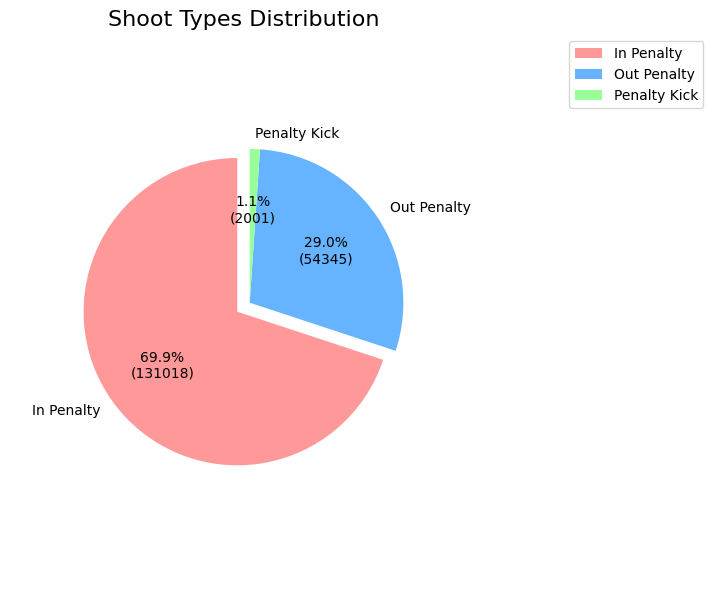

In [ ]:
# 데이터 준비
labels = ['In Penalty', 'Out Penalty', 'Penalty Kick']
sizes = [sum_shootInPenalty, sum_shootOutPenalty, sum_shootPenaltyKick]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # In Penalty 조각을 약간 분리

# 퍼센트와 수치값을 함께 표시하는 함수
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_autopct

# 파이 차트 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')  # 원형으로 보이게 설정

# 제목 추가
plt.title('Shoot Types Distribution', fontsize=16)

# 범례 추가
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# 차트 표시
plt.tight_layout()
plt.show()

총 득점 구성 비율

---



In [ ]:
data = df_copy

# 각 shoot 관련 컬럼의 합계 계산
sum_goalTotal = data['shoot.goalTotal'].sum()
sum_goalInPenalty = data['shoot.goalInPenalty'].sum()
sum_goalOutPenalty = data['shoot.goalOutPenalty'].sum()
sum_goalPenaltyKick = data['shoot.goalPenaltyKick'].sum()

# 합계를 기준으로 비율 계산 (100% 기준)
percent_goalInPenalty = (sum_goalInPenalty / sum_goalTotal) * 100
percent_goalOutPenalty = (sum_goalOutPenalty / sum_goalTotal) * 100
percent_goalPenaltyKick = (sum_goalPenaltyKick / sum_goalTotal) * 100

# 결과 출력
print("Sum of shoot.goalTotal:", sum_goalTotal)
print("Sum of shoot.goalInPenalty:", sum_goalInPenalty)
print("Sum of shoot.goalOutPenalty:", sum_goalOutPenalty)
print("Sum of shoot.goalPenaltyKick:", sum_goalPenaltyKick)

print("\nPercentage of shoot.goalTotal:")
print(f"shoot.goalInPenalty: {percent_goalInPenalty:.2f}%")
print(f"shoot.goalOutPenalty: {percent_goalOutPenalty:.2f}%")
print(f"shoot.goalPenaltyKick: {percent_goalPenaltyKick:.2f}%")

Sum of shoot.goalTotal: 53291.0
Sum of shoot.goalInPenalty: 43740.0
Sum of shoot.goalOutPenalty: 8137.0
Sum of shoot.goalPenaltyKick: 1414.0

Percentage of shoot.goalTotal:
shoot.goalInPenalty: 82.08%
shoot.goalOutPenalty: 15.27%
shoot.goalPenaltyKick: 2.65%


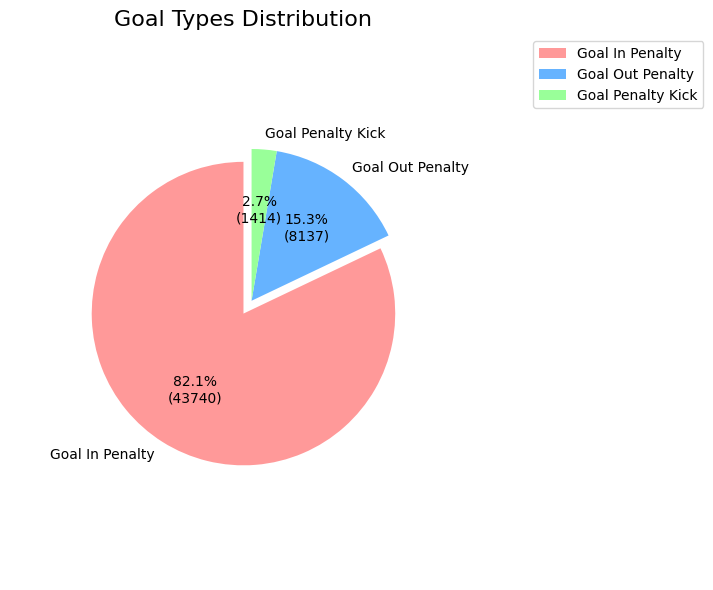

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비
labels = ['Goal In Penalty', 'Goal Out Penalty', 'Goal Penalty Kick']
sizes = [sum_goalInPenalty, sum_goalOutPenalty, sum_goalPenaltyKick]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # Goal In Penalty 조각을 약간 분리

# 퍼센트와 수치값을 함께 표시하는 함수
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_autopct

# 파이 차트 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')  # 원형으로 보이게 설정

# 제목 추가
plt.title('Goal Types Distribution', fontsize=16)

# 범례 추가
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# 차트 표시
plt.tight_layout()
plt.show()

In [ ]:
shoot_df['result'].value_counts()

result
1    82518
2    57026
3    53219
Name: count, dtype: int64

### IN & OUT Penalty shooting

---



**FIFA 공식 경기장 사이즈 규정사이즈**

- 길이(터치라인): 100-110m
- 너비(골라인): 64-75m


---



여기서는 큰 경기장의 기준인 110m, 75m를 기준으로 사용하였으며,  이 $x, y$ 좌표를 계산하면 다음과 같이 표현할 수 있다.

$x$ 좌표 (너비): $x$ * 75m ≈ $\text{X}_{w}$m

$y$ 좌표 (길이): $y$ * 110m ≈ $\text{Y}_{l}$m

좌표의 값은 0, 1 사이의 값으로 이루어져 있으므로 왼쪽 아래 코너를 기준으로 너비와 길이에 대한 거리 지점의 백분율이 소수점 표기법으로 좌표 변환되어 있다는 것을 알 수 있습니다.


득점, 유효슈팅, 비유효슈팅 데이터 프레임 분리

---



In [ ]:
# goal
goal_df = shoot_copy[shoot_copy['result'] == 3]
goal_df

Unnamed: 0  goalTime         x         y  type  result       spId  \
1                1  16778737  0.962043  0.424951     2       3  284007826   
4                4  16778259  0.806986  0.605343     2       3  234013128   
6                6  16778965  0.835881  0.532648     2       3  256003647   
8                8  16779686  0.879747  0.519060     7       3  234013128   
21              21  16777415  0.928985  0.482837     2       3  274045661   
...            ...       ...       ...       ...   ...     ...        ...   
192752      192752  16777420  0.883989  0.539647     2       3  252214100   
192753      192753  16777706  0.944571  0.402211     2       3  256156616   
192757      192757  16778725  0.871235  0.461040     2       3  808188545   
192761      192761  16779638  0.867169  0.383622     2       3  808188545   
192762      192762  16780114  0.834959  0.416235     2       3  252214100   

        spGrade  spLevel  spIdType  assist  assistSpId   assistX   assistY  \
1             4        5      True    True   808243780  0.984997  0.294279   
4             9        5      True    True   231180403  0.476803  0.777805   
6             7        5      True    True   234013128  0.735184  0.714514   
8             9        5      True    True   231180403  0.891685  0.763359   
21            5        3      True    True   256020801  0.973403  0.316337   
...         ...      ...       ...     ...         ...       ...       ...   
192752        8        5      True    True   808188545  0.612699  0.840120   
192753        8        5      True    True   808188545  0.719223  0.628688   
192757        5        5      True    True   246001620  0.686992  0.298873   
192761        5        5      True    True   252214100  0.470326  0.582728   
192762        8        5      True    True   808188545  0.501371  0.503204   

        hitPost  inPenalty                              ouid  
1         False       True  bbe1b626fa8cc0a7356834ef214b239f  
4          True      False  1488eaf6743300317561d3f70793a179  
6         False      False  1488eaf6743300317561d3f70793a179  
8         False       True  1488eaf6743300317561d3f70793a179  
21        False       True  85683bc61266341334e31b760a9257ea  
...         ...        ...                               ...  
192752    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192753    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192757    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192761    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192762    False      False  7d2280a4a33957a974c30bdd9ddbaa9d  

[53219 rows x 17 columns]

In [ ]:
# offtarget
offtarget_df = shoot_copy[shoot_copy['result'] == 2]
offtarget_df

Unnamed: 0  goalTime         x         y  type  result       spId  \
5                5  16778562  0.833977  0.469616     1       2  233215914   
7                7  16779207  0.871485  0.509983     1       2  256003647   
9                9  16780051  0.791149  0.408317     1       2  256003647   
10              10       554  0.795634  0.453719     2       2  273173731   
12              12      1649  0.983362  0.613786     2       2  283004000   
...            ...       ...       ...       ...   ...     ...        ...   
192734      192734  16777823  0.829770  0.650564     1       2  273203376   
192751      192751      2550  0.905132  0.477264     1       2  808188545   
192754      192754  16777971  0.888277  0.394347     2       2  256156616   
192756      192756  16778542  0.893711  0.530676     3       2  252214100   
192758      192758  16779068  0.852757  0.593319     2       2  268001201   

        spGrade  spLevel  spIdType  assist  assistSpId   assistX   assistY  \
5             8        5      True   False          -1  0.500000  0.500000   
7             7        5      True   False          -1  0.500000  0.500000   
9             7        5      True   False          -1  0.500000  0.500000   
10            5        5      True    True   274182521  0.595623  0.188407   
12            5        5      True    True   289001419  0.609888  0.533827   
...         ...      ...       ...     ...         ...       ...       ...   
192734        5        4      True    True   101247515  0.871357  0.680803   
192751        5        5      True   False          -1  0.500000  0.500000   
192754        8        5      True    True   251166120  0.353043  0.168140   
192756        8        5      True   False          -1  0.500000  0.500000   
192758        8        5      True    True   252214100  0.412476  0.552625   

        hitPost  inPenalty                              ouid  
5         False      False  1488eaf6743300317561d3f70793a179  
7         False       True  1488eaf6743300317561d3f70793a179  
9         False      False  1488eaf6743300317561d3f70793a179  
10        False      False  cde51bb856ef3047de05f2b6add99216  
12        False       True  cde51bb856ef3047de05f2b6add99216  
...         ...        ...                               ...  
192734    False      False  25e7b816dfff641f1bf2c74c617d67fa  
192751    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192754    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192756     True       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192758    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  

[57026 rows x 17 columns]

In [ ]:
# ontarget
ontarget_df  = shoot_copy[shoot_copy['result'] == 1]
ontarget_df

Unnamed: 0  goalTime         x         y  type  result       spId  \
0                0  16777555  0.880175  0.478762     2       1  808243780   
2                2      2858  0.838890  0.443212     2       1  233215914   
3                3  16777912  0.850111  0.597265     2       1  231180403   
11              11       942  0.952992  0.338538     3       1  273173731   
13              13      2011  0.912548  0.501965     3       1  256192181   
...            ...       ...       ...       ...   ...     ...        ...   
192744      192744  16778332  0.862295  0.452238     1       1  270231943   
192748      192748      1297  0.834330  0.364089     2       1  251166120   
192755      192755  16778471  0.844721  0.373954     2       1  256156616   
192759      192759  16779359  0.894576  0.578691     2       1  268001201   
192760      192760  16779383  0.923866  0.357527     3       1  808188545   

        spGrade  spLevel  spIdType  assist  assistSpId   assistX   assistY  \
0             3        5      True    True   256222492  0.603827  0.468458   
2             8        5      True    True   237209331  0.618293  0.568166   
3             9        5      True    True   270238074  0.798361  0.520681   
11            5        5      True   False          -1  0.500000  0.500000   
13            6        5      True   False          -1  0.500000  0.500000   
...         ...      ...       ...     ...         ...       ...       ...   
192744        6        5      True    True   270236480  0.688174  0.434258   
192748        8        5      True    True   256156616  0.481805  0.284415   
192755        8        5      True    True   252214100  0.422285  0.458019   
192759        8        5      True    True   272003647  0.506684  0.467272   
192760        5        5      True   False          -1  0.500000  0.500000   

        hitPost  inPenalty                              ouid  
0         False       True  bbe1b626fa8cc0a7356834ef214b239f  
2          True      False  1488eaf6743300317561d3f70793a179  
3         False       True  1488eaf6743300317561d3f70793a179  
11        False       True  cde51bb856ef3047de05f2b6add99216  
13        False       True  cde51bb856ef3047de05f2b6add99216  
...         ...        ...                               ...  
192744    False       True  c85fa383fc4a6fb4230fd5247e0def0d  
192748    False      False  7d2280a4a33957a974c30bdd9ddbaa9d  
192755    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192759     True       True  7d2280a4a33957a974c30bdd9ddbaa9d  
192760    False       True  7d2280a4a33957a974c30bdd9ddbaa9d  

[82518 rows x 17 columns]

경기장 도식 함수화


---



In [ ]:
def draw_soccer_field(ax, field_length=110, field_width=75):
    # 필드 배경 그리기
    ax.plot([0, field_length, field_length, 0, 0], [0, 0, field_width, field_width, 0], color="white")
    ax.fill([0, field_length, field_length, 0, 0], [0, 0, field_width, field_width, 0], color="black", alpha=0.7)

    # 중앙선 그리기
    ax.plot([field_length / 2, field_length / 2], [0, field_width], color="white", lw=2)

    # 중앙 원 그리기
    center_circle = plt.Circle((field_length / 2, field_width / 2), 9.15, color="white", fill=False, lw=2)
    ax.add_patch(center_circle)

    # 패널티 에어리어 그리기
    penalty_area_length, penalty_area_width = 16.5, 40.3
    ax.plot([0, penalty_area_length, penalty_area_length, 0],
            [field_width / 2 - penalty_area_width / 2, field_width / 2 - penalty_area_width / 2,
             field_width / 2 + penalty_area_width / 2, field_width / 2 + penalty_area_width / 2], color="white", lw=2)
    ax.plot([field_length, field_length - penalty_area_length, field_length - penalty_area_length, field_length],
            [field_width / 2 - penalty_area_width / 2, field_width / 2 - penalty_area_width / 2,
             field_width / 2 + penalty_area_width / 2, field_width / 2 + penalty_area_width / 2], color="white", lw=2)

    # 패널티 에어리어의 둥근 선 그리기
    left_penalty_arc = patches.Arc((11, field_width / 2), 18.3, 18.3, angle=0, theta1=307, theta2=53, color="white", lw=2)
    right_penalty_arc = patches.Arc((field_length - 11, field_width / 2), 18.3, 18.3, angle=0, theta1=127, theta2=233, color="white", lw=2)
    ax.add_patch(left_penalty_arc)
    ax.add_patch(right_penalty_arc)

    # 골 에어리어 그리기
    goal_area_length, goal_area_width = 5.5, 18.32
    ax.plot([0, goal_area_length, goal_area_length, 0],
            [field_width / 2 - goal_area_width / 2, field_width / 2 - goal_area_width / 2,
             field_width / 2 + goal_area_width / 2, field_width / 2 + goal_area_width / 2], color="white", lw=2)
    ax.plot([field_length, field_length - goal_area_length, field_length - goal_area_length, field_length],
            [field_width / 2 - goal_area_width / 2, field_width / 2 - goal_area_width / 2,
             field_width / 2 + goal_area_width / 2, field_width / 2 + goal_area_width / 2], color="white", lw=2)

    # 골대 그리기
    goal_width = 7.32
    ax.plot([(field_length / 2) - (goal_width / 2), (field_length / 2) + (goal_width / 2)], [0, 0], color="white", lw=5)
    ax.plot([(field_length / 2) - (goal_width / 2), (field_length / 2) + (goal_width / 2)], [field_width, field_width], color="white", lw=5)

    # 필드 설정
    ax.set_xlim(0, field_length)
    ax.set_ylim(0, field_width)
    ax.set_aspect('equal', adjustable='box')

득점 Scatter Plot

---


패널티 에어리어 안의 점 개수: 820 (82.00%)
패널티 에어리어 밖의 점 개수: 180 (18.00%)


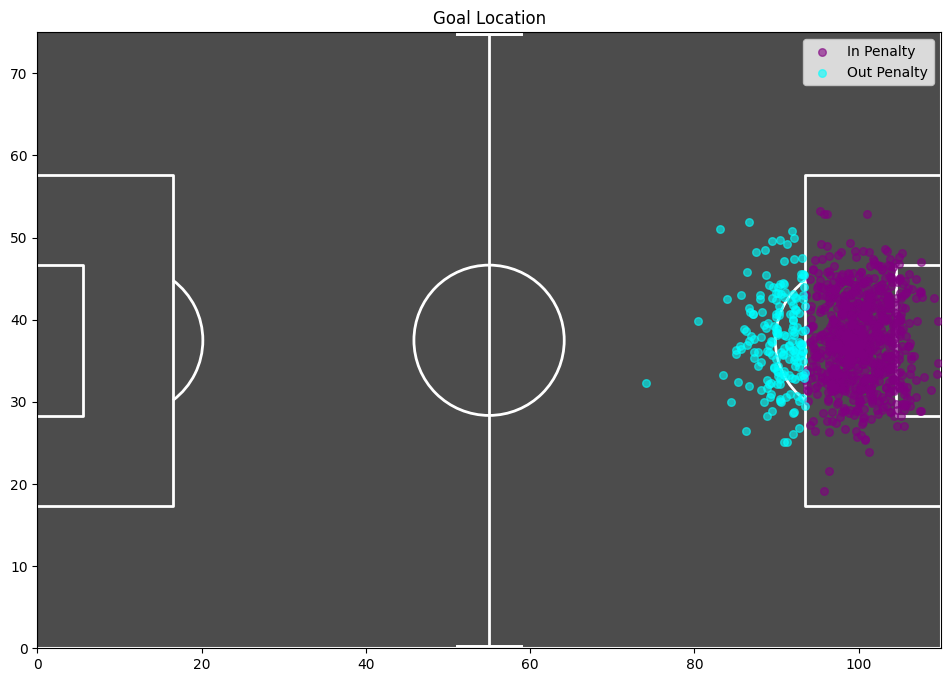

In [ ]:
# n개 데이터 사용
sng_df = goal_df.head(1000)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = sng_df['x'] * field_length
actual_y = sng_df['y'] * field_width

# 패널티 에어리어 범위 정의
penalty_area_length = 16.5
penalty_area_width = 40.3

# 패널티 에어리어 안과 밖의 점 구분
inside_penalty = ((actual_x <= penalty_area_length) | (actual_x >= (field_length - penalty_area_length))) & \
                 ((actual_y >= (field_width / 2 - penalty_area_width / 2)) & (actual_y <= (field_width / 2 + penalty_area_width / 2)))

outside_penalty = ~inside_penalty

# 패널티 에어리어 안과 밖의 점 개수 계산
inside_penalty_count = inside_penalty.sum()
outside_penalty_count = outside_penalty.sum()

# 전체 점 개수 계산
total_points = len(sng_df)

# 비율 계산
inside_penalty_ratio = inside_penalty_count / total_points * 100
outside_penalty_ratio = outside_penalty_count / total_points * 100

# 결과 출력
print(f"패널티 에어리어 안의 점 개수: {inside_penalty_count} ({inside_penalty_ratio:.2f}%)")
print(f"패널티 에어리어 밖의 점 개수: {outside_penalty_count} ({outside_penalty_ratio:.2f}%)")

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 패널티 에어리어 안의 점들 그리기 (보라색)
ax.scatter(actual_x[inside_penalty], actual_y[inside_penalty], s=30, color="purple", zorder=5, alpha=0.6, label='In Penalty')

# 패널티 에어리어 밖의 점들 그리기 (청록색)
ax.scatter(actual_x[outside_penalty], actual_y[outside_penalty], s=30, color="cyan", zorder=5, alpha=0.6, label='Out Penalty')

plt.title("Goal Location")
plt.legend()
plt.show()

비유효슈팅 Scatter Plot

---



패널티 에어리어 안의 점 개수: 597 (59.70%)
패널티 에어리어 밖의 점 개수: 403 (40.30%)


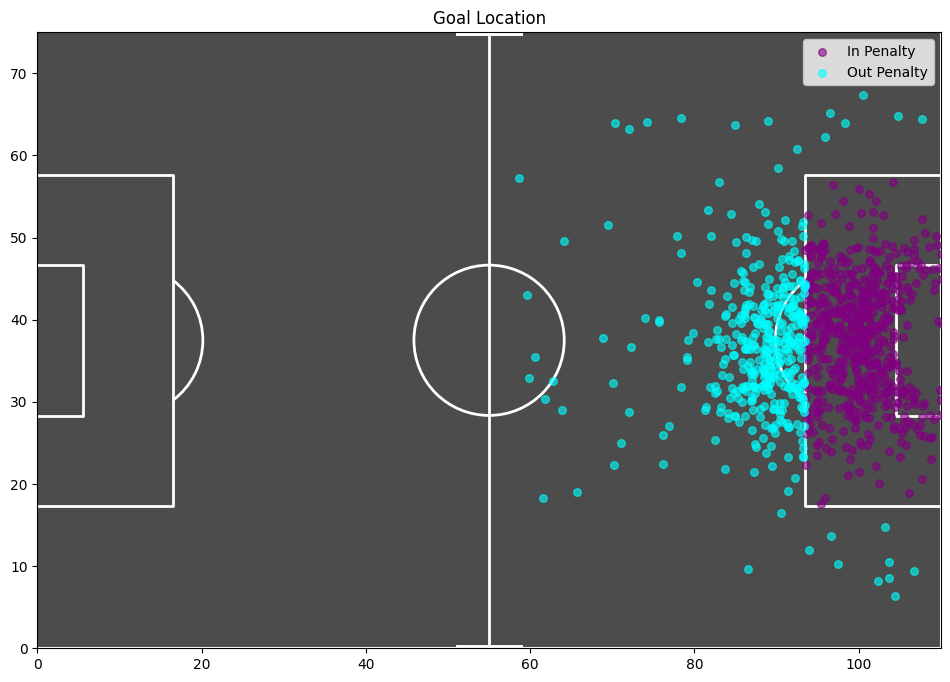

In [ ]:
# n개 데이터 사용
sng_df = offtarget_df.head(1000)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = sng_df['x'] * field_length
actual_y = sng_df['y'] * field_width

# 패널티 에어리어 범위 정의
penalty_area_length = 16.5
penalty_area_width = 40.3

# 패널티 에어리어 안과 밖의 점 구분
inside_penalty = ((actual_x <= penalty_area_length) | (actual_x >= (field_length - penalty_area_length))) & \
                 ((actual_y >= (field_width / 2 - penalty_area_width / 2)) & (actual_y <= (field_width / 2 + penalty_area_width / 2)))

outside_penalty = ~inside_penalty

# 패널티 에어리어 안과 밖의 점 개수 계산
inside_penalty_count = inside_penalty.sum()
outside_penalty_count = outside_penalty.sum()

# 전체 점 개수 계산
total_points = len(sng_df)

# 비율 계산
inside_penalty_ratio = inside_penalty_count / total_points * 100
outside_penalty_ratio = outside_penalty_count / total_points * 100

# 결과 출력
print(f"패널티 에어리어 안의 점 개수: {inside_penalty_count} ({inside_penalty_ratio:.2f}%)")
print(f"패널티 에어리어 밖의 점 개수: {outside_penalty_count} ({outside_penalty_ratio:.2f}%)")

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 패널티 에어리어 안의 점들 그리기 (보라색)
ax.scatter(actual_x[inside_penalty], actual_y[inside_penalty], s=30, color="purple", zorder=5, alpha=0.6, label='In Penalty')

# 패널티 에어리어 밖의 점들 그리기 (청록색)
ax.scatter(actual_x[outside_penalty], actual_y[outside_penalty], s=30, color="cyan", zorder=5, alpha=0.6, label='Out Penalty')

plt.title("Goal Location")
plt.legend()
plt.show()

유효슈팅 Scatter Plot

---



패널티 에어리어 안의 점 개수: 663 (66.30%)
패널티 에어리어 밖의 점 개수: 337 (33.70%)


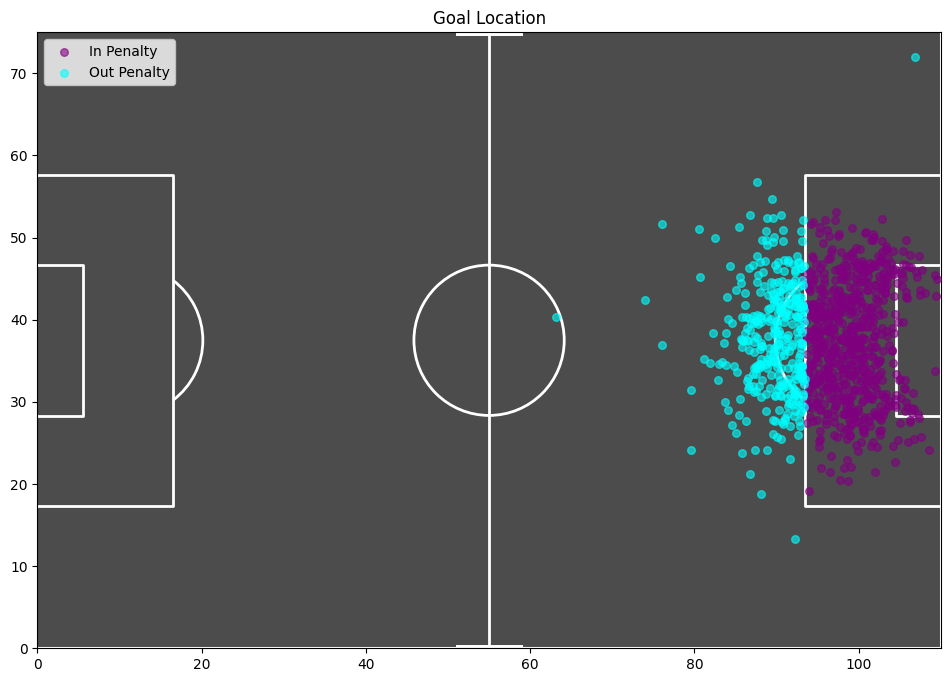

In [ ]:
# n개 데이터 사용
sng_df = ontarget_df.head(1000)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = sng_df['x'] * field_length
actual_y = sng_df['y'] * field_width

# 패널티 에어리어 범위 정의
penalty_area_length = 16.5
penalty_area_width = 40.3

# 패널티 에어리어 안과 밖의 점 구분
inside_penalty = ((actual_x <= penalty_area_length) | (actual_x >= (field_length - penalty_area_length))) & \
                 ((actual_y >= (field_width / 2 - penalty_area_width / 2)) & (actual_y <= (field_width / 2 + penalty_area_width / 2)))

outside_penalty = ~inside_penalty

# 패널티 에어리어 안과 밖의 점 개수 계산
inside_penalty_count = inside_penalty.sum()
outside_penalty_count = outside_penalty.sum()

# 전체 점 개수 계산
total_points = len(sng_df)

# 비율 계산
inside_penalty_ratio = inside_penalty_count / total_points * 100
outside_penalty_ratio = outside_penalty_count / total_points * 100

# 결과 출력
print(f"패널티 에어리어 안의 점 개수: {inside_penalty_count} ({inside_penalty_ratio:.2f}%)")
print(f"패널티 에어리어 밖의 점 개수: {outside_penalty_count} ({outside_penalty_ratio:.2f}%)")

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 패널티 에어리어 안의 점들 그리기 (보라색)
ax.scatter(actual_x[inside_penalty], actual_y[inside_penalty], s=30, color="purple", zorder=5, alpha=0.6, label='In Penalty')

# 패널티 에어리어 밖의 점들 그리기 (청록색)
ax.scatter(actual_x[outside_penalty], actual_y[outside_penalty], s=30, color="cyan", zorder=5, alpha=0.6, label='Out Penalty')

plt.title("Goal Location")
plt.legend()
plt.show()

###**슛 타입**

---

위 가설에 이어 그럼 패널티 구역 내외에서 가장 많이 시도한 슛 타입과 가장 득점이 많은 슛 타입이 무엇인지 확인해보았습니다.

슛 타입 정의(FCO 기준)

---



In [ ]:
# 슛 타입
type_descriptions = {
    1: "normal", # 기본슛
    2: "finesse", # 감아차기 슛
    3: "header", # 헤딩슛
    4: "lob", # 로빙슛
    5: "flare", #  플레어슛
    6: "low", # 낮은 슛
    7: "volley", # 발리
    8: "free-kick", # 프리킥
    9: "penalty", # 페널티킥
    10: "KNUCKLE", # 무회전슛
    11: "BICYCLE", # 바이시클킥
    12: "super" # 파워샷
}

IN Penalty 슛 타입

---



In [ ]:
data = shoot_copy

# 조건에 맞는 데이터 필터링 (inPenalty가 True이고 result가 1, 2, 3인 경우)
filtered_data = data[(data['inPenalty'] == False) & (data['result'].isin([1, 2, 3]))]

# 각 type별로 전체 시도 횟수와 골 횟수를 계산
print("슛 대비 골의 비율 (Out_Penalty):")
for type_code, description in type_descriptions.items():
    type_data = filtered_data[filtered_data['type'] == type_code]
    result_counts = type_data['result'].value_counts()

    total_attempts = result_counts.sum()
    goals = result_counts.get(3, 0)

    if total_attempts > 0:
        goal_percentage = (goals / total_attempts) * 100
        print(f"{description} - 시도: {total_attempts}, 골: {goals}, 비율: {goal_percentage:.2f}%")
    else:
        print(f"{description} - 데이터 없음")

슛 대비 골의 비율 (Out_Penalty):
normal - 시도: 19440, 골: 1824, 비율: 9.38%
finesse - 시도: 24189, 골: 5095, 비율: 21.06%
header - 시도: 581, 골: 6, 비율: 1.03%
lob - 시도: 697, 골: 236, 비율: 33.86%
flare - 데이터 없음
low - 시도: 631, 골: 45, 비율: 7.13%
volley - 시도: 1148, 골: 58, 비율: 5.05%
free-kick - 시도: 3124, 골: 192, 비율: 6.15%
penalty - 데이터 없음
KNUCKLE - 시도: 1549, 골: 182, 비율: 11.75%
BICYCLE - 데이터 없음
super - 시도: 4154, 골: 502, 비율: 12.08%


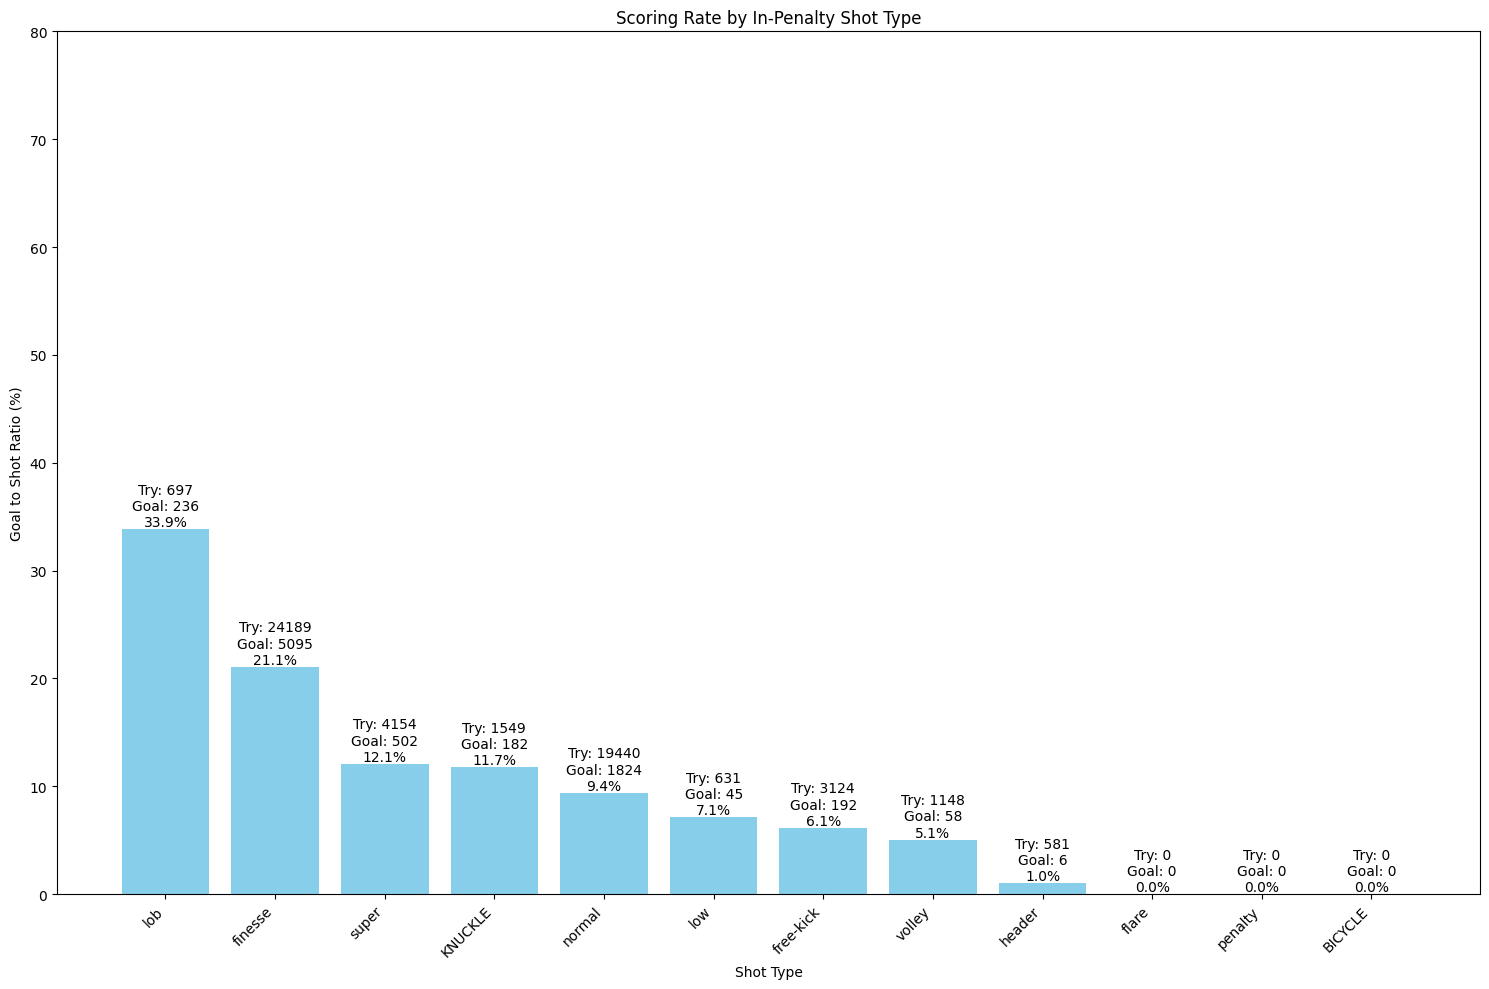

In [ ]:
# 데이터와 설명을 저장하는 리스트
types = []
goal_percentages = []
attempts = []
goals = []

# 분석 결과를 담는 변수에 데이터를 저장하는 코드
filtered_data = data[(data['inPenalty'] == False) & (data['result'].isin([1, 2, 3]))]
for type_code, description in type_descriptions.items():
    type_data = filtered_data[filtered_data['type'] == type_code]
    result_counts = type_data['result'].value_counts()

    total_attempts = result_counts.sum()
    total_goals = result_counts.get(3, 0)

    if total_attempts > 0:
        goal_percentage = (total_goals / total_attempts) * 100
    else:
        goal_percentage = 0

    types.append(description)
    goal_percentages.append(goal_percentage)
    attempts.append(total_attempts)
    goals.append(total_goals)

# 데이터프레임으로 변환 후 내림차순 정렬
import pandas as pd

df = pd.DataFrame({'Type': types, 'GoalPercentage': goal_percentages, 'Attempts': attempts, 'Goals': goals})
df = df.sort_values(by='GoalPercentage', ascending=False)

# 정렬된 데이터를 이용해 비율 막대 그래프 그리기
plt.figure(figsize=(15, 10))
bars = plt.bar(df['Type'], df['GoalPercentage'], color='skyblue')
plt.xlabel('Shot Type')
plt.ylabel('Goal to Shot Ratio (%)')
plt.title('Scoring Rate by In-Penalty Shot Type')
plt.ylim(0, 80)  # y축의 최대값을 80으로 설정
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 시도 횟수, 골 수, 비율을 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Try: {df["Attempts"].iloc[i]}\nGoal: {df["Goals"].iloc[i]}\n{height:.1f}%',
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

OUT Penalty 슛 타입

---



In [ ]:
data = shoot_copy

# 조건에 맞는 데이터 필터링 (inPenalty가 True이고 result가 1, 2, 3인 경우)
filtered_data = data[(data['inPenalty'] == True) & (data['result'].isin([1, 2, 3]))]

# 각 type별로 전체 시도 횟수와 골 횟수를 계산
print("슛 대비 골의 비율 (In_Penalty):")
for type_code, description in type_descriptions.items():
    type_data = filtered_data[filtered_data['type'] == type_code]
    result_counts = type_data['result'].value_counts()

    total_attempts = result_counts.sum()
    goals = result_counts.get(3, 0)

    if total_attempts > 0:
        goal_percentage = (goals / total_attempts) * 100
        print(f"{description} - 시도: {total_attempts}, 골: {goals}, 비율: {goal_percentage:.2f}%")
    else:
        print(f"{description} - 데이터 없음")

슛 대비 골의 비율 (In_Penalty):
normal - 시도: 41140, 골: 12114, 비율: 29.45%
finesse - 시도: 44096, 골: 17868, 비율: 40.52%
header - 시도: 27554, 골: 5392, 비율: 19.57%
lob - 시도: 704, 골: 93, 비율: 13.21%
flare - 시도: 1, 골: 0, 비율: 0.00%
low - 시도: 13732, 골: 5531, 비율: 40.28%
volley - 시도: 5966, 골: 2125, 비율: 35.62%
free-kick - 시도: 22, 골: 4, 비율: 18.18%
penalty - 시도: 1995, 골: 1409, 비율: 70.63%
KNUCKLE - 시도: 195, 골: 7, 비율: 3.59%
BICYCLE - 시도: 3, 골: 0, 비율: 0.00%
super - 시도: 1842, 골: 536, 비율: 29.10%


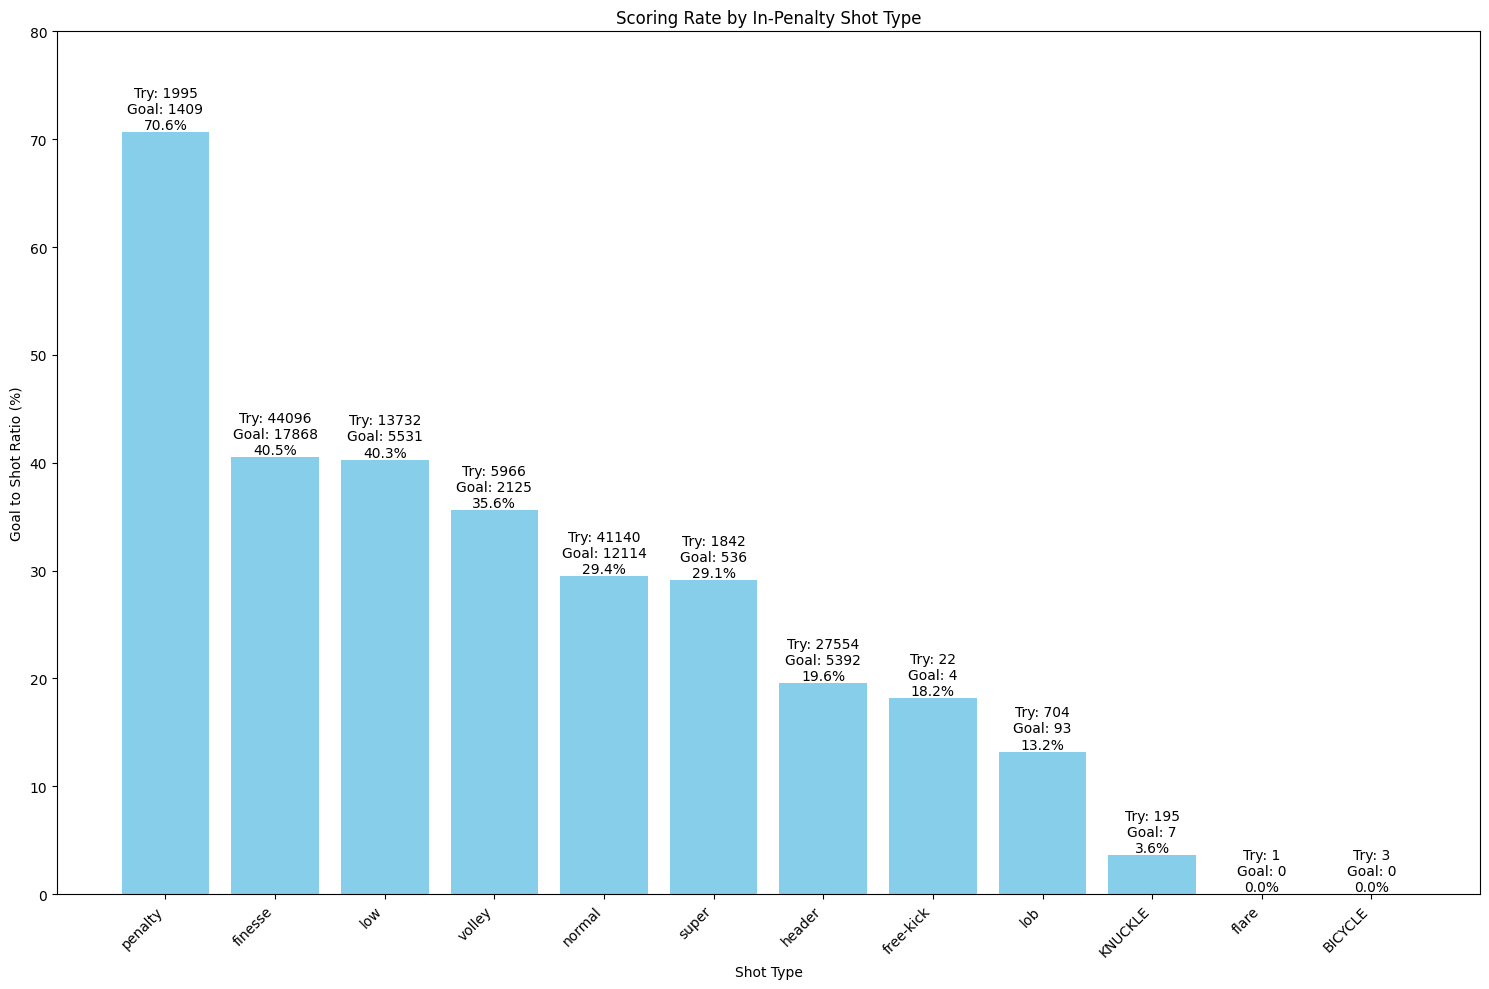

In [ ]:
# 데이터와 설명을 저장하는 리스트
types = []
goal_percentages = []
attempts = []
goals = []

# 분석 결과를 담는 변수에 데이터를 저장하는 코드
filtered_data = data[(data['inPenalty'] == True) & (data['result'].isin([1, 2, 3]))]
for type_code, description in type_descriptions.items():
    type_data = filtered_data[filtered_data['type'] == type_code]
    result_counts = type_data['result'].value_counts()

    total_attempts = result_counts.sum()
    total_goals = result_counts.get(3, 0)

    if total_attempts > 0:
        goal_percentage = (total_goals / total_attempts) * 100
    else:
        goal_percentage = 0

    types.append(description)
    goal_percentages.append(goal_percentage)
    attempts.append(total_attempts)
    goals.append(total_goals)

# 데이터프레임으로 변환 후 내림차순 정렬
import pandas as pd

df = pd.DataFrame({'Type': types, 'GoalPercentage': goal_percentages, 'Attempts': attempts, 'Goals': goals})
df = df.sort_values(by='GoalPercentage', ascending=False)

# 정렬된 데이터를 이용해 비율 막대 그래프 그리기
plt.figure(figsize=(15, 10))
bars = plt.bar(df['Type'], df['GoalPercentage'], color='skyblue')
plt.xlabel('Shot Type')
plt.ylabel('Goal to Shot Ratio (%)')
plt.title('Scoring Rate by In-Penalty Shot Type')
plt.ylim(0, 80)  # y축의 최대값을 80으로 설정
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 시도 횟수, 골 수, 비율을 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Try: {df["Attempts"].iloc[i]}\nGoal: {df["Goals"].iloc[i]}\n{height:.1f}%',
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

슛 타입별 좌표 Scatter Plot

---



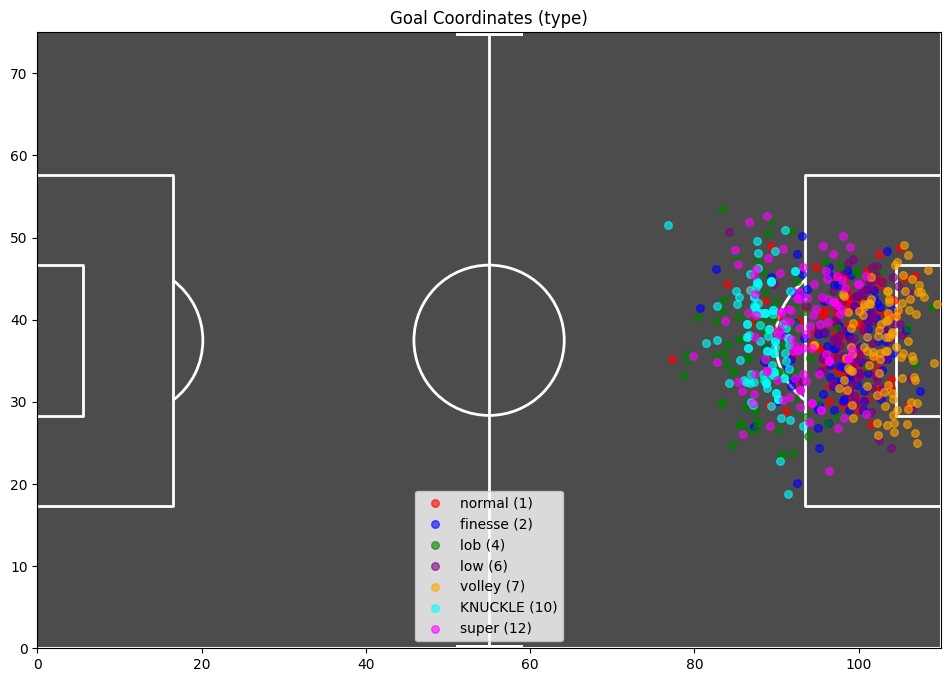

In [ ]:
# 골이 든 경우 (result가 3일 때) 필터링
type_df = goal_df[goal_df['result'] == 3]

# 각 type당 100개씩 샘플링
sampled_goal_df = type_df.groupby('type').apply(lambda x: x.sample(n=100, replace=True)).reset_index(drop=True)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
sampled_goal_df['actual_x'] = sampled_goal_df['x'] * field_length
sampled_goal_df['actual_y'] = sampled_goal_df['y'] * field_width

# 색상 정의 (type별) 및 범례
colors = {1: 'red', 2: 'blue', 4: 'green', 6: 'purple', 7: 'orange', 10: 'cyan', 12: 'magenta'}
labels = {1: 'normal', 2: 'finesse', 4: 'lob', 6: 'low', 7: 'volley', 10: 'KNUCKLE', 12: 'super'}

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# type에 따른 점들 그리기
for t, color in colors.items():
    type_points = sampled_goal_df[sampled_goal_df['type'] == t]
    ax.scatter(type_points['actual_x'], type_points['actual_y'], s=30, color=color, zorder=5, alpha=0.6, label=f'{labels[t]} ({t})')

plt.title("Goal Coordinates (type)")
plt.legend()
plt.show()

Out_Penalty 에서는 lob, finesse가 비교적 높게 나타났고, 다음으로 super, KNUCKLE, normal이 비슷한 득점 성공률을 보이고 있으며, 시도한 횟수 대비 성공률이 낮다고 판단되는 finesse, normal도 확인해볼 수 있었습니다.

In_Penalty 에서는 penalty kick이 압도적으로 성공률이 높은걸 알수 있고 일반적으로 finesse, low, vollye를 선두로 normal, super 의 순으로 득점 성공률이 나타나는 걸 볼수 있습니다. 또한, Out_Penalty와는 비교되는 부분이 있는데 우선 마찬가지로 finesse, normal을 가장 많이 시도하고 있고 시도한 횟수 대비 성공률도 finesse는 약 2배, normal은 약 3배 가량 높은 득점 성공률을 확인해볼 수 있었습니다.

(In_Penalty에서도 free-kick이 존재하는데 이는 간접프리킥으로 판단됩니다.)

### **코너킥 어시스트**

---

이어서 패널티 구역 내에서 슛이 많은데 중요한 세트피스 중 하나인 코너킥에 의한 어시스트로 득점이 어느 정도의 비율을 가지는지 확인해 보았습니다.

득점으로 이어진 어시스트 Scatter Plot

---



패널티 에어리어 안의 점 개수: 197 (19.70%)
패널티 에어리어 밖의 점 개수: 803 (80.30%)


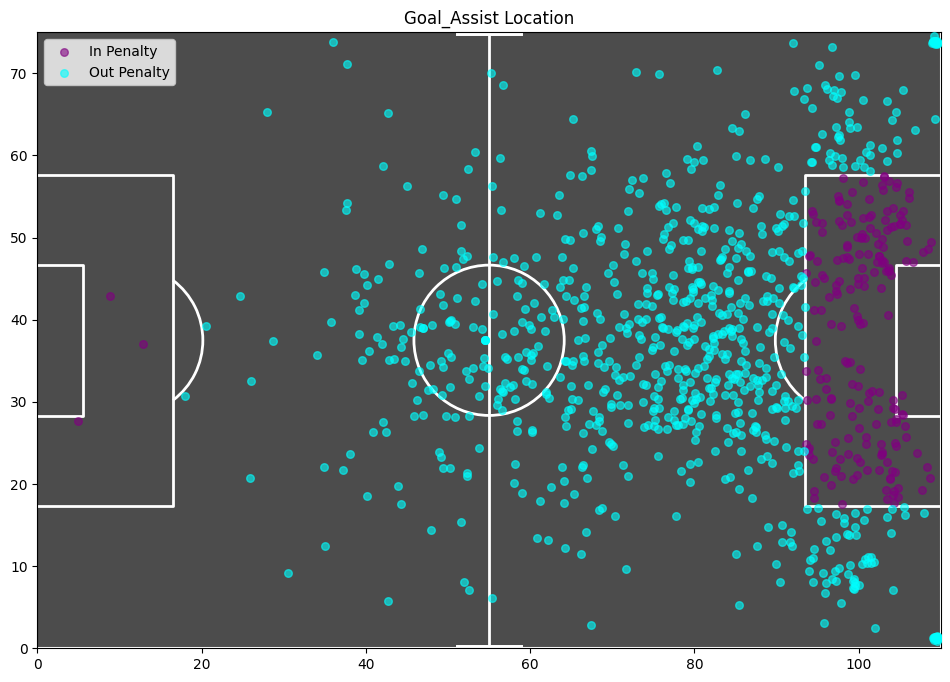

In [ ]:
# n개 데이터 사용
assist_goal_df = goal_df[goal_df['assist'] == True].head(1000)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = assist_goal_df['assistX'] * field_length
actual_y = assist_goal_df['assistY'] * field_width

# 패널티 에어리어 범위 정의
penalty_area_length = 16.5
penalty_area_width = 40.3

# 패널티 에어리어 안과 밖의 점 구분
inside_penalty = ((actual_x <= penalty_area_length) | (actual_x >= (field_length - penalty_area_length))) & \
                 ((actual_y >= (field_width / 2 - penalty_area_width / 2)) & (actual_y <= (field_width / 2 + penalty_area_width / 2)))

outside_penalty = ~inside_penalty

# 패널티 에어리어 안과 밖의 점 개수 계산
inside_penalty_count = inside_penalty.sum()
outside_penalty_count = outside_penalty.sum()

# 전체 점 개수 계산
total_points = len(assist_goal_df)

# 비율 계산
inside_penalty_ratio = inside_penalty_count / total_points * 100
outside_penalty_ratio = outside_penalty_count / total_points * 100

# 결과 출력
print(f"패널티 에어리어 안의 점 개수: {inside_penalty_count} ({inside_penalty_ratio:.2f}%)")
print(f"패널티 에어리어 밖의 점 개수: {outside_penalty_count} ({outside_penalty_ratio:.2f}%)")

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 패널티 에어리어 안의 점들 그리기 (보라색)
ax.scatter(actual_x[inside_penalty], actual_y[inside_penalty], s=30, color="purple", zorder=5, alpha=0.6, label='In Penalty')

# 패널티 에어리어 밖의 점들 그리기 (청록색)
ax.scatter(actual_x[outside_penalty], actual_y[outside_penalty], s=30, color="cyan", zorder=5, alpha=0.6, label='Out Penalty')

plt.title("Goal_Assist Location")
plt.legend()
plt.show()

총 코너킥 횟수

---


In [ ]:
cornerkick = df_copy["matchDetail.cornerKick"].sum()
cornerkick

46859.0

코너킥 어시스트 슈팅 대비 득점 비율

---



In [ ]:
# 데이터 로드
data = shoot_copy  # 이미 로드된 데이터프레임을 사용

# 필드 크기 설정
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 모서리를 중심으로 반경이 4미터인 원 크기의 범위로 지정
radius = 2  # 반경 2미터

# 코너 좌표
corners = [(0, 0), (field_length, 0), (0, field_width), (field_length, field_width)]

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = data['assistX'] * field_length
actual_y = data['assistY'] * field_width

# 코너킥 범위 정의
corner_kick_area = pd.Series([False] * len(data))

for cx, cy in corners:
    corner_kick_area |= ((actual_x - cx) ** 2 + (actual_y - cy) ** 2 <= radius ** 2)

# 코너킥 범위에 assist 좌표가 포함되어있는 좌표의 개수 계산
assist_in_corner_count = corner_kick_area.sum()

# 코너킥 범위에 포함된 assist 좌표 중 result가 3인 경우의 개수 계산
corner_kick_result_3_count = data[corner_kick_area & (data['result'] == 3)].shape[0]

# 비율 계산
corner_kick_result_3_ratio = (corner_kick_result_3_count / assist_in_corner_count) * 100

# 결과 출력
print(f"코너킥 범위에 포함된 assist 좌표의 개수: {assist_in_corner_count}")
print(f"코너킥 범위에서 result가 3인 경우의 수: {corner_kick_result_3_count}")
print(f"비율: {corner_kick_result_3_ratio:.2f}%")

코너킥 범위에 포함된 assist 좌표의 개수: 3962
코너킥 범위에서 result가 3인 경우의 수: 1911
비율: 48.23%


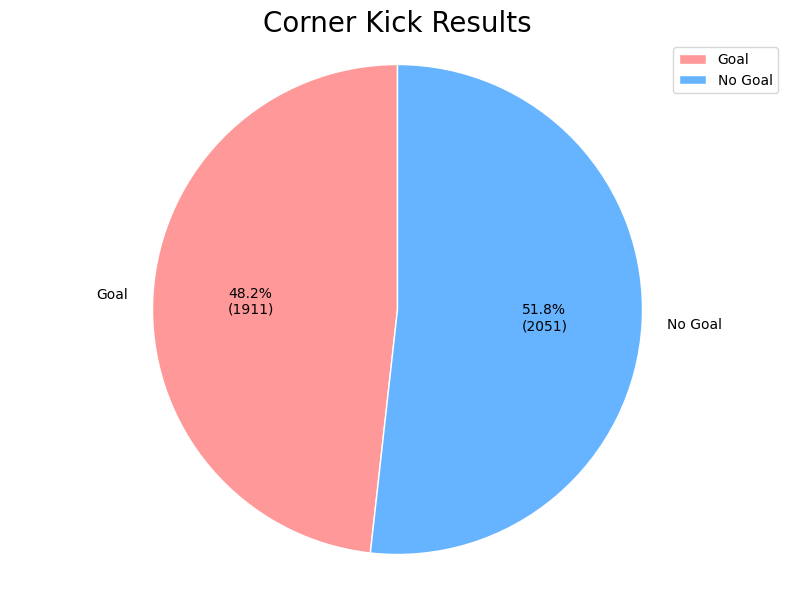

In [ ]:
# 데이터 준비
labels = ['Goal', 'No Goal']
sizes = [corner_kick_result_3_count, assist_in_corner_count - corner_kick_result_3_count]
colors = ['#ff9999', '#66b3ff']

# 사용자 정의 autopct 함수
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_autopct

# 파이 차트 그리기
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes),
        startangle=90, wedgeprops={'edgecolor': 'white'})

# 제목 추가
plt.title('Corner Kick Results', fontsize=20)

# 범례 추가
plt.legend()

# 차트를 원형으로 유지
plt.axis('equal')
# 차트 표시
plt.show()

전체 코너킥 대비 슈팅, 득점 비율

---



In [ ]:
# 데이터 로드
data = shoot_copy  # 이미 로드된 데이터프레임을 사용

# 필드 크기 설정
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 모서리를 중심으로 반경이 4미터인 원 크기의 범위로 지정
radius = 4  # 반경 4미터

# 코너 좌표
corners = [(0, 0), (field_length, 0), (0, field_width), (field_length, field_width)]

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = data['assistX'] * field_length
actual_y = data['assistY'] * field_width

# 코너킥 범위 정의
corner_kick_area = pd.Series([False] * len(data))

for cx, cy in corners:
    corner_kick_area |= ((actual_x - cx) ** 2 + (actual_y - cy) ** 2 <= radius ** 2)

# 코너킥 범위에 assist 좌표가 포함되어있는 좌표의 개수 계산
assist_in_corner_count = corner_kick_area.sum()

# 코너킥 범위에 포함된 assist 좌표 중 result가 3인 경우의 개수 계산
corner_kick_result_3_count = data[corner_kick_area & (data['result'] == 3)].shape[0]

# 총 코너킥 수
total_corner_kicks = cornerkick

# 전체 코너킥에 대한 assist 좌표 개수의 비율 계산 (백분율)
assist_in_corner_ratio = (assist_in_corner_count / total_corner_kicks) * 100

# 전체 코너킥에 대한 result가 3인 경우의 비율 계산 (백분율)
corner_kick_result_3_ratio = (corner_kick_result_3_count / total_corner_kicks) * 100

# 결과 출력
print(f"코너킥 범위에 포함된 assist 좌표의 개수: {assist_in_corner_count}")
print(f"전체 코너킥 수: {total_corner_kicks}")
print(f"전체 코너킥에 대한 assist 좌표 개수의 비율: {assist_in_corner_ratio:.2f}%")
print(f"전체 코너킥에 대한 result가 3인 경우의 비율: {corner_kick_result_3_ratio:.2f}%")

코너킥 범위에 포함된 assist 좌표의 개수: 3970
전체 코너킥 수: 46859.0
전체 코너킥에 대한 assist 좌표 개수의 비율: 8.47%
전체 코너킥에 대한 result가 3인 경우의 비율: 4.08%


약 48%의 성공률을 보이고 있으며, 코너킥이 어시스트가 된 경우가 아닌 총 코너킥 수 대비 어느 정도의 득점 성공률을 보이는지 확인해보았습니다.

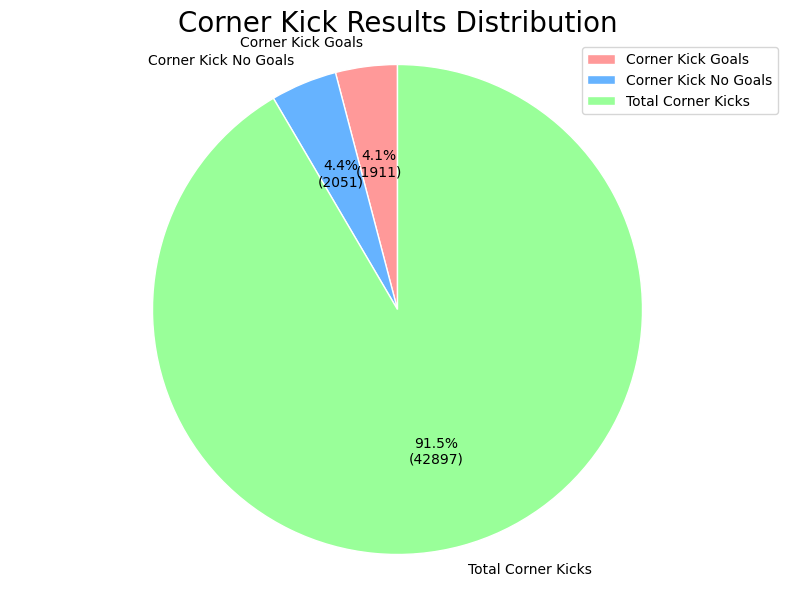

In [ ]:
# 데이터 준비
labels = ['Corner Kick Goals', 'Corner Kick No Goals', 'Total Corner Kicks']
sizes = [
    corner_kick_result_3_count,
    assist_in_corner_count - corner_kick_result_3_count,
    total_corner_kicks - assist_in_corner_count
]
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 사용자 정의 autopct 함수
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_autopct

# 파이 차트 그리기
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes),
        startangle=90, wedgeprops={'edgecolor': 'white'})

# 제목 추가
plt.title('Corner Kick Results Distribution', fontsize=20)

# 범례 추가
plt.legend()

# 차트를 원형으로 유지
plt.axis('equal')

# 차트 표시
plt.show()

전체 코너킥 대비 코너킥이 어시스트로 이어진 경우는 약 8.5%이며, 득점으로 이어진 코너킥 어시스트는 약 4.1%의 득점 성공률을 보이고 있으며, 이는 아주 근소한 수치임을 알 수 있습니다.

결과적으로 상황에 맞는 슈팅을 하는 것이 효율적인데 패널티 구역 내에서는 normal,  low, volley 를 시도하는 것이 좋고, 패널티 구역 밖에서는 lob, KNUCKLE 를, 패널티 구역 내외를 구분하지 않는다면 super, finesse가 가장 좋은 선택이 될 것 입니다.

추가적으로 패널티 구역 내에서 슛이 많이 발생하지만 코너킥은 큰 영향을 미치지 못하니 큰 기대를 갖지 않아야하며 오히려 상대에게 역습을 제공할 수 있으니 주의할 필요가 있습니다. 그리고 배성재 캐스터의 말을 인용하자면 ‘두드리면 열린다.’ 라는 마인드를 가지고 주저없이 슛을 하는 것이 좋겠습니다.

### **ML 모델 - Random Forest**

---

패널티 구역 내외, 슈팅 타입에 따른 득점 성공률을 예측하기 위해 예측 모델 분석을 진행하였습니다.

특성과 라벨을 분리하고 학습60%, 테스트20%, 예측 20%로 데이터를 구분하였습니다. 랜덤 포래스트 분류모델을 사용하고 클래스가 불균형할 때 각 클래스에 가증치를 주어 학습이 편향되지 않도록 하였으며, 그리드 서치로 하이퍼파라미터를 조정하여 데이터 샘플링하여 전체 데이터 셋이 아니라 데이터의 일부로 빠르게 최적의 하이퍼파라미터를 찾도록 하여 최종 모델을 학습 시킵니다.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# 데이터 로드
data = shoot_copy

RandomForestClassifier

---



In [ ]:
# 필요한 열 선택
df = data[['x', 'y', 'result', 'inPenalty', 'type']].copy()

# 결과값을 이진으로 변환 (3: 골, 1, 2: 골 실패)
df.loc[:, 'result'] = df['result'].apply(lambda x: 1 if x == 3 else 0)

# 특성 엔지니어링: 상호작용 항목 생성
df.loc[:, 'x_y'] = df['x'] * df['y']

# 특성과 라벨 분리
X = df[['x', 'y', 'inPenalty', 'type']]
y = df['result']

# 데이터 분할 (60% 학습, 20% 테스트, 20% 예측)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 모델 정의
random_forest_model = RandomForestClassifier(class_weight='balanced')

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 폴드 수를 줄이고 병렬 처리
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train.sample(frac=0.5, random_state=42), y_train.sample(frac=0.5, random_state=42))  # 샘플링 적용

# GridSearchCV에서 최적의 하이퍼파라미터 가져오기
best_params = grid_search.best_params_

# 최적의 하이퍼파라미터로 최종 모델 학습
best_model = RandomForestClassifier(**best_params, class_weight='balanced')
best_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 결과 출력
print(f'Random Forest - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# 테스트 데이터에서 예측 결과 출력
test_results = pd.DataFrame({
    'x': X_test['x'],
    'y': X_test['y'],
    'inPenalty': X_test['inPenalty'],
    'type': X_test['type'],
    'Prediction': y_pred
})

print("\nTest Data Predictions:")
print(test_results)

# 예측에 사용할 데이터에서 예측 결과 출력
y_predict_pred = best_model.predict(X_predict)
predict_results = pd.DataFrame({
    'x': X_predict['x'],
    'y': X_predict['y'],
    'inPenalty': X_predict['inPenalty'],
    'type': X_predict['type'],
    'Prediction': y_predict_pred
})

print("\nPrediction Data Predictions:")
print(predict_results)

Random Forest - Accuracy: 0.72, Precision: 0.50, Recall: 0.35

Test Data Predictions:
               x         y  inPenalty  type  Prediction
87916   0.887459  0.521632       True     1           1
183944  0.942456  0.618322       True     1           0
56138   0.815811  0.422832      False     2           0
170968  0.905234  0.666166       True     1           0
59548   0.817998  0.665427      False     1           0
...          ...       ...        ...   ...         ...
121543  0.895863  0.593674       True     1           0
6180    0.784639  0.319877      False    12           0
94246   0.893371  0.507145       True     3           0
171352  0.936573  0.360319       True     2           0
61304   0.888131  0.621772       True     1           0

[38553 rows x 5 columns]

Prediction Data Predictions:
               x         y  inPenalty  type  Prediction
159653  0.864728  0.445858       True     2           0
149076  0.928970  0.595688       True     3           0
60232   0.868302  

Feature importances

---




Feature Importances:
     Feature  Importance
0          x    0.461207
1          y    0.455888
3       type    0.061052
2  inPenalty    0.021853


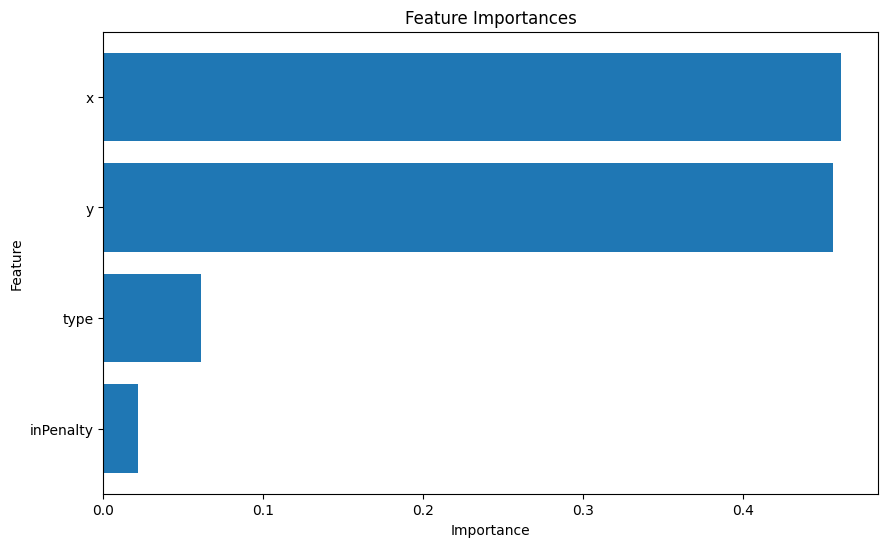

In [ ]:
# 피쳐 임포터스 계산 및 시각화
importances = best_model.feature_importances_
features = X.columns

# 피쳐 임포터스 출력
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# 피쳐 임포터스 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

총 슈팅 대비 득점 비율

---



In [ ]:
# 슛 시도중 득점으로 이어진 비율
data = df_copy

# 각 컬럼의 모든 열을 더함
goal_total_sum = df['shoot.goalTotal'].sum()
shoot_total_sum = df['shoot.shootTotal'].sum()

# 비율 계산 및 퍼센트 변환
ratio = (goal_total_sum / shoot_total_sum) * 100

# 결과 출력
print(f"shoot.goalTotal의 비율: {ratio:.2f}%")

shoot.goalTotal의 비율: 28.41%


예측 결과 시각화 - 슛(전체 데이터)

---



Random Forest - Accuracy: 0.72, Precision: 0.49, Recall: 0.36
골 비율: 19.92%
노골 비율: 80.08%
패널티 에어리어 안 비율: 67.96%
패널티 에어리어 밖 비율: 32.04%


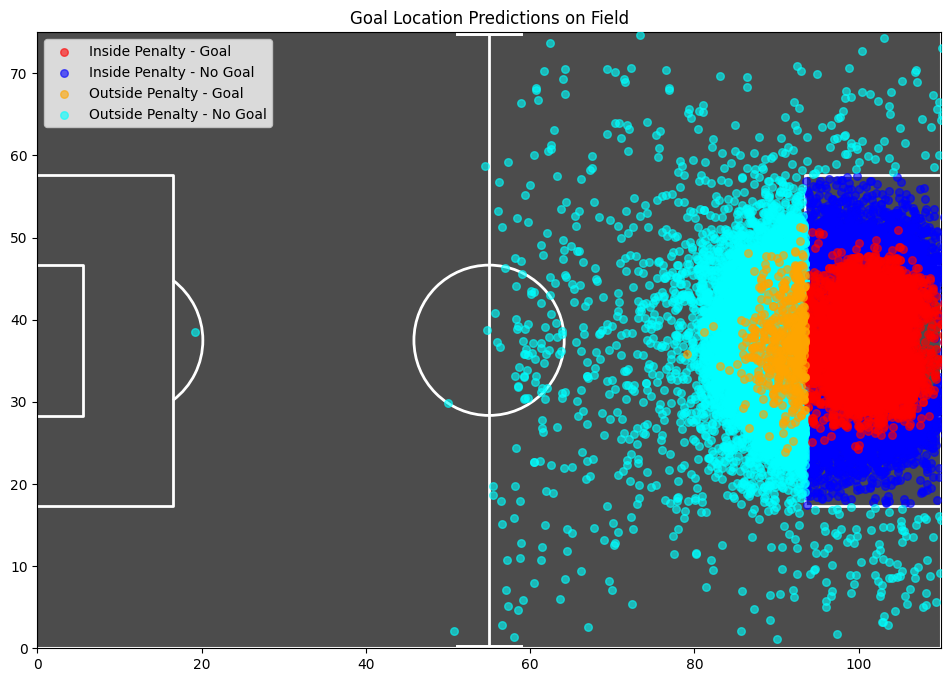

In [ ]:
# 필요한 데이터 선택
df = data[['x', 'y', 'result', 'inPenalty', 'type']].copy()

# 결과값을 이진으로 변환 (3: 골, 1, 2: 골 실패)
df.loc[:, 'result'] = df['result'].apply(lambda x: 1 if x == 3 else 0)

# 특성과 라벨 분리
X = df[['x', 'y', 'inPenalty', 'type']]
y = df['result']

# 데이터 분할 (60% 학습, 20% 테스트, 20% 예측)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 랜덤 포레스트 모델 학습
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
random_forest_pred = random_forest_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, random_forest_pred)
precision = precision_score(y_test, random_forest_pred)
recall = recall_score(y_test, random_forest_pred)

print(f'Random Forest - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# 예측에 사용할 데이터
sng_df = X_predict.copy()
sng_df['predicted_result'] = random_forest_model.predict(X_predict)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = sng_df['x'] * field_length
actual_y = sng_df['y'] * field_width

# 패널티 에어리어 범위 정의
penalty_area_length = 16.5
penalty_area_width = 40.3

# 패널티 에어리어 안과 밖의 점 구분
inside_penalty = ((actual_x <= penalty_area_length) | (actual_x >= (field_length - penalty_area_length))) & \
                 ((actual_y >= (field_width / 2 - penalty_area_width / 2)) & (actual_y <= (field_width / 2 + penalty_area_width / 2)))

outside_penalty = ~inside_penalty

# 골과 노골 기준으로 점 구분
goal_mask = sng_df['predicted_result'] == 1
nogol_mask = sng_df['predicted_result'] == 0

# 각 구분의 개수 계산 및 비율 계산
total_points = len(sng_df)
goal_ratio = goal_mask.sum() / total_points * 100
nogol_ratio = nogol_mask.sum() / total_points * 100
inside_penalty_ratio = inside_penalty.sum() / total_points * 100
outside_penalty_ratio = outside_penalty.sum() / total_points * 100

# 결과 출력
print(f"골 비율: {goal_ratio:.2f}%")
print(f"노골 비율: {nogol_ratio:.2f}%")
print(f"패널티 에어리어 안 비율: {inside_penalty_ratio:.2f}%")
print(f"패널티 에어리어 밖 비율: {outside_penalty_ratio:.2f}%")

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 패널티 에어리어 안의 골과 노골 점들 그리기
ax.scatter(actual_x[inside_penalty & goal_mask], actual_y[inside_penalty & goal_mask], s=30, color="red", zorder=5, alpha=0.6, label='Inside Penalty - Goal')
ax.scatter(actual_x[inside_penalty & nogol_mask], actual_y[inside_penalty & nogol_mask], s=30, color="blue", zorder=3, alpha=0.6, label='Inside Penalty - No Goal')

# 패널티 에어리어 밖의 골과 노골 점들 그리기
ax.scatter(actual_x[outside_penalty & goal_mask], actual_y[outside_penalty & goal_mask], s=30, color="orange", zorder=5, alpha=0.6, label='Outside Penalty - Goal')
ax.scatter(actual_x[outside_penalty & nogol_mask], actual_y[outside_penalty & nogol_mask], s=30, color="cyan", zorder=3, alpha=0.6, label='Outside Penalty - No Goal')

plt.title("Goal Location Predictions on Field")
plt.legend()
plt.show()

예측 결과 시각화(Scatter Plot) - 슛(1000개 샘플링)

---



Random Forest - Accuracy: 0.72, Precision: 0.49, Recall: 0.36
골 비율: 21.60%
노골 비율: 78.40%
패널티 에어리어 안 비율: 69.90%
패널티 에어리어 밖 비율: 30.10%


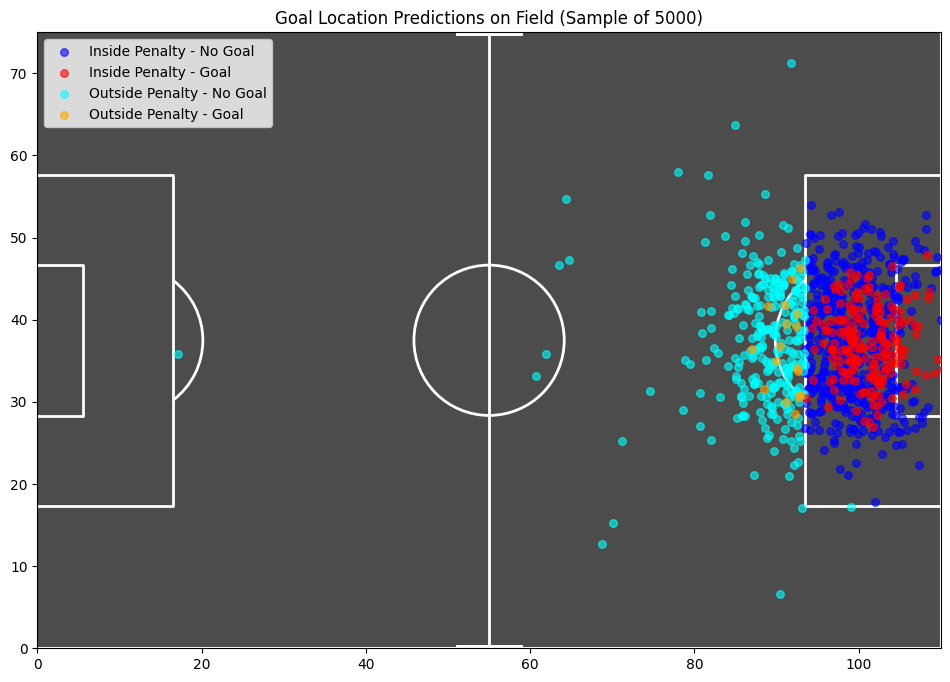

In [ ]:
# 필요한 데이터 선택 및 복사본 생성
df = data[['x', 'y', 'result', 'inPenalty', 'type']].copy()

# 결과값을 이진으로 변환 (3: 골, 1, 2: 골 실패)
df.loc[:, 'result'] = df['result'].apply(lambda x: 1 if x == 3 else 0)

# 특성과 라벨 분리
X = df[['x', 'y', 'inPenalty', 'type']]
y = df['result']

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = random_forest_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Random Forest - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# 시각화를 위해 1000개의 데이터 샘플링
sample_size = min(1000, len(X_test))
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
X_sample = X_test.iloc[sample_indices].copy()
y_sample = y_pred[sample_indices]

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
actual_x = X_sample['x'] * field_length
actual_y = X_sample['y'] * field_width

# 패널티 에어리어 범위 정의
penalty_area_length = 16.5
penalty_area_width = 40.3

# 패널티 에어리어 안과 밖의 점 구분
inside_penalty = ((actual_x <= penalty_area_length) | (actual_x >= (field_length - penalty_area_length))) & \
                 ((actual_y >= (field_width / 2 - penalty_area_width / 2)) & (actual_y <= (field_width / 2 + penalty_area_width / 2)))

outside_penalty = ~inside_penalty

# 골과 노골 기준으로 점 구분
goal_mask = y_sample == 1
nogol_mask = y_sample == 0

# 비율 계산
total_points = len(X_sample)
goal_ratio = goal_mask.sum() / total_points * 100
nogol_ratio = nogol_mask.sum() / total_points * 100
inside_penalty_ratio = inside_penalty.sum() / total_points * 100
outside_penalty_ratio = outside_penalty.sum() / total_points * 100

# 결과 출력
print(f"골 비율: {goal_ratio:.2f}%")
print(f"노골 비율: {nogol_ratio:.2f}%")
print(f"패널티 에어리어 안 비율: {inside_penalty_ratio:.2f}%")
print(f"패널티 에어리어 밖 비율: {outside_penalty_ratio:.2f}%")

# 필드와 라인 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 패널티 에어리어 안의 골과 노골 점들 그리기
ax.scatter(actual_x[inside_penalty & nogol_mask], actual_y[inside_penalty & nogol_mask], s=30, color="blue", zorder=3, alpha=0.6, label='Inside Penalty - No Goal')
ax.scatter(actual_x[inside_penalty & goal_mask], actual_y[inside_penalty & goal_mask], s=30, color="red", zorder=5, alpha=0.6, label='Inside Penalty - Goal')

# 패널티 에어리어 밖의 골과 노골 점들 그리기
ax.scatter(actual_x[outside_penalty & nogol_mask], actual_y[outside_penalty & nogol_mask], s=30, color="cyan", zorder=3, alpha=0.6, label='Outside Penalty - No Goal')
ax.scatter(actual_x[outside_penalty & goal_mask], actual_y[outside_penalty & goal_mask], s=30, color="orange", zorder=5, alpha=0.6, label='Outside Penalty - Goal')

plt.title("Goal Location Predictions on Field (Sample of 5000)")
plt.legend()
plt.show()

예측 결과 시각화(Scatter Plot) - 슛 타입


---



Random Forest - Accuracy: 0.72, Precision: 0.49, Recall: 0.35
골 비율: 19.80%
노골 비율: 80.20%
finesse - 슈팅 시도: 13574, 득점: 3380
finesse - 골 비율: 24.90%, 노골 비율: 75.10%
knuckle - 슈팅 시도: 359, 득점: 7
knuckle - 골 비율: 1.95%, 노골 비율: 98.05%
lob - 슈팅 시도: 286, 득점: 28
lob - 골 비율: 9.79%, 노골 비율: 90.21%
low - 슈팅 시도: 2824, 득점: 980
low - 골 비율: 34.70%, 노골 비율: 65.30%
normal - 슈팅 시도: 12191, 득점: 1898
normal - 골 비율: 15.57%, 노골 비율: 84.43%
super - 슈팅 시도: 1215, 득점: 79
super - 골 비율: 6.50%, 노골 비율: 93.50%
volley - 슈팅 시도: 1435, 득점: 363
volley - 골 비율: 25.30%, 노골 비율: 74.70%


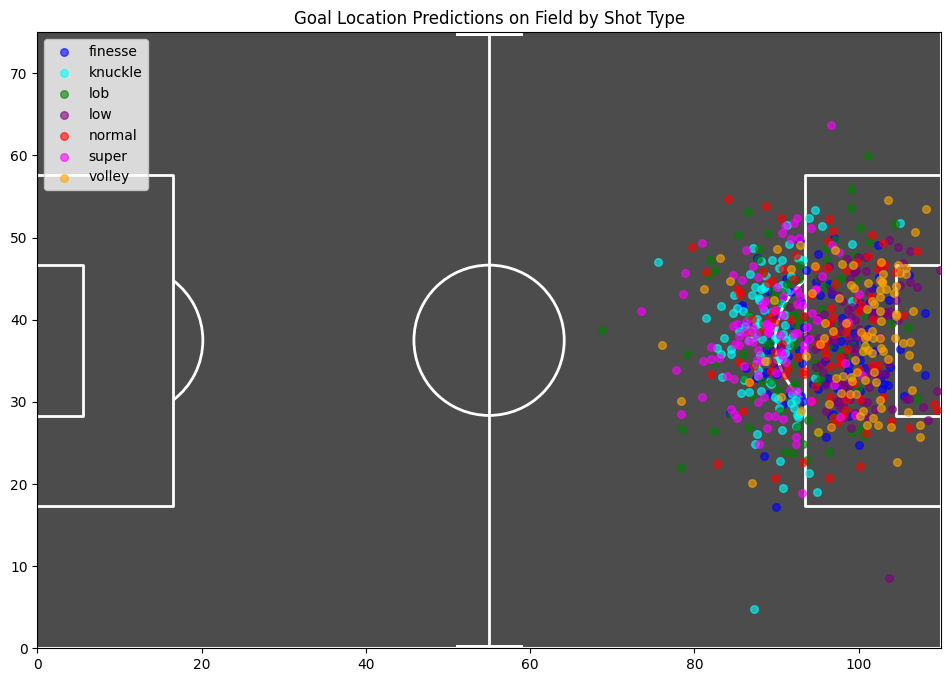

In [ ]:
# 필요한 열 선택
df = data[['x', 'y', 'result', 'inPenalty', 'type']].copy()

# 결과값을 이진으로 변환 (3: 골, 1, 2: 골 실패)
df.loc[:, 'result'] = df['result'].apply(lambda x: 1 if x == 3 else 0)

# 특성 엔지니어링: 상호작용 항목 생성
df.loc[:, 'x_y'] = df['x'] * df['y']

# 특성과 라벨 분리
X = df[['x', 'y', 'inPenalty', 'type']]
y = df['result']

# 데이터 분할 (60% 학습, 20% 테스트, 20% 예측)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 랜덤 포레스트 모델 학습
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
random_forest_pred = random_forest_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, random_forest_pred)
precision = precision_score(y_test, random_forest_pred)
recall = recall_score(y_test, random_forest_pred)

print(f'Random Forest - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# 예측에 사용할 데이터
sng_df = X_predict.copy()
sng_df['predicted_result'] = random_forest_model.predict(X_predict)

# FIFA 경기장 규격 (최대 크기 사용)
field_length = 110  # 길이 (터치라인): 110m
field_width = 75    # 너비 (골라인): 75m

# 정규화된 좌표들을 실제 필드 좌표로 변환
sng_df['actual_x'] = sng_df['x'] * field_length
sng_df['actual_y'] = sng_df['y'] * field_width

# 샷 유형을 문자열로 변환
shot_type_mapping = {
    1: 'normal',
    2: 'finesse',
    4: 'lob',
    6: 'low',
    7: 'volley',
    10: 'knuckle',
    12: 'super'
}

sng_df['shot_type'] = sng_df['type'].map(shot_type_mapping)

# 골/노골 비율 계산
total_predictions = len(sng_df)
goal_count = sng_df['predicted_result'].sum()
nogol_count = total_predictions - goal_count
goal_ratio = (goal_count / total_predictions) * 100
nogol_ratio = (nogol_count / total_predictions) * 100

# 타입별 골/노골 비율 계산
type_goal_ratio = sng_df.groupby('shot_type')['predicted_result'].mean() * 100
type_nogol_ratio = 100 - type_goal_ratio

# 타입별 슈팅 시도 개수와 득점 개수 계산
type_counts = sng_df['shot_type'].value_counts()
type_goal_counts = sng_df[sng_df['predicted_result'] == 1]['shot_type'].value_counts()

# 결과 출력
print(f'골 비율: {goal_ratio:.2f}%')
print(f'노골 비율: {nogol_ratio:.2f}%')

for shot_type in type_goal_ratio.index:
    print(f"{shot_type} - 슈팅 시도: {type_counts[shot_type]}, 득점: {type_goal_counts.get(shot_type, 0)}")
    print(f"{shot_type} - 골 비율: {type_goal_ratio[shot_type]:.2f}%, 노골 비율: {type_nogol_ratio[shot_type]:.2f}%")

# 각 슛 타입별로 100개씩 샘플링
sampled_dfs = []
for shot_type, group in sng_df.groupby('shot_type'):
    if len(group) > 100:
        sampled_dfs.append(group.sample(n=100, random_state=42))
    else:
        sampled_dfs.append(group)

sng_df_sampled = pd.concat(sampled_dfs)

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 경기장 그리기 함수 호출
draw_soccer_field(ax, field_length, field_width)

# 샷 유형별 점 그리기
colors = {
    'normal': 'red',
    'finesse': 'blue',
    'lob': 'green',
    'low': 'purple',
    'volley': 'orange',
    'knuckle': 'cyan',
    'super': 'magenta'
}

for shot_type, group in sng_df_sampled.groupby('shot_type'):
    ax.scatter(group['actual_x'], group['actual_y'], s=30, color=colors[shot_type], label=shot_type, alpha=0.6, zorder=5)

plt.title("Goal Location Predictions on Field by Shot Type")
plt.legend()
plt.show()

# 도전적인 패스를 많이 시도한 사람들은 승률이 높았을까? (수민)

In [ ]:
#패스 관련 col을 보니, try - success의 형태로 나눠져 있는 것을 볼 수 있다. 따라서, 패스 성공률이라는 컬럼을 따로 만든다.
pass_cols = ['pass.passTry','pass.passSuccess','pass.shortPassTry','pass.shortPassSuccess',
             'pass.longPassTry','pass.longPassSuccess','pass.bouncingLobPassTry',
             'pass.bouncingLobPassSuccess','pass.throughPassTry','pass.throughPassSuccess',
             'pass.lobbedThroughPassTry','pass.lobbedThroughPassSuccess']

In [ ]:
#패스 성공률 컬럼 만들기
match_df['pass_pa'] = round(match_df['pass.passSuccess']/match_df['pass.passTry']*100,2)
match_df['shortpass_pa'] = match_df['pass.shortPassSuccess']/match_df['pass.shortPassTry']
match_df['longpass_pa'] = match_df['pass.longPassSuccess']/match_df['pass.longPassTry']
match_df['bouncinglobpass_pa'] = match_df['pass.bouncingLobPassSuccess']/match_df['pass.bouncingLobPassTry']
match_df['throughpass_pa'] = round(match_df['pass.throughPassSuccess']/match_df['pass.throughPassTry']*100,2)
match_df['lobbedthroughpass_pa'] = match_df['pass.lobbedThroughPassSuccess']/match_df['pass.lobbedThroughPassTry']
temp = match_df.copy()

In [ ]:
# 도전적인 패스를 많이 한 사람은 승리할 확률이 높을 것이다.
# 도전적인 패스의 정의: 상대 선수에게 차단될 확률이 높은 패스거나, 상대의 빈공간을 향해 찔러주는 패스
# 일반패스의 정의: 끊길 위험이 거의 없는 패스, 즉, 숏패스나 롱패스
# bouncingLobPassTry_rate, throughPassTry_rate, lobbedThroughPassTry_rate는 도전적인 패스를 하는 총 횟수로 나눈 것
temp['pass_challenged_try'] = temp['pass.bouncingLobPassTry'] + temp['pass.throughPassTry'] + temp['pass.lobbedThroughPassTry']
temp['pass_challenged_rate'] = round(((temp['pass.bouncingLobPassTry'] + temp['pass.throughPassTry'] + temp['pass.lobbedThroughPassTry'])/temp['pass.passTry'])*100,2)
temp['pass_normal_rate'] = round(((temp['pass.shortPassTry'] + temp['pass.longPassTry'])/temp['pass.passTry'])*100,2)
temp['bouncingLobPassTry_rate'] = round((temp['pass.bouncingLobPassTry']/temp['pass_challenged_try'])*100,2)
temp['throughPassTry_rate'] = round((temp['pass.throughPassTry']/temp['pass_challenged_try'])*100,2)
temp['lobbedThroughPassTry_rate'] = round((temp['pass.lobbedThroughPassTry']/temp['pass_challenged_try'])*100,2)
temp['throughPassSuccess_rate'] = round((temp['pass.throughPassSuccess']/temp['pass.throughPassTry'])*100,2)

In [ ]:
# 도전적인 패스를 하는 유저 quantile 보기
temp['pass_challenged_rate'].quantile([0.66])

0.66    28.0502
Name: pass_challenged_rate, dtype: float64

In [ ]:
#유저를 기준으로 테이블 ELT
temp['matchDetail.matchResult'] = temp['matchDetail.matchResult'].replace({-1:'패',0:'무',1:'승'})
temp.groupby(['ouid'])[['pass_challenged_rate','pass_normal_rate']].mean().reset_index()
grouped = temp.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(columns=['승', '무', '패'], fill_value=0)
grouped['win_rate'] = grouped['승'] / (grouped['무'] + grouped['패'] + grouped['승'])
grouped = grouped.groupby('ouid')['win_rate'].value_counts().reset_index().drop(columns=['count'])
pass_trial = temp.groupby(['ouid'])[['pass_challenged_rate','pass_normal_rate']].mean().reset_index()
pass_trial_rate = pd.merge(pass_trial, grouped, on='ouid')
pass_trial_rate

ouid  pass_challenged_rate  \
0     000a646558ba548d575057e257d2aaae             12.370000   
1     002dc1646dd085a59b72664a2c619b0e             16.670000   
2     00319f634db370046b6330dfc4d2f314             20.835000   
3     003509f51e1e3da114ac90a2cee5c89e             14.120000   
4     003ec8ecd888fd5f87ae3101aa225744             40.430000   
...                                ...                   ...   
7888  ffd9ee36285a33c264466f176cce8148             24.085000   
7889  ffe20db1d47d26a841901585ae089c63             19.091667   
7890  ffe6a8b81292b2f260badfa2d90d29fa             15.628000   
7891  ffed1d594293cf42b82655cc8b5ba99b             30.325000   
7892  fff4a6ff068f77e43418fb785c12c62c             13.160000   

      pass_normal_rate  win_rate  
0            85.876667  0.000000  
1            83.330000  0.000000  
2            78.185000  0.500000  
3            85.880000  1.000000  
4            58.020000  0.000000  
...                ...       ...  
7888         75.915000  0.500000  
7889         79.430000  0.833333  
7890         83.404000  0.400000  
7891         69.205000  1.000000  
7892         86.840000  0.000000  

[7893 rows x 4 columns]

In [ ]:
# 도전적인 패스를 많이 하는 사람/아닌 사람 나누기
# 도전적인 패스를 많이 하는 사람의 기준은? (피파 온라인 통계 사이트 기준(모집단 10000회 랜덤 샘플링 기준): 평균 패스 횟수 106회, 평균 스루 패스 19회, 평균 드라이빙 땅볼 패스 3.5, 로빙 스루 0.9회, 나누면 평균적인 도전 패스 비율은 22%(반올림해서))
def challenged(x):
    if x>=16 and x<=28:
        return 'median'
    elif x<16:
        return 'low'
    else:
        return 'high'

pass_trial_rate['pass_challenged_cat'] = pass_trial_rate['pass_challenged_rate'].apply(challenged)

<ipython-input-13-2c12bc31a27e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = chart, x= 'pass_challenged_cat', y='win_rate', order=['low','median','high'], palette = palette)
<ipython-input-13-2c12bc31a27e>:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data = chart, x= 'pass_challenged_cat', y='win_rate', order=['low','median','high'], palette = palette)


<Axes: title={'center': 'Win rate by try pass bins'}, xlabel='pass_challenged_cat', ylabel='win_rate'>

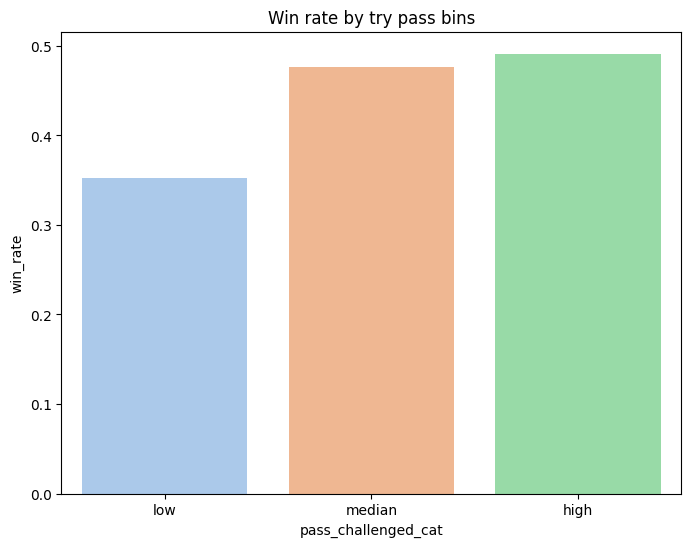

In [ ]:
# 도전적인 패스 시도 당 승률 시각화 차트
# low에 비해 확실히 도전적인 패스를 많이 하는 사람들의 승률이 높게 나타났다.
palette = sns.color_palette('pastel')
plt.figure(figsize=(8,6))
plt.title('Win rate by try pass bins')
chart = pass_trial_rate.groupby(['pass_challenged_cat'])['win_rate'].mean().reset_index()
sns.barplot(data = chart, x= 'pass_challenged_cat', y='win_rate', order=['low','median','high'], palette = palette)

In [ ]:
# 승률의 차이가 통계적으로 유의미한 지 검증
# p값이 7.827560e-48이므로 평균 도전적인 패스 시도 수에 따라서 승률의 차이가 난다는 것은 통계적으로 유의미하다.
# ANOVA 모델 생성
model = ols('win_rate ~ C(pass_challenged_cat)', data=pass_trial_rate).fit()
# ANOVA 테이블 계산
anova_table = sm.stats.anova_lm(model, typ=2)
# 결과 출력
print(anova_table)

                             sum_sq      df           F        PR(>F)
C(pass_challenged_cat)    30.388138     2.0  109.971318  7.827560e-48
Residual                1090.113356  7890.0         NaN           NaN


array([[<Axes: title={'center': 'pass.bouncingLobPassTry'}>,
        <Axes: title={'center': 'pass.throughPassTry'}>],
       [<Axes: title={'center': 'pass.lobbedThroughPassTry'}>, <Axes: >]],
      dtype=object)

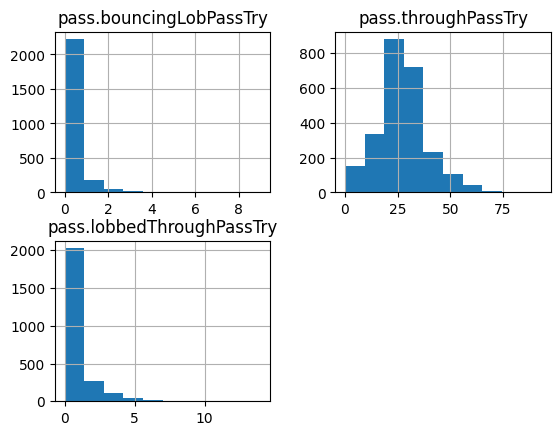

In [ ]:
# 그렇다면 도전적인 패스 시도가 높은 유저들은 어떤 도전적인 패스를 시도했을까?
# 히스토그램으로 비교해보면 스루패스의 시도가 제일 많다.
high_cat_ouids = pass_trial_rate.loc[pass_trial_rate['pass_challenged_cat'] == 'high', 'ouid'].tolist()
high_pass_user = temp[temp['ouid'].isin(high_cat_ouids)]
pass_what = high_pass_user.groupby('ouid')[['pass.bouncingLobPassTry', 'pass.throughPassTry','pass.lobbedThroughPassTry','pass_challenged_rate']].sum().dropna(axis=0)
pass_what = high_pass_user.groupby('ouid')[['pass.bouncingLobPassTry', 'pass.throughPassTry','pass.lobbedThroughPassTry']].mean().dropna(axis=0).hist()
pass_what

<ipython-input-16-229818a840db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(t, x=t.index, y='Rate', palette=palette)
<ipython-input-16-229818a840db>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(t, x=t.index, y='Rate', palette=palette)


<Axes: title={'center': 'Challenging Pass Rate'}, xlabel='None', ylabel='Rate'>

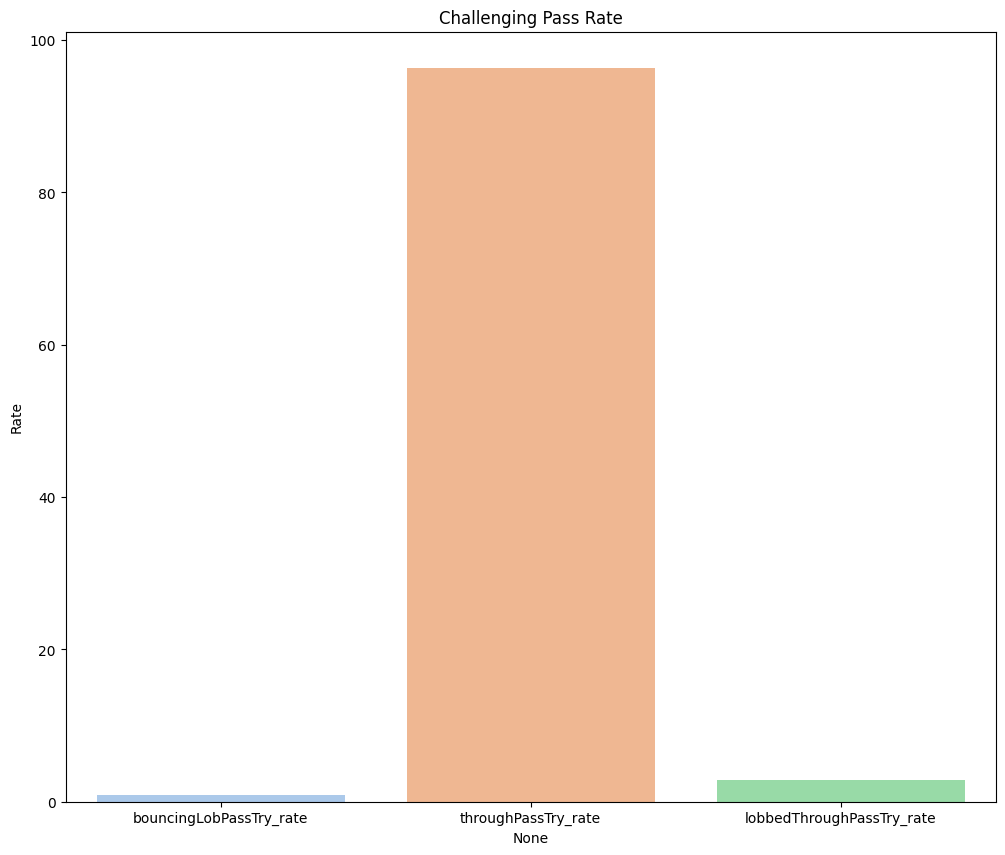

In [ ]:
# 비중 역시 스루패스가 제일 많다.(95%)
# 패스 중에 최고는 스루패스
t = high_pass_user[['bouncingLobPassTry_rate','throughPassTry_rate','lobbedThroughPassTry_rate']].mean().to_frame().rename(columns={0:'Rate'})
plt.figure(figsize=(12,10))
plt.title('Challenging Pass Rate')
sns.barplot(t, x=t.index, y='Rate', palette=palette)

In [ ]:
# 그렇다면 스루패스를 성공을 많이 시킨 그룹의 승률이 높을까? (07/12 피파 공홈기준 성공률 평균 85%)
grouped = temp.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(columns=['승', '무', '패'], fill_value=0)
grouped['win_rate'] = grouped['승'] / (grouped['무'] + grouped['패'] + grouped['승'])
tpass_success = temp.groupby(['ouid'])['throughPassSuccess_rate'].mean().reset_index()
tpass_success = pd.merge(tpass_success, grouped, on='ouid')
tpass_success

ouid  throughPassSuccess_rate  승  무  패  \
0     000a646558ba548d575057e257d2aaae                   87.450  0  2  1   
1     002dc1646dd085a59b72664a2c619b0e                   63.640  0  0  1   
2     00319f634db370046b6330dfc4d2f314                   87.500  1  0  1   
3     003509f51e1e3da114ac90a2cee5c89e                   91.670  1  0  0   
4     003ec8ecd888fd5f87ae3101aa225744                   80.565  0  0  2   
...                                ...                      ... .. .. ..   
7888  ffd9ee36285a33c264466f176cce8148                   88.535  1  1  0   
7889  ffe20db1d47d26a841901585ae089c63                   84.895  5  0  1   
7890  ffe6a8b81292b2f260badfa2d90d29fa                   72.660  2  0  3   
7891  ffed1d594293cf42b82655cc8b5ba99b                   90.065  2  0  0   
7892  fff4a6ff068f77e43418fb785c12c62c                   80.000  0  0  1   

      win_rate  
0     0.000000  
1     0.000000  
2     0.500000  
3     1.000000  
4     0.000000  
...        ...  
7888  0.500000  
7889  0.833333  
7890  0.400000  
7891  1.000000  
7892  0.000000  

[7893 rows x 6 columns]

In [ ]:
#quantile을 활용하여 33~66% 구간 중간, 66% 이상 많음, 33%이상 적음으로 분류
def pass_success(x):
    if x>=80 and x<=86:
        return 'median'
    elif x<80:
        return 'low'
    else:
        return 'high'

tpass_success['tpass_success_cat'] = tpass_success['throughPassSuccess_rate'].apply(pass_success)

<ipython-input-19-9b47eb5c9f4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = chart, x= 'tpass_success_cat', y='win_rate', order=['low','median','high'], palette = palette)
<ipython-input-19-9b47eb5c9f4d>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data = chart, x= 'tpass_success_cat', y='win_rate', order=['low','median','high'], palette = palette)


<Axes: title={'center': 'Win rate by through pass success rate'}, xlabel='tpass_success_cat', ylabel='win_rate'>

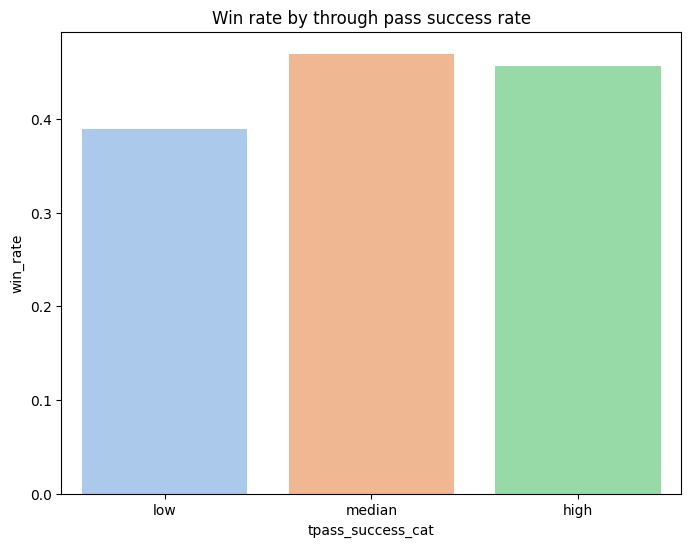

In [ ]:
# median-high-low 순으로 승률이 나타난다. (median 약 47%, high 약 46%, low 약 38%의 승률)
palette = sns.color_palette('pastel')
plt.figure(figsize=(8,6))
plt.title('Win rate by through pass success rate')
chart = tpass_success.groupby(['tpass_success_cat'])['win_rate'].mean().reset_index()
sns.barplot(data = chart, x= 'tpass_success_cat', y='win_rate', order=['low','median','high'], palette = palette)

In [ ]:
# 스루패스 성공률에 따라 승률의 차이가 유의미하다고 볼 수 있다.
# 그러나, median - high - low 순으로 승률의 차이가 나타난다.
model = ols('win_rate ~ C(tpass_success_cat)', data=tpass_success).fit()
# ANOVA 테이블 계산
anova_table = sm.stats.anova_lm(model, typ=2)
# 결과 출력
print(anova_table)

                           sum_sq      df          F        PR(>F)
C(tpass_success_cat)     8.848411     2.0  31.400967  2.610486e-14
Residual              1111.653082  7890.0        NaN           NaN


즉, 앞선 내용을 정리하면 도전적인 패스를 하는 사람들이 승률이 실제로 차이가 나는 것이 유의미하고, 도전적인 패스에서는 스루패스가 주로 선호되며, 스루 패스의 성공률이 높을수록 승률에 차이가 나지만, 스루패스를 평균 정도(80%~86%) 성공시키는 유저들의 승률이 가장 높고(47%), 스루패스를 높게 성공시키는 유저(86% 이상) 사용하는 유저들의 승률(46%)이 그다음 높다. 그러나 평균 정도로 미만으로 성공시키는 유저들은 승률이 낮다.(39%)

떄문에, 승리에 있어서는 스루패스를 유저들 평균 이상으로는 성공시켜야 승리할 확률이 더 높아진다.

그렇다면, 스루패스 성공률이 좋은 선수들을 찾아보자!

<Axes: xlabel='pass_pa', ylabel='throughPassSuccess_rate'>

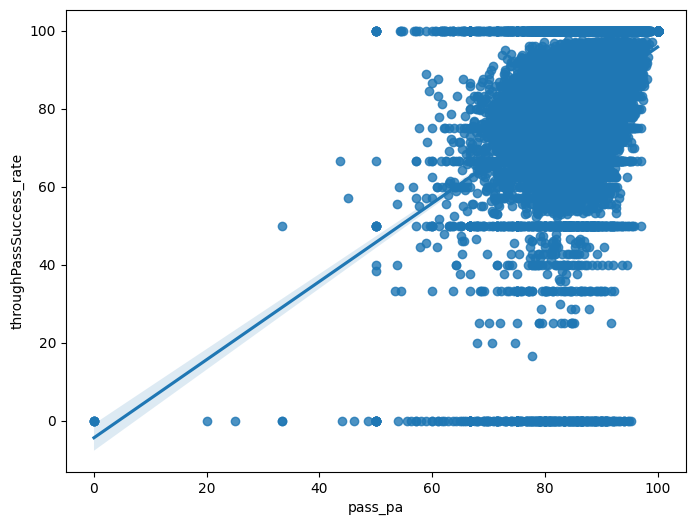

In [ ]:
# 패스 성공률이 높으면 스루패스 성공률도 높은가?
# regplot을 그려보니, 패스 성공률이 높으면 스루패스 성공률도 높은 것 같다.
plt.figure(figsize=(8,6))
sns.regplot(data=temp, x='pass_pa', y='throughPassSuccess_rate')

In [ ]:
#player_df에 패스 성공률 컬럼 만들기
player_df['passSuccessRate'] = player_df['passSuccess']/player_df['passTry']

In [ ]:
player_df

spId  spPosition  spGrade                              ouid  \
0       284007826          25        4  bbe1b626fa8cc0a7356834ef214b239f   
1       264049369          28        4  bbe1b626fa8cc0a7356834ef214b239f   
2       252121939           8        5  bbe1b626fa8cc0a7356834ef214b239f   
3       225136246          28        7  bbe1b626fa8cc0a7356834ef214b239f   
4       256140601           5        5  bbe1b626fa8cc0a7356834ef214b239f   
...           ...         ...      ...                               ...   
489577  287209658          28        5  7d2280a4a33957a974c30bdd9ddbaa9d   
489578  252214100          18        8  7d2280a4a33957a974c30bdd9ddbaa9d   
489579  237220746          28        1  7d2280a4a33957a974c30bdd9ddbaa9d   
489580  814226851           6        5  7d2280a4a33957a974c30bdd9ddbaa9d   
489581  279238074          28        5  7d2280a4a33957a974c30bdd9ddbaa9d   

        shoot  effectiveShoot  assist  goal  dribble  intercept  ...  block  \
0         1.0             1.0     0.0   1.0    134.0        0.0  ...    0.0   
1         0.0             0.0     0.0   0.0      0.0        0.0  ...    0.0   
2         0.0             0.0     0.0   0.0     35.0        0.0  ...    0.0   
3         0.0             0.0     0.0   0.0      0.0        0.0  ...    0.0   
4         0.0             0.0     0.0   0.0      0.0        2.0  ...    0.0   
...       ...             ...     ...   ...      ...        ...  ...    ...   
489577    0.0             0.0     0.0   0.0      0.0        0.0  ...    0.0   
489578    5.0             4.0     1.0   4.0    289.0        1.0  ...    0.0   
489579    0.0             0.0     0.0   0.0      0.0        0.0  ...    0.0   
489580    0.0             0.0     0.0   0.0     79.0        1.0  ...    0.0   
489581    0.0             0.0     0.0   0.0      0.0        0.0  ...    0.0   

        tackleTry  tackle  yellowCards  redCards  spRating      name  \
0             0.0     0.0          0.0       0.0       7.0   로빈 반페르시   
1             0.0     0.0          0.0       0.0       0.0  페르난도 토레스   
2             3.0     1.0          0.0       1.0       5.7      필립 람   
3             0.0     0.0          0.0       0.0       0.0       박진섭   
4             2.0     2.0          0.0       0.0       5.5   네마냐 비디치   
...           ...     ...          ...       ...       ...       ...   
489577        0.0     0.0          0.0       0.0       0.0   레온 고레츠카   
489578        1.0     1.0          0.0       0.0       9.7    루드 굴리트   
489579        0.0     0.0          0.0       0.0       0.0  A. 지브코비치   
489580        1.0     1.0          0.0       0.0       7.5   뱅자맹 파바르   
489581        0.0     0.0          0.0       0.0       0.0    리스 제임스   

        seasonId                             className  passSuccessRate  
0          284.0                       RTN (Returnees)         0.777778  
1          264.0                       FA (FREE AGENT)              NaN  
2          252.0                         CAP (Captain)         0.714286  
3          225.0                   TKL (TEAM K LEAGUE)              NaN  
4          256.0                    BTB (Back to Back)         1.000000  
...          ...                                   ...              ...  
489577     287.0       23 TOTS (23 Team Of The Season)              NaN  
489578     252.0                         CAP (Captain)         0.941176  
489579     237.0           MC (Multi-League Champions)              NaN  
489580     814.0              UT (Unexpected Transfer)         1.000000  
489581     279.0  23 TOTY-N (23 Team Of The Nominated)              NaN  

[489500 rows x 30 columns]

In [ ]:
# 1경기만 뛰는 선수들이 있어서 데이터를 어지럽히지 않기 위해서는 10게임 이상 플레이한 선수들을 표본으로 잡는것이 좋다고 생각했다.
# 뿐만 아니라, 스루패스의 경우 미드필더들이 주로 공격수들에게 골을 넣기 위해서 수비수나 골키퍼는 제외한다.
# 출전 경기 수가 10회 이상인 플레이어 필터링 및 spPosition이 9에서 27 사이인 선수들 필터링
p = player_df.groupby(['className', 'name', 'spPosition']).size().reset_index(name='count')
p = p[(p['count'] >= 10) & ((p['spPosition'].between(9, 27)))]
filtered_player = player_df.merge(p[['className', 'name', 'spPosition']], on=['className', 'name', 'spPosition'], how='inner')

In [ ]:
# 그럼 패스 성공률이 높은 애들도, 스루패스 성공률이 높을테니, 좋은 선수들을 찾아보자!
# 패스 성공률은 피파 데이터 기준 패스 성공률 평균은 0.9, 박스플롯을 그려본 결과 0.9부터 Q3이라 높다고 설정함
good_pass_player = filtered_player.groupby(['className','name'])[['passSuccessRate','assist']].mean().sort_values(by='passSuccessRate', ascending=False).reset_index()
good_pass_player = good_pass_player[good_pass_player['passSuccessRate']>=0.9]
good_pass_player

className      name  passSuccessRate    assist
0                        JNM (Journeyman)   야리 리트마넨         0.988889  0.100000
1         24 TOTS (24 Team Of The Season)    세루 기라시         0.980000  0.600000
2               BOE21 (Best of Europe 21)   그라니트 자카         0.978992  0.000000
3         24 TOTS (24 Team Of The Season)   A. 바스토니         0.978682  0.090909
4     ICON TM(제한) (ICON The Moment Bound)      존 반스         0.975855  0.125000
..                                    ...       ...              ...       ...
366             ICON TM (ICON The Moment)      호나우두         0.900340  0.000000
367       22 TOTS (22 Team Of The Season)    주드 벨링엄         0.900276  0.148148
368              UT (Unexpected Transfer)    레반도프스키         0.900243  0.300000
369  24 TOTY-N (24 Team Of The Nominated)   루카 모드리치         0.900221  0.274194
370                           ICON (ICON)  디디에 드로그바         0.900194  0.384236

[371 rows x 4 columns]

In [ ]:
# 해당 선수들을 쓰는 유저들의 성적은 어떨까? (선수 보유자 찾기)
good_pass_players = good_pass_player[['className', 'name']]
# player_df 데이터프레임에서 해당 className과 name을 가진 행을 필터링
good_pass_player_users = player_df.merge(good_pass_players, on=['className', 'name'])
good_pass_player_users = temp[temp['ouid'].isin(good_pass_player_users['ouid'])]
print('패스 성공률이 높은 선수를 사용하는 유저는', len(set(good_pass_player_users['ouid'])) ,'명 입니다.')

패스 성공률이 높은 선수를 사용하는 유저는 4898 명 입니다.


In [ ]:
# 패스 성공률이 좋은 선수들을 쓰는 유저들의 평균 승률
good_pass_player_users
good_pass_users_winrate = good_pass_player_users.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
good_pass_users_winrate = good_pass_users_winrate.reindex(columns=['승', '무', '패'], fill_value=0)
good_pass_users_winrate['win_rate'] = good_pass_users_winrate['승'] / (good_pass_users_winrate['무'] + good_pass_users_winrate['패'] + good_pass_users_winrate['승'])
print(round(good_pass_users_winrate['win_rate'].mean(),2))

0.46


In [ ]:
# 패스 성공률이 좋은 선수들을 쓰지 않는 유저들의 평균 승률
not_good_pass_users = match_df[~match_df['ouid'].isin(good_pass_users_winrate.reset_index()['ouid'])]
not_good_pass_users_winrate = not_good_pass_users.groupby(['ouid'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
not_good_pass_users_winrate.rename(columns={-1:'패',0:'무',1:'승'}, inplace=True)
not_good_pass_users_winrate = not_good_pass_users_winrate.reindex(columns=['승', '무', '패'], fill_value=0)
not_good_pass_users_winrate['win_rate'] = not_good_pass_users_winrate['승'] / (not_good_pass_users_winrate['무'] + not_good_pass_users_winrate['패'] + not_good_pass_users_winrate['승'])
print(round(not_good_pass_users_winrate['win_rate'].mean(),2))

0.41


<Axes: >

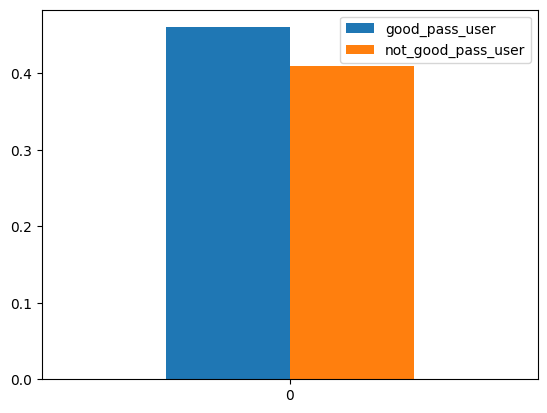

In [ ]:
# 패스 성공률 좋은 유저를 쓰는 사람들의 평균 승률/아닌 사람들의 평균 승률
# 패스 성공률이 좋은 유저들을 쓰는 사람들의 승률이 46%, 아닌 사람들의 평균 승률이 40%로 나타난다.
data = pd.DataFrame({
    'good_pass_user': [round(good_pass_users_winrate['win_rate'].mean(), 2)],
    'not_good_pass_user': [round(not_good_pass_users_winrate['win_rate'].mean(), 2)]
}, index=[0])
data

data.plot.bar(rot=0)

<Axes: title={'center': 'Good Pass Player Class bins'}, xlabel='proportion', ylabel='className'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


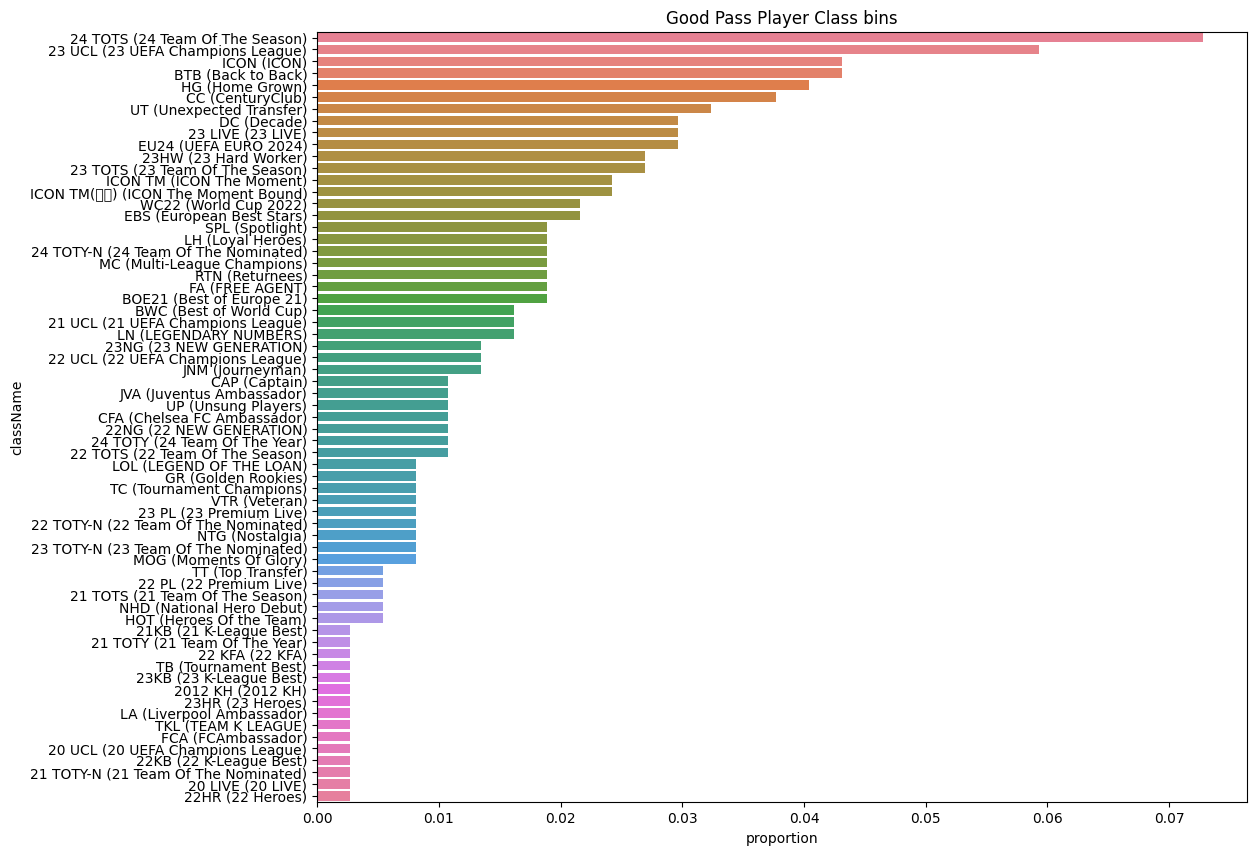

In [ ]:
# 그렇다면 패스가 좋은 선수들은 어떤 클래스에 많이 속해 있을까?
# 어떤 클래스의 선수들을 가장 많이 쓸까?
# 24TOTS, 23UCL, ICON, BTB, HG 시즌이 탑 5안에 든다.
plt.figure(figsize=(12,10))
plt.title('Good Pass Player Class bins')
g = good_pass_player['className'].value_counts(normalize=True).to_frame()
sns.barplot(data=g,x='proportion', y=g.index, hue=g.index)

추가로 더 분석한다고 치면, 어떤 패스가 좋은 선수를 쓰는게 승률이 좋을 지..?

# 팀가치가 높을수록 승률이 높을 것이다 (피파온라인 과금 관련 마케팅 제안) (수민)

알아둬야 할 것.

평균적으로 15만원 정도 과금했을 때. 1조 BP를 얻을 수 있다.

근거는 피파온라인 커뮤니티(에펨코리아, 디시인사이트, 인벤 등)에서 과금했을 때, 1조 BP를 얻으려면 적게는 10만원 ~ 많게는 20만원을 해야한다고 함.

In [ ]:
#bp_df 이름 바꾸기
bp_df.rename(columns={'ouid':'nickname'}, inplace=True)
bp_df.drop_duplicates(subset=['nickname'], inplace=True)

In [ ]:
# 그리고 match_df와 bp_df를 조인한다.
# 전체 유저 수는 6437명이다.
fifa_money = pd.merge(match_df, bp_df, on='nickname')
fifa_money['team_value'] = fifa_money['team_value'].astype('int')
fifa_money['matchDetail.matchResult'] = fifa_money['matchDetail.matchResult'].map({1:'승', 0:'무', -1:'패'})
fifa_money

ouid     nickname matchDetail.matchResult  \
0      cde51bb856ef3047de05f2b6add99216         Mr꼬마                       패   
1      cde51bb856ef3047de05f2b6add99216         Mr꼬마                       패   
2      cde51bb856ef3047de05f2b6add99216         Mr꼬마                       패   
3      cde51bb856ef3047de05f2b6add99216         Mr꼬마                       패   
4      cde51bb856ef3047de05f2b6add99216         Mr꼬마                       패   
...                                 ...          ...                     ...   
22547  f9716b2a5d2098c0a56c3bb80e70ad7e        메호돈신시                       패   
22548  ca1dd90744945e5b33ae2fc85812ef10       코브라걸고타                       승   
22549  ab410da79dd42e97e13fc346ed0305c9     구단가치0원시작                       패   
22550  9dbf81033f6f5615ddcfa2ab6c194806         훈베르만                       승   
22551  ddc01bf0f384b5a8b127c3c463004de8  서민ACMilan돈슛                       패   

       matchDetail.foul  matchDetail.injury  matchDetail.redCards  \
0                   1.0                 0.0                   0.0   
1                   3.0                 0.0                   0.0   
2                   2.0                 0.0                   0.0   
3                   0.0                 0.0                   0.0   
4                   1.0                 1.0                   0.0   
...                 ...                 ...                   ...   
22547               3.0                 0.0                   0.0   
22548               1.0                 0.0                   0.0   
22549               0.0                 0.0                   0.0   
22550               0.0                 0.0                   0.0   
22551               1.0                 0.0                   0.0   

       matchDetail.yellowCards  matchDetail.dribble  matchDetail.cornerKick  \
0                          0.0                 46.0                     3.0   
1                          1.0                 71.0                     1.0   
2                          1.0                 69.0                     1.0   
3                          0.0                  3.0                     0.0   
4                          0.0                 15.0                     0.0   
...                        ...                  ...                     ...   
22547                      1.0                 63.0                     3.0   
22548                      1.0                 63.0                     4.0   
22549                      0.0                 23.0                     0.0   
22550                      0.0                 82.0                     0.0   
22551                      0.0                 73.0                     2.0   

       matchDetail.possession  ...  matchDetail.controller_gamepad  \
0                        45.0  ...                           False   
1                        54.0  ...                           False   
2                        55.0  ...                           False   
3                        51.0  ...                           False   
4                        47.0  ...                           False   
...                       ...  ...                             ...   
22547                    50.0  ...                           False   
22548                    50.0  ...                           False   
22549                    43.0  ...                           False   
22550                    55.0  ...                           False   
22551                    45.0  ...                           False   

       matchDetail.controller_keyboard  pass_pa  shortpass_pa  longpass_pa  \
0                                 True    84.72      0.958333     0.818182   
1                                 True    86.90      0.909091     0.400000   
2                                 True    81.44      0.930233     0.000000   
3                                 True   100.00      1.000000          NaN   
4                                 True    86.67      1.000000    

In [ ]:
# 구단 가치가 높을 수록 승률은 높은가?

nickname
001234        1 
00ZING        1 
0102566       0 
01026099810   1 
01044158543   0 
              ..
히어로오세요        0 
히틀러의반란        0 
히프린           0 
힌형            1 
힙호르           0 
Name: win_rate, Length: 6437, dtype: float64

In [ ]:
#유저 승률 계산
fifa_temp = fifa_money.groupby(['nickname'])['matchDetail.matchResult'].value_counts().unstack(fill_value=0)
fifa_temp = fifa_temp.reindex(columns=['승', '무', '패'])
fifa_temp['win_rate'] = round(fifa_temp['승'] / (fifa_temp['무'] + fifa_temp['패'] + fifa_temp['승']),2)
fifa_temp

matchDetail.matchResult  승  무  패  win_rate
nickname                                  
001234                   4  0  0      1.00
00ZING                   1  0  0      1.00
0102566                  0  0  2      0.00
01026099810              2  0  1      0.67
01044158543              4  4  3      0.36
...                     .. .. ..       ...
히어로오세요                   0  1  0      0.00
히틀러의반란                   8  3  5      0.50
히프린                      3  0  3      0.50
힌형                       9  2  3      0.64
힙호르                      1  0  1      0.50

[6437 rows x 4 columns]

In [ ]:
# 게임 수는 6게임 이상 한 사람들만 필터링
# 6게임으로 필터링을 한 이유는 한판 정도의 게임 시간이 약 10분 걸려서 1시간 정도 게임을 하는 유저라고 판단했고, 승률이 1판하거나 2판하면 승률이 100%로 나와서 왜곡될 수 있기 떄문에 6판이상으로 선정
# 하루에 6게임 이상 한다는 것은 아무래도 승률을 산정하는 데 좀 더 객관적이다.
f = fifa_money.groupby(['nickname'])[['team_value','real_money']].value_counts().reset_index()
f= f[f['count']>=6]
fifa_user_over_6 = pd.merge(fifa_temp, f, on=['nickname'])

In [ ]:
#6게임 이상 한 유저 명수는 1118명
fifa_user_over_6

nickname   승  무  패  win_rate     team_value  real_money  count
0     01044158543   4  4  3      0.36  1476834957560       22.20     11
1         06년생홍사장   3  2  3      0.38   106414001340        1.65      8
2          07최강지훈   7  3  6      0.44  1369754000000       20.55     16
3          0I쑤신장군   4  2  1      0.57  6057995338870       90.90      7
4            0l강인   6  0  4      0.60  3132125425850       46.95     10
...           ...  .. .. ..       ...            ...         ...    ...
1113         흰돌고을   5  3  4      0.42  1831503810260       27.45     12
1114       히딩크거스기  13  4  7      0.54  1535660002050       23.10     24
1115       히틀러의반란   8  3  5      0.50   877107000000       13.20     16
1116          히프린   3  0  3      0.50  2419843364650       36.30      6
1117           힌형   9  2  3      0.64  4246100005030       63.75     14

[1118 rows x 8 columns]

In [ ]:
# 구단 가치 카테고리 만들기
def value_cat(x):
    if x<1000000000000:
        return '<1T'
    elif x>=1000000000000 and x<2000000000000:
        return '<2T'
    elif x>=2000000000000 and x<3000000000000:
        return '<3T'
    elif x>=3000000000000 and x<4000000000000:
        return '<4T'
    elif x>=4000000000000 and x<5000000000000:
        return '<5T'
    elif x>=5000000000000 and x<6000000000000:
        return '<6T'
    elif x>=6000000000000 and x<7000000000000:
        return '<7T'
    elif x>=7000000000000 and x<8000000000000:
        return '<8T'
    elif x>=8000000000000 and x<9000000000000:
        return '<9T'
    else:
        return '9T OVER'

fifa_user_over_6['value_cat'] = fifa_user_over_6['team_value'].apply(value_cat)
fifa_user_over_6.groupby(['value_cat'])['win_rate'].mean()
order = ['<1T','<2T','<3T','<4T','<5T','<6T','<7T','<8T','<9T','9T OVER']
fifa_user_over_6['value_cat'] = pd.Categorical(fifa_user_over_6['value_cat'], categories=order, ordered=True)

<ipython-input-37-4cb419330700>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(g, x='value_cat', y='proportion', ax=axs[0], palette=palette)


<Axes: title={'center': 'Winning rate by Team Value'}, xlabel='value_cat', ylabel='win_rate'>

<Figure size 1200x1000 with 0 Axes>

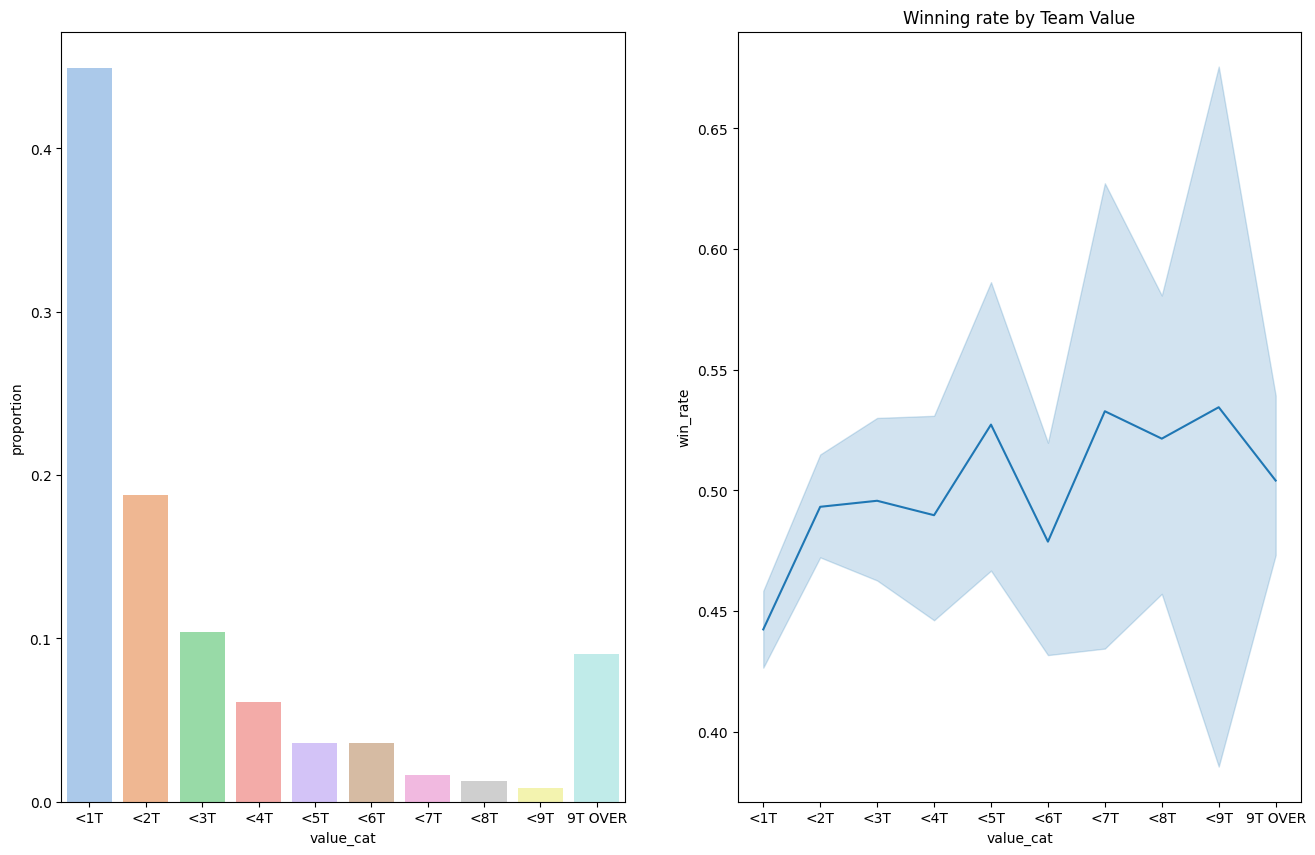

In [ ]:
# 구단 가치에 따라 승률의 변화가 있진 않은 것 같다.
# 1조 이하 였다가 1조 이상 2조 이하 구단 가치가 돌입할 때는 승률이 크게 오른다.
# 1조에서 2조로 가면 승률이 많이 오르는데.. 아무래도 6게임 이상 게임 한 유저 대상에, 전반적으로 팀가치가 높은 유저의 표본이 적다보니.. 이런 결론이 나오나? 싶음..
g = fifa_user_over_6['value_cat'].value_counts(normalize=True).sort_index().reset_index()
plt.figure(figsize=(12,10))
fig, axs = plt.subplots(1,2, figsize=(16,10))
plt.title('Winning rate by Team Value')
sns.barplot(g, x='value_cat', y='proportion', ax=axs[0], palette=palette)
sns.lineplot(fifa_user_over_6, x='value_cat', y='win_rate', ax=axs[1])

In [ ]:
# 전체 유저를 대상으로 데이터 프레임 형성
f1 = fifa_money.groupby(['nickname'])[['team_value','real_money']].value_counts().reset_index()
f1 = pd.merge(fifa_temp, f1, on=['nickname'])

# 구단 가치 카테고리 만들기
def value_cat(x):
    if x<1000000000000:
        return '<1T'
    elif x>=1000000000000 and x<2000000000000:
        return '<2T'
    elif x>=2000000000000 and x<3000000000000:
        return '<3T'
    elif x>=3000000000000 and x<4000000000000:
        return '<4T'
    elif x>=4000000000000 and x<5000000000000:
        return '<5T'
    elif x>=5000000000000 and x<6000000000000:
        return '<6T'
    elif x>=6000000000000 and x<7000000000000:
        return '<7T'
    elif x>=7000000000000 and x<8000000000000:
        return '<8T'
    elif x>=8000000000000 and x<9000000000000:
        return '<9T'
    else:
        return '9T OVER'

f1['value_cat'] = f1['team_value'].apply(value_cat)
f1.groupby(['value_cat'])['win_rate'].mean()
order = ['<1T','<2T','<3T','<4T','<5T','<6T','<7T','<8T','<9T','9T OVER']
f1['value_cat'] = pd.Categorical(f1['value_cat'], categories=order, ordered=True)

<ipython-input-72-f2101b8fc221>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ff, x='value_cat', y='proportion', ax=axs[0], palette=palette)
<ipython-input-72-f2101b8fc221>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(f1, x='value_cat', y='count', ax=axs[2], palette=palette)


<Axes: title={'center': 'Winning rate by Team Value'}, xlabel='value_cat', ylabel='count'>

<Figure size 1200x1000 with 0 Axes>

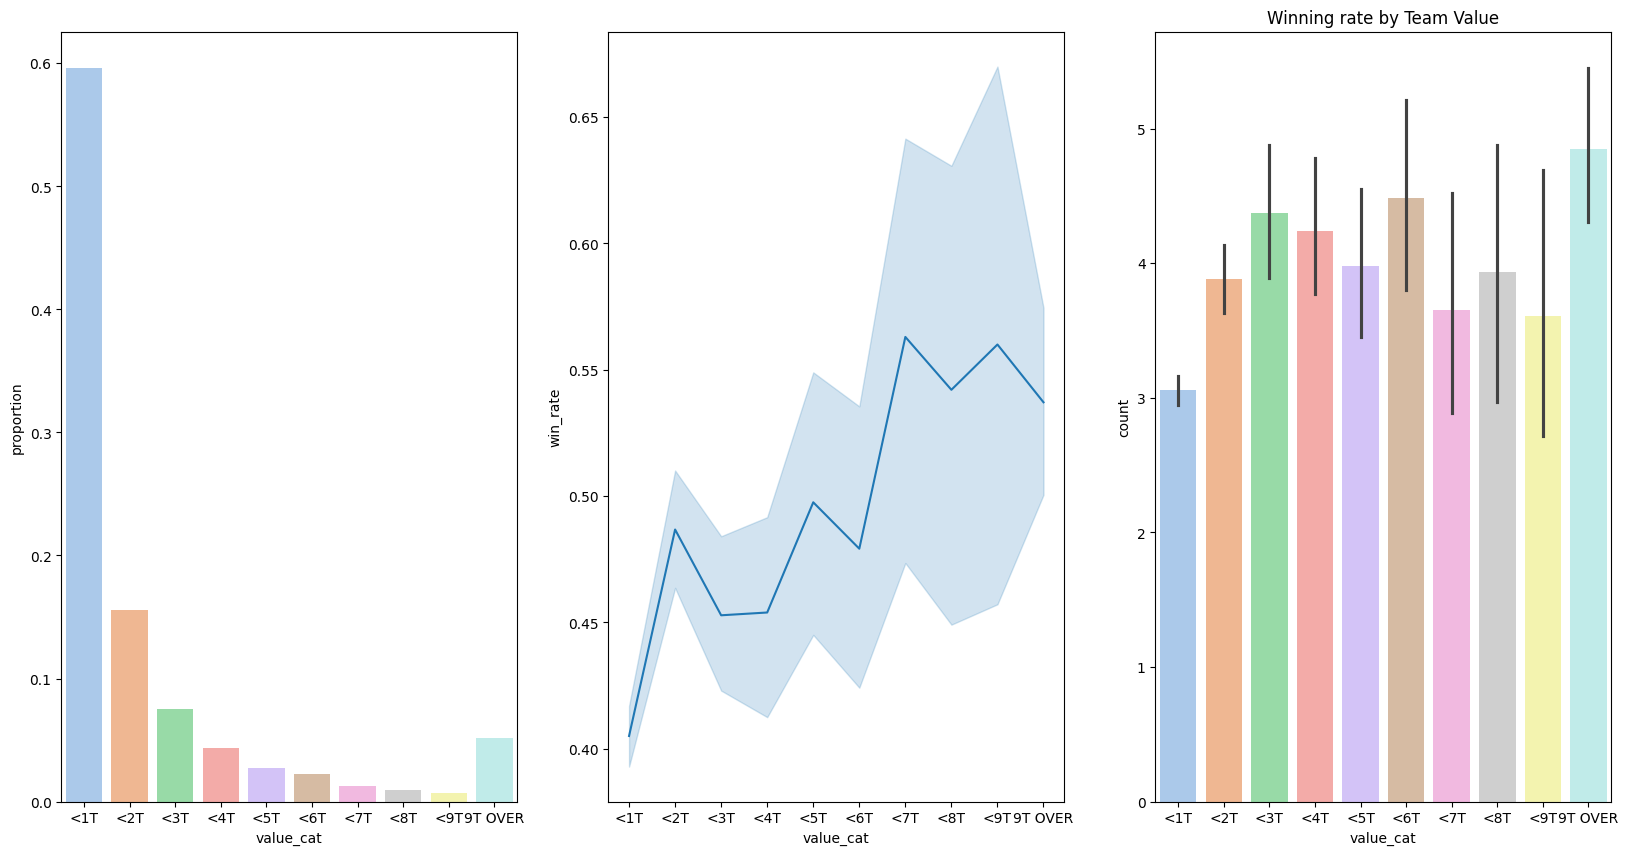

In [ ]:
# 필터링을 하지 않고 전체를 표본으로 할 경우 구단 가치에 따라 승률의 변화가 있다.
# 구단가치가 높으면 높을수록 승률도 동반 상승하는 추세를 보인다.
# 구단 가치 별 평균 게임 수 박스 플롯 그리기!
# 뿐만 아니라, 구단 가치가 커질수록 게임도 많이 하는 경향을 보이는 걸 봐선 구단 가치가 높을수록 게임에 대한 충성도, 애정이 많다고 추정할 수 있다.
ff = f1['value_cat'].value_counts(normalize=True).sort_index().reset_index()
plt.figure(figsize=(12,10))
fig, axs = plt.subplots(1,3, figsize=(20,10))
plt.title('Winning rate by Team Value')
sns.barplot(ff, x='value_cat', y='proportion', ax=axs[0], palette=palette)
sns.lineplot(f1, x='value_cat', y='win_rate', ax=axs[1])
sns.barplot(f1, x='value_cat', y='count', ax=axs[2], palette=palette)

In [ ]:
# 그렇다면 구단가치에 따라 승률의 차이는 유의미한 것일까?
# ANOVA 수행
# p-value가 1.059947e-16인 것을 봐서 구단 가치에 따라 승률의 차이가 있는 것이 입증되었다.
model = ols('win_rate ~ C(value_cat)', data=f1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(value_cat)   13.39441     9.0  10.729345  1.059947e-16
Residual      891.48934  6427.0        NaN           NaN


In [ ]:
f1.groupby('value_cat')['win_rate'].mean()

value_cat
<1T        0.405013
<2T        0.486750
<3T        0.452798
<4T        0.453901
<5T        0.497529
<6T        0.479155
<7T        0.563000
<8T        0.542069
<9T        0.560000
9T OVER    0.537121
Name: win_rate, dtype: float64

<ipython-input-84-ce0a6deeb6ac>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(f1, x='value_cat', y='real_money', palette = palette, ax=axs[1])


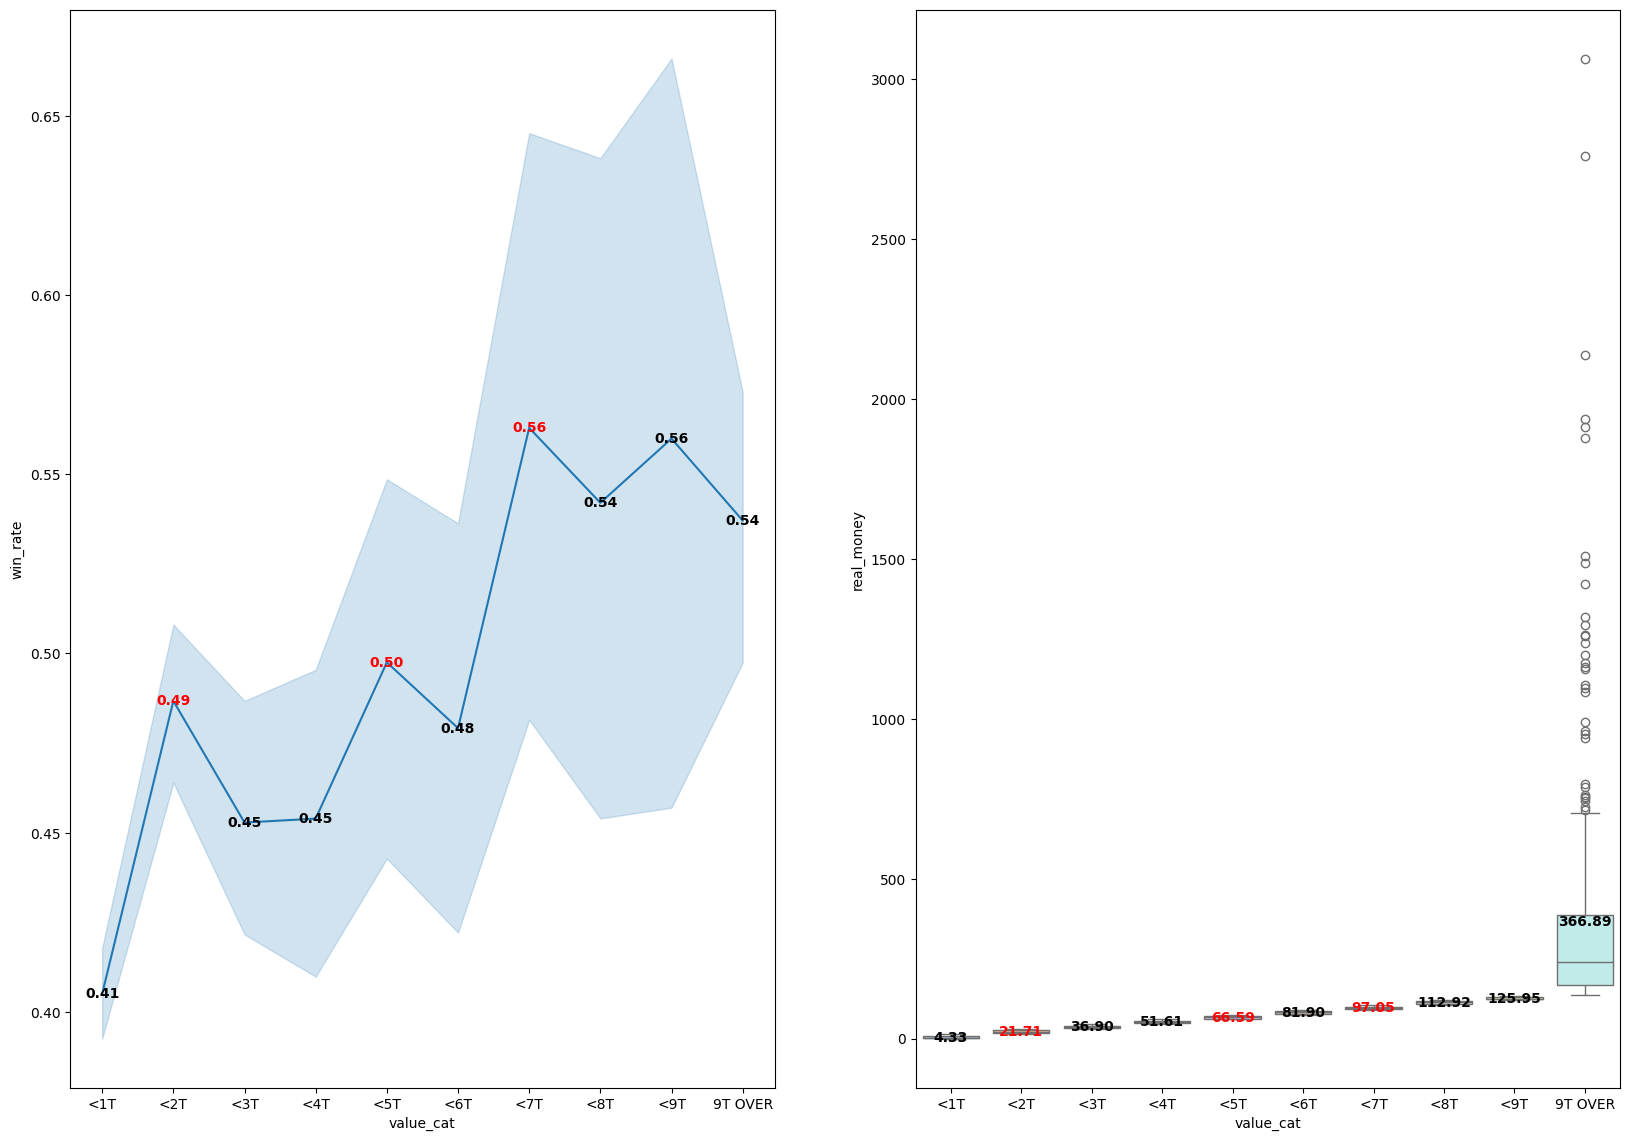

In [ ]:
# 그룹에 속해있는 구단가치의 평균 값을 알아보자
# 1조 이하 구단에서 2조 이하 구단으로 가면 승률이 약 8% 오른다.
# 2조 이하 구단에서 5조 이하 구단으로 가면 승률이 약 1% 오른다.
# 5조 이하 구단에서 7조 이하 구단으로 가면 승률이 약 6% 오른다.
# 1조 이하의 구단에서는 15만원의 현질을 했을 경우 승률이 8% 증가한다. 즉, 1조 이하 구단에서는 승률을 1% 올리기 위해 18500원을 현질해야한다. (게임을 자주 지는 1조 이하 구단 가치를 지닌 유저들에게 현질을 하도록 유도하도록 전략을 취한다.)
# 2조 이하의 구단에서는 45만원의 현질을 했을 경우 승률이 1% 증가한다. 즉, 2조 이하 구단에서는 승률을 1% 올리기 위해 45만원을 현질해야한다. (2조 구단에서 패한 유저들에게는 현질을 하도록 유도하는 전략을 취한다.)
# 5조 이하의 구단에서는 30만원의 현질을 했을 경우 승률이 6% 증가한다. 즉, 5조 이하 구단에서는 승률을 1% 올리기 위해 5만원을 현질해야한다.
fig,axs = plt.subplots(1,2,figsize=(20,14))
sns.lineplot(f1, x='value_cat', y='win_rate', ax=axs[0])
mean = f1.groupby('value_cat')['win_rate'].mean()
for i, m in enumerate(mean):
    if i == 1:
        axs[0].text(i, m, f'{m:.2f}', ha='center', va='center', color='red', fontweight='bold')
    elif i == 4:
        axs[0].text(i, m, f'{m:.2f}', ha='center', va='center', color='red', fontweight='bold')
    elif i == 6:
        axs[0].text(i, m, f'{m:.2f}', ha='center', va='center', color='red', fontweight='bold')
    else:
        axs[0].text(i, m, f'{m:.2f}', ha='center', va='center', color='black', fontweight='bold')
sns.boxplot(f1, x='value_cat', y='real_money', palette = palette, ax=axs[1])
means = f1.groupby('value_cat')['real_money'].mean()
for i, mean in enumerate(means):
    if i == 1:
        axs[1].text(i, mean, f'{mean:.2f}', ha='center', va='center', color='red', fontweight='bold')
    elif i == 4:
        axs[1].text(i, mean, f'{mean:.2f}', ha='center', va='center', color='red', fontweight='bold')
    elif i == 6:
        axs[1].text(i, mean, f'{mean:.2f}', ha='center', va='center', color='red', fontweight='bold')
    else:
        axs[1].text(i, mean, f'{mean:.2f}', ha='center', va='center', color='black', fontweight='bold')

인사이트:

1. 1조 구단에 위치한 유저들은 표본 중에 제일 많은 비율을 차지한다.또한 평균 승률이 매우 낮다(41%). 때문에 게임에 쉽게 흥미를 잃을수도 있다(게임에서 질 확률이 높기 때문에). 그러나, 이 유저들이 15만원을 과금할 경우 승률이 가장 급격하게 상승할 수 있다. 따라서, 이 구간에서 많이 패배하는 유저들을 대상으로 전력강화 패키지(15만원)을 출시하여 한정으로 팔던가, 아니면, 실속강화패키지 (18500원)을 출시하여 이들이 제품을 구매할 수있도록 유도한다.

2. 9조 이상 구단에 위치한 유저들은 현금으로 예상되는 구단 가치가 약 360만원이(구단 현금가치 추정 편차도 크다) 넘으며, 데이터 상에 하루 평균 5게임 정도하는 유저들이기 때문에 기본적으로 충성도가 높다고 생각할 수 있다. 즉, 충성 고객이라고 할 수 있는데, 이 유저들에게는 가격대가 높은 패키지를 팔거나, VIP 제도 등을 적용해서 이탈을 방지하도록 하는 멤버십/과금 전략을 사용한다


 이 유저들을 대상으로 게임에 대한 흥미를 높이기 위해 약 15만원의 현질을 하도록 유도한다.  

In [ ]:
f1.groupby(['value_cat'])['win_rate'].mean()

value_cat
<1T        0.405013
<2T        0.486750
<3T        0.452798
<4T        0.453901
<5T        0.497529
<6T        0.479155
<7T        0.563000
<8T        0.542069
<9T        0.560000
9T OVER    0.537121
Name: win_rate, dtype: float64

#분석 한계점

1. 한계점, 데이터를 수집할 떄, 하루만 플레이 한 유저들만 수집하는 것이 아닌 4,5일정도 플레이 한 유저들을 대상으로 데이터를 수집해야 좀 더 객관적인 해석이 가능 할 것 같다.

2. 여러 시간 대에 걸쳐 데이터를 수집하지 않았다보니 데이터의 편향성이 생길 수 있다. 따라서 해석의 왜곡이 생길 수 있다.

3. 데이터 분석을 진행할 때 샘플이 충분히 많지 않아 해석의 오류가 생길 수 있다.